In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Test availability of GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Checking Contents of Google Drive
!ls "/content/gdrive/My Drive/Springboard Projects/Capstone_Three"

Capstone_Three_Modelling_1	  Experiments.csv   group_2  group_5  models
Capstone_Three_Modelling_2	  extracted_images  group_3  group_6
Capstone_Three_Models_Assessment  group_1	    group_4  group_7


### **Data Generator Class**

In [5]:
class datagen:
    """This class generates the training, validation and test data
        given the path of the directory"""
    def __init__(self, path, validation_split, 
                 target_size=(45,45), 
                 color_mode='grayscale', 
                 batch_size=32, 
                 class_mode='categorical'):
        self.path=path
        self.validation_split=validation_split
        self.target_size=target_size
        self.color_mode=color_mode
        self.batch_size=batch_size 
        self.class_mode=class_mode
    

        from tensorflow.keras.preprocessing.image import ImageDataGenerator
        self.train_path = self.path + '/' + 'train'
        self.test_path = self.path + '/' + 'test'

        train_img_data_gen = ImageDataGenerator(validation_split=self.validation_split, rescale=1/255)
        self.train_data = train_img_data_gen.flow_from_directory(self.train_path, 
                                                    target_size=self.target_size,
                                                    color_mode=self.color_mode, 
                                                    batch_size=self.batch_size,  
                                                    class_mode=self.class_mode, 
                                                    subset='training')
        self.valid_data = train_img_data_gen.flow_from_directory(self.train_path, 
                                                    target_size=self.target_size,
                                                    color_mode=self.color_mode, 
                                                    batch_size=self.batch_size,  
                                                    class_mode=self.class_mode, 
                                                    subset='validation')
        test_img_data_gen = ImageDataGenerator(rescale=1/255)
        self.test_data = test_img_data_gen.flow_from_directory(self.test_path, 
                                                  target_size=self.target_size,
                                                    color_mode=self.color_mode, 
                                                    batch_size=self.batch_size,  
                                                    class_mode=self.class_mode)

### **Save and Plot Models**

In [6]:
class save_plot_model:
    """This class saves the model in specified directory as well as plot the
        accuracy and loss plot of model training"""
    def __init__(self, model, model_num, training, group, path):
        self.model=model
        self.model_num=model_num
        self.training=training
        self.group=group
        self.path=path
    def save_model(self):
        self.filename = self.path + '/' + self.model_num + '_' + self.group + '.hf5'
        self.model.save(self.filename)
    def plot_model_hist(self):
        import matplotlib.pyplot as plt
        plt.subplots(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(self.training.history['loss'])
        plt.plot(self.training.history['val_loss'])
        plt.title('Loss Plot for ' + self.model_num + '_' + self.group)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.subplot(1,2,2)
        plt.plot(self.training.history['accuracy'])
        plt.plot(self.training.history['val_accuracy'])
        plt.title('Accuracy Plot for ' + self.model_num + '_' + self.group)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

### **Creating Model**

In [7]:
class model_create:
    """This class creates the convolutional neural network based on the 
        dataframe defined for experiments"""
    def __init__(self, arch, model_num, experiment, input_shape, num_classes):
        self.arch = arch
        self.model_num = model_num
        self.experiment = experiment
        self.input_shape = input_shape
        self.num_classes = num_classes
    def model_generate(self):
        import tensorflow as tf
        if self.arch=='arch_1':
            df = self.experiment[(self.experiment['Model_Number']==self.model_num) & (self.experiment['Architecture']=='arch_1')]
            model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv1']), kernel_size=int(df.iloc[0]['kernel1']), strides=int(df.iloc[0]['stride1']), 
                                       padding=df.iloc[0]['padding'], activation='relu', input_shape=input_shape),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Flatten(), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense1']), activation='relu'), 
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
        if self.arch=='arch_2':
            df = self.experiment[(self.experiment['Model_Number']==self.model_num) & (self.experiment['Architecture']=='arch_2')]
            model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv1']), kernel_size=int(df.iloc[0]['kernel1']), strides=int(df.iloc[0]['stride1']), 
                                       padding=df.iloc[0]['padding'], activation='relu', input_shape=input_shape),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv2']), kernel_size=int(df.iloc[0]['kernel2']), strides=int(df.iloc[0]['stride2']), 
                                       padding=df.iloc[0]['padding'], activation='relu'),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Flatten(), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense1']), activation='relu'), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense2']), activation='relu'), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
        if self.arch=='arch_3':
            df = self.experiment[(self.experiment['Model_Number']==self.model_num) & (self.experiment['Architecture']=='arch_3')]
            model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv1']), kernel_size=int(df.iloc[0]['kernel1']), strides=int(df.iloc[0]['stride1']), 
                                       padding=df.iloc[0]['padding'], activation='relu', input_shape=input_shape),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv2']), kernel_size=int(df.iloc[0]['kernel2']), strides=int(df.iloc[0]['stride2']), 
                                       padding=df.iloc[0]['padding'], activation='relu'),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])), 
                tf.keras.layers.Conv2D(int(df.iloc[0]['Conv3']), kernel_size=int(df.iloc[0]['kernel3']), strides=int(df.iloc[0]['stride3']), 
                                       padding=df.iloc[0]['padding'], activation='relu'),
                tf.keras.layers.MaxPool2D(int(df.iloc[0]['Maxpool'])),
                tf.keras.layers.Flatten(), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense1']), activation='relu'), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense2']), activation='relu'), 
                tf.keras.layers.Dense(int(df.iloc[0]['Dense3']), activation='relu'), 
                tf.keras.layers.Dropout(0.25), 
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
        return model

### **Optimizers, Learning Rates and Callbacks**

In [8]:
# function to define the optimizer and learning rate
def opt_callbacks(optimizer, lr, patience):
    if optimizer=='SGD':
        my_optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.8)
    elif optimizer=='Adam':
        my_optimizer = tf.keras.optimizers.Adam(lr=lr)
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping_monitor = EarlyStopping(patience=patience, restore_best_weights=True)
    return my_optimizer, early_stopping_monitor

In [9]:
# Loading the experiment dataframe containing details of different models
experiments = pd.read_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/Experiments.csv')
print(experiments)

   Architecture Model_Number  Conv1  kernel1  ...  Conv3 kernel3  stride3  Dense3
0        arch_1      model_1     16        3  ...    NaN     NaN      NaN     NaN
1        arch_1      model_2     16        3  ...    NaN     NaN      NaN     NaN
2        arch_1      model_3     16        3  ...    NaN     NaN      NaN     NaN
3        arch_1      model_4     16        5  ...    NaN     NaN      NaN     NaN
4        arch_1      model_5     32        5  ...    NaN     NaN      NaN     NaN
5        arch_1      model_6     64        5  ...    NaN     NaN      NaN     NaN
6        arch_2      model_1      6        5  ...    NaN     NaN      NaN     NaN
7        arch_2      model_2     16        3  ...    NaN     NaN      NaN     NaN
8        arch_3      model_1      6        5  ...   32.0     5.0      1.0    58.0
9        arch_3      model_2     16        5  ...   64.0     5.0      2.0   116.0
10       arch_3      model_3      6        9  ...   16.0     5.0      1.0   144.0

[11 rows x 16 c

## **Main Code for training the models, saving them and plotting the history**

Found 1041 images belonging to 13 classes.
Found 259 images belonging to 13 classes.
Found 1151 images belonging to 13 classes.
arch_1_model_1_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 204s 6s/step - loss: 2.6448 - accuracy: 0.0654 - val_loss: 2.5740 - val_accuracy: 0.0656
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5826 - accuracy: 0.0809 - val_loss: 2.5577 - val_accuracy: 0.0888
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5776 - accuracy: 0.0769 - val_loss: 2.5503 - val_accuracy: 0.0811
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5564 - accuracy: 0.0889 - val_loss: 2.5443 - val_accuracy: 0.1351
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5516 - accuracy: 0.0995 - val_loss: 2.5385 - val_accuracy: 0.1699
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5444 - accuracy: 0.1132 - val_loss: 2.5305 - v

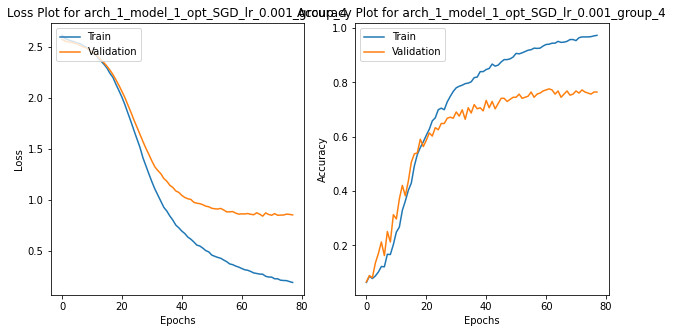

36/36 [==============================] - 174s 5s/step - loss: 0.9740 - accuracy: 0.7089
arch_1_model_1_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6036 - accuracy: 0.0894 - val_loss: 2.4962 - val_accuracy: 0.2973
Epoch 2/250
33/33 [==============================] - 2s 51ms/step - loss: 2.4447 - accuracy: 0.3346 - val_loss: 2.2003 - val_accuracy: 0.4981
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 2.0013 - accuracy: 0.5524 - val_loss: 1.5524 - val_accuracy: 0.6371
Epoch 4/250
33/33 [==============================] - 2s 52ms/step - loss: 1.1829 - accuracy: 0.7181 - val_loss: 1.1258 - val_accuracy: 0.6757
Epoch 5/250
33/33 [==============================] - 2s 51ms/step - loss: 0.7085 - accuracy: 0.8408 - val_loss: 0.9635 - val_accuracy: 0.7375
Epoch 6/250
33/33 [==============================] - 2s 51ms/step - loss: 0.4820 - accuracy: 0.9010 - val_loss: 0.8631 - val_accuracy: 0.7645
Epoch 7/250
33/33 [==

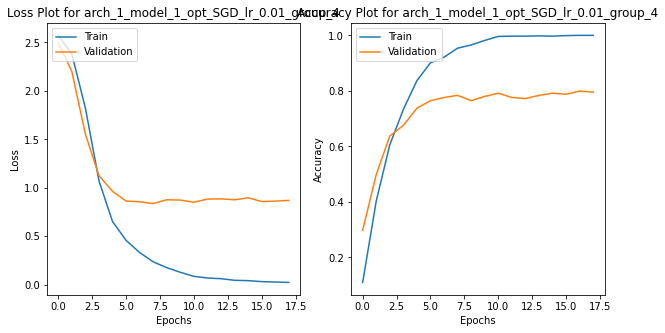

36/36 [==============================] - 1s 38ms/step - loss: 0.9518 - accuracy: 0.7194
arch_1_model_1_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6849 - accuracy: 0.1262 - val_loss: 2.1350 - val_accuracy: 0.4595
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.8968 - accuracy: 0.5487 - val_loss: 1.5220 - val_accuracy: 0.6448
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 1.1863 - accuracy: 0.7639 - val_loss: 1.1578 - val_accuracy: 0.6950
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 0.7518 - accuracy: 0.8359 - val_loss: 1.0073 - val_accuracy: 0.7297
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 0.5055 - accuracy: 0.9083 - val_loss: 0.9344 - val_accuracy: 0.7529
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.3899 - accuracy: 0.9250 - val_loss: 0.8456 - val_accuracy: 0.7838
Epoch 7/250
33/33 [

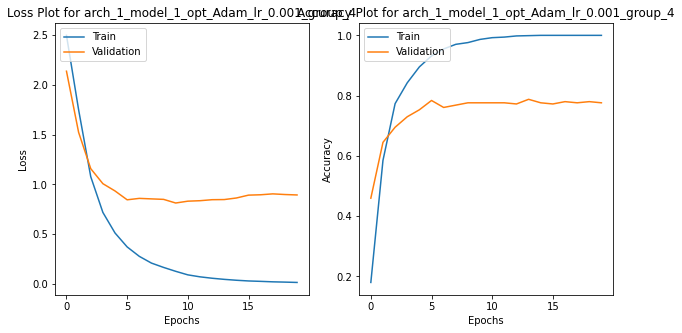

36/36 [==============================] - 1s 38ms/step - loss: 0.9028 - accuracy: 0.7402
arch_1_model_1_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 6.4527 - accuracy: 0.1120 - val_loss: 1.7959 - val_accuracy: 0.4286
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.3280 - accuracy: 0.6018 - val_loss: 1.1110 - val_accuracy: 0.6795
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4818 - accuracy: 0.8537 - val_loss: 1.0847 - val_accuracy: 0.7143
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 0.1872 - accuracy: 0.9423 - val_loss: 1.1334 - val_accuracy: 0.7143
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 0.1070 - accuracy: 0.9725 - val_loss: 1.1623 - val_accuracy: 0.7336
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.0918 - accuracy: 0.9686 - val_loss: 1.3536 - val_accuracy: 0.7490
Epoch 7/250
33/33 [=

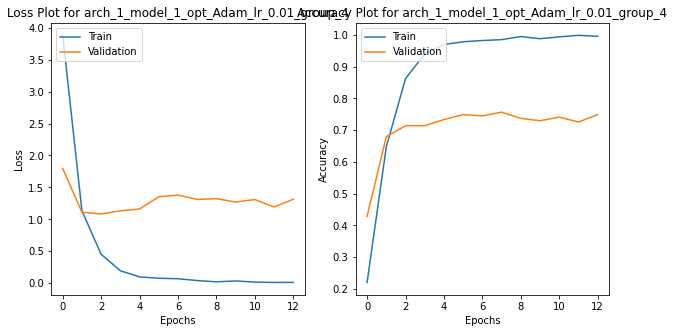

36/36 [==============================] - 1s 39ms/step - loss: 1.0871 - accuracy: 0.6829
arch_1_model_2_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.6243 - accuracy: 0.0716 - val_loss: 2.5602 - val_accuracy: 0.0888
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5785 - accuracy: 0.0891 - val_loss: 2.5546 - val_accuracy: 0.0965
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5710 - accuracy: 0.0793 - val_loss: 2.5495 - val_accuracy: 0.0888
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5562 - accuracy: 0.1209 - val_loss: 2.5391 - val_accuracy: 0.1120
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5485 - accuracy: 0.0995 - val_loss: 2.5351 - val_accuracy: 0.1429
Epoch 6/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5476 - accuracy: 0.1189 - val_loss: 2.5218 - val_accuracy: 0.2124
Epoch 7/250
33/33 [=

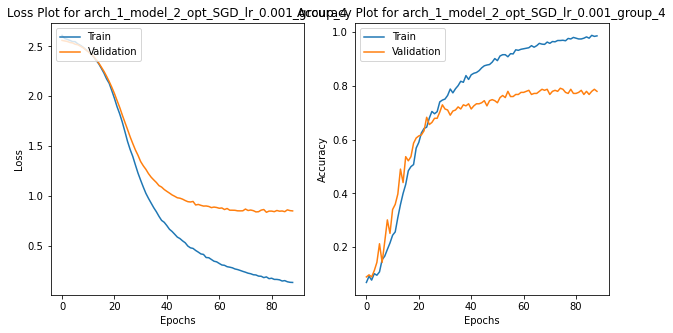

36/36 [==============================] - 1s 38ms/step - loss: 0.9846 - accuracy: 0.7228
arch_1_model_2_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5974 - accuracy: 0.0899 - val_loss: 2.5086 - val_accuracy: 0.2780
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.4483 - accuracy: 0.2920 - val_loss: 2.2288 - val_accuracy: 0.5212
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.0076 - accuracy: 0.5867 - val_loss: 1.5992 - val_accuracy: 0.5907
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 1.2743 - accuracy: 0.7086 - val_loss: 1.1335 - val_accuracy: 0.7027
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 0.7334 - accuracy: 0.8197 - val_loss: 0.9747 - val_accuracy: 0.7181
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.5018 - accuracy: 0.8778 - val_loss: 0.8896 - val_accuracy: 0.7490
Epoch 7/250
33/33 [==

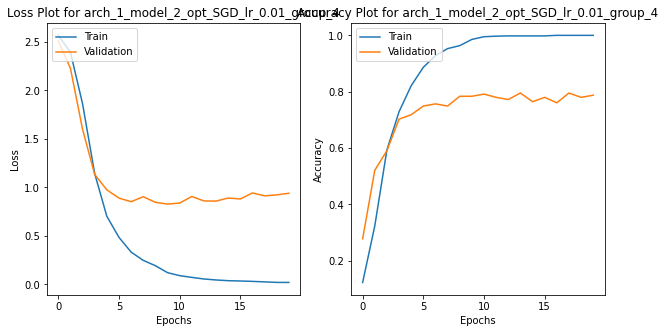

36/36 [==============================] - 1s 38ms/step - loss: 0.8746 - accuracy: 0.7394
arch_1_model_2_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.6721 - accuracy: 0.1119 - val_loss: 2.1636 - val_accuracy: 0.2587
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 1.8433 - accuracy: 0.4971 - val_loss: 1.4183 - val_accuracy: 0.6332
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 1.0701 - accuracy: 0.7552 - val_loss: 1.1144 - val_accuracy: 0.7027
Epoch 4/250
33/33 [==============================] - 2s 51ms/step - loss: 0.6845 - accuracy: 0.8562 - val_loss: 0.9878 - val_accuracy: 0.7066
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 0.5058 - accuracy: 0.8882 - val_loss: 0.8772 - val_accuracy: 0.7490
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.3308 - accuracy: 0.9468 - val_loss: 0.8494 - val_accuracy: 0.7336
Epoch 7/250
33/33 [

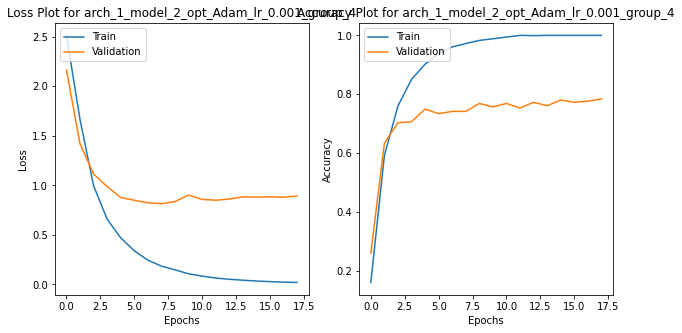

36/36 [==============================] - 1s 37ms/step - loss: 0.9569 - accuracy: 0.7168
arch_1_model_2_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 5.4782 - accuracy: 0.1144 - val_loss: 1.8637 - val_accuracy: 0.4440
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.4567 - accuracy: 0.5580 - val_loss: 1.1032 - val_accuracy: 0.6795
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4683 - accuracy: 0.8669 - val_loss: 1.0734 - val_accuracy: 0.7220
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.1492 - accuracy: 0.9699 - val_loss: 1.0874 - val_accuracy: 0.7375
Epoch 5/250
33/33 [==============================] - 2s 46ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 1.1470 - val_accuracy: 0.7568
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 1.2562 - val_accuracy: 0.7645
Epoch 7/250
33/33 [=

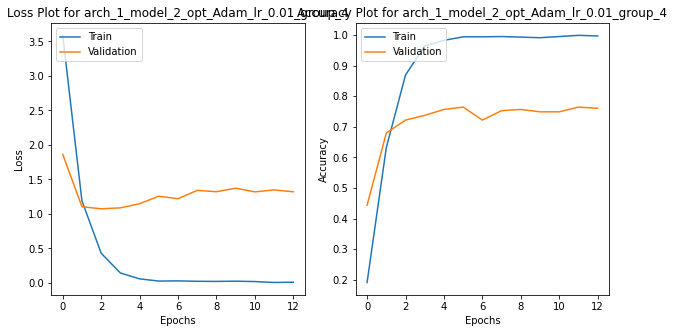

36/36 [==============================] - 1s 37ms/step - loss: 1.0237 - accuracy: 0.7020
arch_1_model_3_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6350 - accuracy: 0.0806 - val_loss: 2.5504 - val_accuracy: 0.0965
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5708 - accuracy: 0.0838 - val_loss: 2.5429 - val_accuracy: 0.1351
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5513 - accuracy: 0.0975 - val_loss: 2.5377 - val_accuracy: 0.1274
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5449 - accuracy: 0.1004 - val_loss: 2.5306 - val_accuracy: 0.1390
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5372 - accuracy: 0.1142 - val_loss: 2.5213 - val_accuracy: 0.2008
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5437 - accuracy: 0.1107 - val_loss: 2.5124 - val_accuracy: 0.1892
Epoch 7/250
33/33 [=

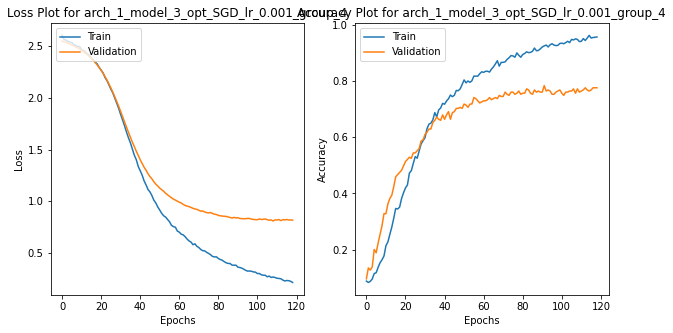

36/36 [==============================] - 1s 37ms/step - loss: 0.8951 - accuracy: 0.7307
arch_1_model_3_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5960 - accuracy: 0.0815 - val_loss: 2.5309 - val_accuracy: 0.1737
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5105 - accuracy: 0.1811 - val_loss: 2.4624 - val_accuracy: 0.2317
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.4197 - accuracy: 0.3250 - val_loss: 2.2954 - val_accuracy: 0.4363
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.1817 - accuracy: 0.4504 - val_loss: 1.9207 - val_accuracy: 0.5676
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 1.7108 - accuracy: 0.6476 - val_loss: 1.4654 - val_accuracy: 0.6486
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 1.2291 - accuracy: 0.6952 - val_loss: 1.1864 - val_accuracy: 0.6795
Epoch 7/250
33/33 [==

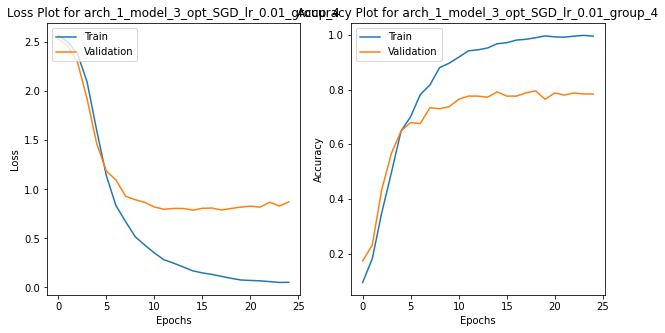

36/36 [==============================] - 1s 38ms/step - loss: 0.8905 - accuracy: 0.7368
arch_1_model_3_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5223 - accuracy: 0.1436 - val_loss: 2.1626 - val_accuracy: 0.4633
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.8482 - accuracy: 0.6174 - val_loss: 1.3908 - val_accuracy: 0.6988
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 0.9949 - accuracy: 0.7984 - val_loss: 1.0278 - val_accuracy: 0.7181
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 0.6017 - accuracy: 0.8488 - val_loss: 0.9026 - val_accuracy: 0.7375
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4010 - accuracy: 0.9099 - val_loss: 0.8502 - val_accuracy: 0.7568
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 0.3077 - accuracy: 0.9475 - val_loss: 0.7681 - val_accuracy: 0.7915
Epoch 7/250
33/33 [

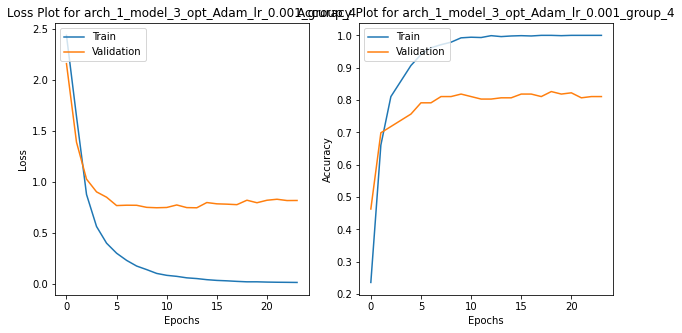

36/36 [==============================] - 1s 38ms/step - loss: 0.8870 - accuracy: 0.7515
arch_1_model_3_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 3.2362 - accuracy: 0.1889 - val_loss: 1.2545 - val_accuracy: 0.6062
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 0.8301 - accuracy: 0.7485 - val_loss: 0.8860 - val_accuracy: 0.7490
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 0.2815 - accuracy: 0.9152 - val_loss: 0.8578 - val_accuracy: 0.7761
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.1162 - accuracy: 0.9668 - val_loss: 0.7923 - val_accuracy: 0.8108
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.0567 - accuracy: 0.9853 - val_loss: 0.9025 - val_accuracy: 0.7915
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.0446 - accuracy: 0.9882 - val_loss: 0.9980 - val_accuracy: 0.7954
Epoch 7/250
33/33 [=

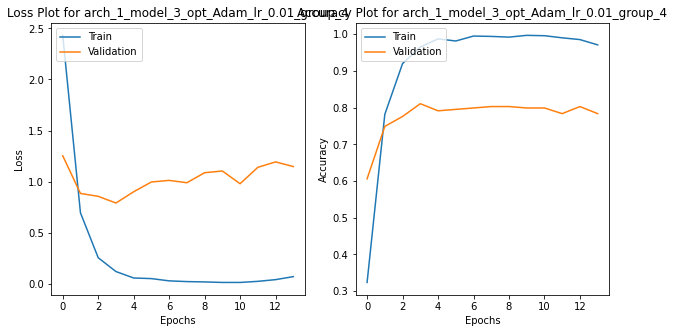

36/36 [==============================] - 1s 37ms/step - loss: 0.9517 - accuracy: 0.7541
arch_1_model_4_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.6336 - accuracy: 0.0588 - val_loss: 2.5609 - val_accuracy: 0.0579
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5614 - accuracy: 0.0911 - val_loss: 2.5474 - val_accuracy: 0.0965
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5480 - accuracy: 0.1076 - val_loss: 2.5343 - val_accuracy: 0.1390
Epoch 4/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5280 - accuracy: 0.1405 - val_loss: 2.5204 - val_accuracy: 0.2085
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5090 - accuracy: 0.1886 - val_loss: 2.5019 - val_accuracy: 0.2432
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.4921 - accuracy: 0.2235 - val_loss: 2.4824 - val_accuracy: 0.3282
Epoch 7/250
33/33 [=

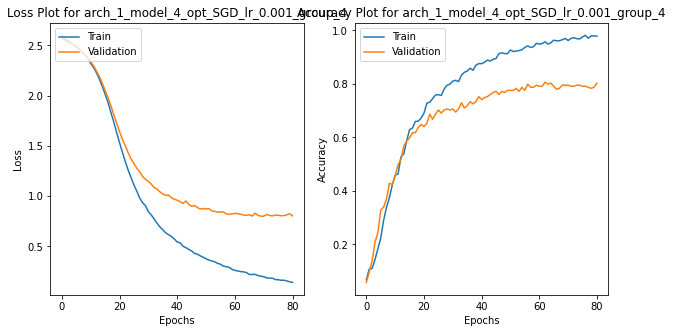

36/36 [==============================] - 1s 38ms/step - loss: 0.9107 - accuracy: 0.7333
arch_1_model_4_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5832 - accuracy: 0.0887 - val_loss: 2.5049 - val_accuracy: 0.2394
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.4380 - accuracy: 0.2471 - val_loss: 2.2000 - val_accuracy: 0.4363
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 1.9984 - accuracy: 0.5067 - val_loss: 1.5127 - val_accuracy: 0.6293
Epoch 4/250
33/33 [==============================] - 2s 51ms/step - loss: 1.2054 - accuracy: 0.7074 - val_loss: 1.1771 - val_accuracy: 0.7027
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 0.7936 - accuracy: 0.7656 - val_loss: 1.0407 - val_accuracy: 0.7181
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 0.5711 - accuracy: 0.8467 - val_loss: 0.9999 - val_accuracy: 0.7220
Epoch 7/250
33/33 [==

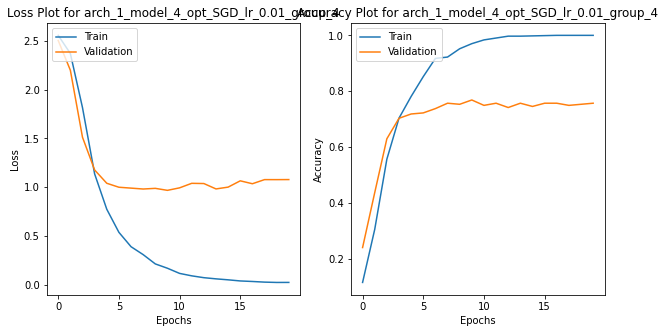

36/36 [==============================] - 1s 38ms/step - loss: 1.0556 - accuracy: 0.6977
arch_1_model_4_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5110 - accuracy: 0.2018 - val_loss: 1.6981 - val_accuracy: 0.5598
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.3524 - accuracy: 0.6640 - val_loss: 1.1376 - val_accuracy: 0.7143
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 0.7712 - accuracy: 0.8221 - val_loss: 0.9802 - val_accuracy: 0.7297
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 0.5098 - accuracy: 0.8825 - val_loss: 0.9033 - val_accuracy: 0.7452
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 0.3553 - accuracy: 0.9177 - val_loss: 0.8774 - val_accuracy: 0.7452
Epoch 6/250
33/33 [==============================] - 2s 50ms/step - loss: 0.2314 - accuracy: 0.9643 - val_loss: 0.8831 - val_accuracy: 0.7645
Epoch 7/250
33/33 [

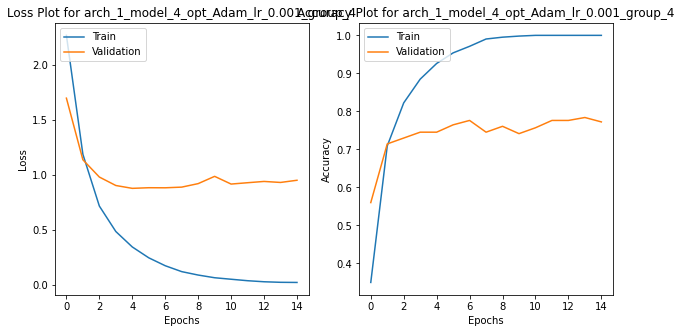

36/36 [==============================] - 1s 38ms/step - loss: 1.0144 - accuracy: 0.6942
arch_1_model_4_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 6.2704 - accuracy: 0.0974 - val_loss: 2.5653 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5659 - accuracy: 0.0793 - val_loss: 2.5647 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5642 - accuracy: 0.0860 - val_loss: 2.5642 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5659 - accuracy: 0.0784 - val_loss: 2.5640 - val_accuracy: 0.0849
Epoch 5/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5631 - accuracy: 0.0968 - val_loss: 2.5638 - val_accuracy: 0.0849
Epoch 6/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5643 - accuracy: 0.0910 - val_loss: 2.5638 - val_accuracy: 0.0849
Epoch 7/250
33/33 [=

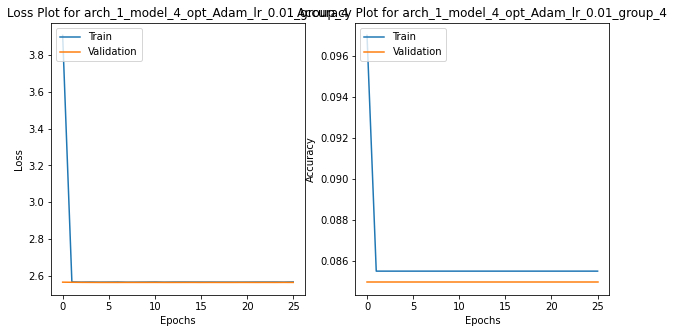

36/36 [==============================] - 1s 37ms/step - loss: 2.5638 - accuracy: 0.0243
arch_1_model_5_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5881 - accuracy: 0.0893 - val_loss: 2.5632 - val_accuracy: 0.0695
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5646 - accuracy: 0.0940 - val_loss: 2.5517 - val_accuracy: 0.0888
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5407 - accuracy: 0.0973 - val_loss: 2.5283 - val_accuracy: 0.1467
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5162 - accuracy: 0.1548 - val_loss: 2.5079 - val_accuracy: 0.2162
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.4912 - accuracy: 0.1789 - val_loss: 2.4813 - val_accuracy: 0.3320
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 2.4662 - accuracy: 0.2694 - val_loss: 2.4558 - val_accuracy: 0.3282
Epoch 7/250
33/33 [=

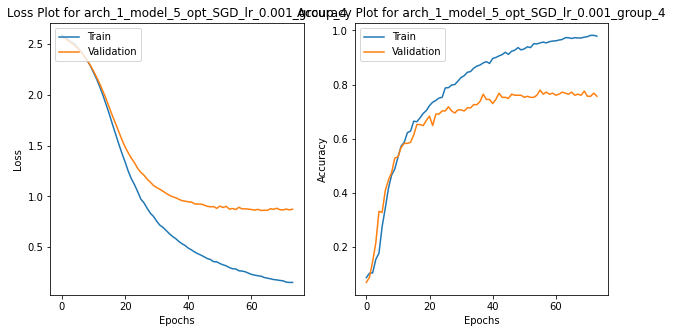

36/36 [==============================] - 1s 38ms/step - loss: 0.9415 - accuracy: 0.7298
arch_1_model_5_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5957 - accuracy: 0.0749 - val_loss: 2.5203 - val_accuracy: 0.2741
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.4851 - accuracy: 0.2954 - val_loss: 2.3108 - val_accuracy: 0.4749
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.1300 - accuracy: 0.4887 - val_loss: 1.7086 - val_accuracy: 0.5907
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 1.3288 - accuracy: 0.6893 - val_loss: 1.2230 - val_accuracy: 0.6680
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 0.8730 - accuracy: 0.7598 - val_loss: 1.0009 - val_accuracy: 0.7297
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.5494 - accuracy: 0.8648 - val_loss: 0.9732 - val_accuracy: 0.7220
Epoch 7/250
33/33 [==

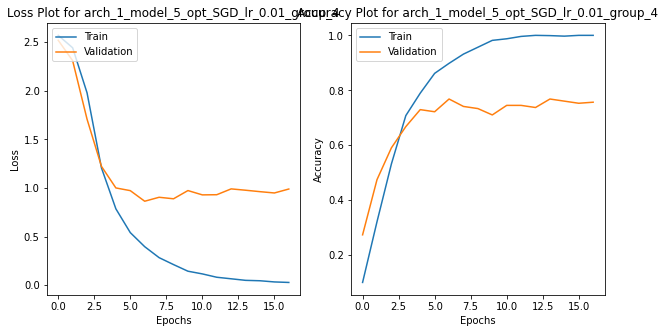

36/36 [==============================] - 1s 38ms/step - loss: 1.0036 - accuracy: 0.6907
arch_1_model_5_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 3.1432 - accuracy: 0.1222 - val_loss: 2.2393 - val_accuracy: 0.4093
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.9932 - accuracy: 0.5189 - val_loss: 1.6017 - val_accuracy: 0.6023
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 1.2892 - accuracy: 0.6912 - val_loss: 1.2905 - val_accuracy: 0.6680
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 0.8543 - accuracy: 0.8085 - val_loss: 1.0744 - val_accuracy: 0.6988
Epoch 5/250
33/33 [==============================] - 2s 51ms/step - loss: 0.5977 - accuracy: 0.8601 - val_loss: 0.9582 - val_accuracy: 0.7490
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.4577 - accuracy: 0.9089 - val_loss: 0.9854 - val_accuracy: 0.7066
Epoch 7/250
33/33 [

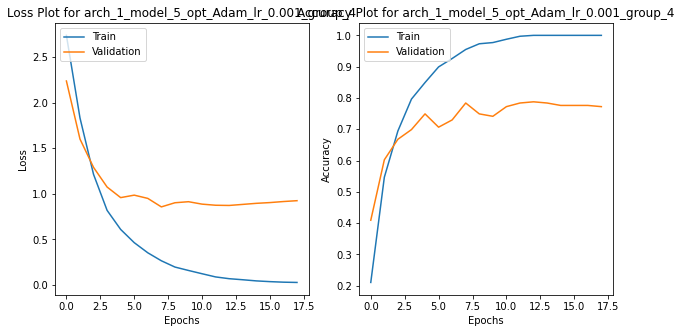

36/36 [==============================] - 1s 39ms/step - loss: 1.0237 - accuracy: 0.7046
arch_1_model_5_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 4.2433 - accuracy: 0.1724 - val_loss: 1.5773 - val_accuracy: 0.5097
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.1033 - accuracy: 0.6551 - val_loss: 1.0280 - val_accuracy: 0.7220
Epoch 3/250
33/33 [==============================] - 2s 49ms/step - loss: 0.6184 - accuracy: 0.8059 - val_loss: 1.1961 - val_accuracy: 0.6602
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.3847 - accuracy: 0.8952 - val_loss: 1.1228 - val_accuracy: 0.6950
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 0.2105 - accuracy: 0.9412 - val_loss: 1.1187 - val_accuracy: 0.7375
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 0.1385 - accuracy: 0.9513 - val_loss: 1.1316 - val_accuracy: 0.7143
Epoch 7/250
33/33 [=

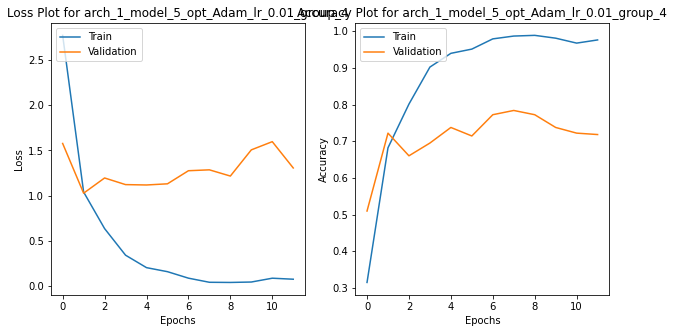

36/36 [==============================] - 1s 39ms/step - loss: 1.1968 - accuracy: 0.6646
arch_1_model_6_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 58ms/step - loss: 2.5824 - accuracy: 0.0732 - val_loss: 2.5510 - val_accuracy: 0.0927
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5512 - accuracy: 0.1017 - val_loss: 2.5342 - val_accuracy: 0.1931
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5322 - accuracy: 0.1485 - val_loss: 2.5076 - val_accuracy: 0.1737
Epoch 4/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5034 - accuracy: 0.2371 - val_loss: 2.4798 - val_accuracy: 0.3359
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.4658 - accuracy: 0.3360 - val_loss: 2.4458 - val_accuracy: 0.4324
Epoch 6/250
33/33 [==============================] - 2s 52ms/step - loss: 2.4284 - accuracy: 0.4058 - val_loss: 2.4038 - val_accuracy: 0.5560
Epoch 7/250
33/33 [=

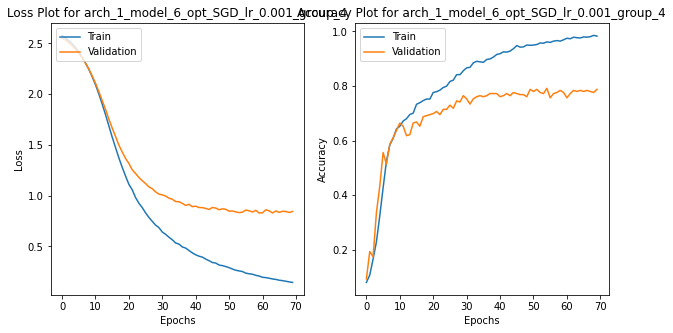

36/36 [==============================] - 1s 38ms/step - loss: 0.9478 - accuracy: 0.7281
arch_1_model_6_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.5838 - accuracy: 0.0778 - val_loss: 2.4563 - val_accuracy: 0.3282
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.3453 - accuracy: 0.3016 - val_loss: 2.0070 - val_accuracy: 0.5560
Epoch 3/250
33/33 [==============================] - 2s 53ms/step - loss: 1.6875 - accuracy: 0.6655 - val_loss: 1.3687 - val_accuracy: 0.6641
Epoch 4/250
33/33 [==============================] - 2s 54ms/step - loss: 1.0160 - accuracy: 0.7388 - val_loss: 1.0703 - val_accuracy: 0.7027
Epoch 5/250
33/33 [==============================] - 2s 53ms/step - loss: 0.6479 - accuracy: 0.8491 - val_loss: 0.9781 - val_accuracy: 0.7297
Epoch 6/250
33/33 [==============================] - 2s 53ms/step - loss: 0.4477 - accuracy: 0.8911 - val_loss: 0.9686 - val_accuracy: 0.7104
Epoch 7/250
33/33 [==

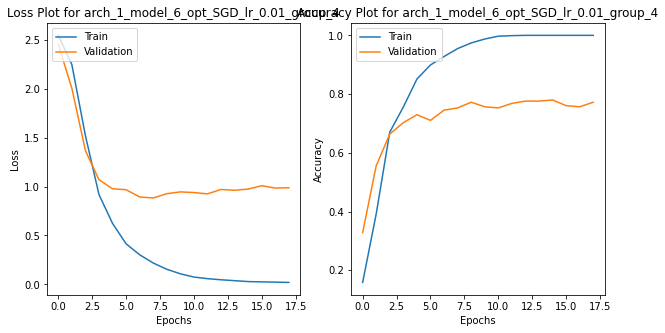

36/36 [==============================] - 1s 39ms/step - loss: 0.9939 - accuracy: 0.7020
arch_1_model_6_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 3.1780 - accuracy: 0.1608 - val_loss: 1.9030 - val_accuracy: 0.6448
Epoch 2/250
33/33 [==============================] - 2s 48ms/step - loss: 1.4908 - accuracy: 0.6532 - val_loss: 1.1101 - val_accuracy: 0.6873
Epoch 3/250
33/33 [==============================] - 2s 49ms/step - loss: 0.6825 - accuracy: 0.7974 - val_loss: 0.9676 - val_accuracy: 0.7220
Epoch 4/250
33/33 [==============================] - 2s 54ms/step - loss: 0.3260 - accuracy: 0.9330 - val_loss: 0.9662 - val_accuracy: 0.6988
Epoch 5/250
33/33 [==============================] - 2s 53ms/step - loss: 0.1716 - accuracy: 0.9722 - val_loss: 0.8660 - val_accuracy: 0.7568
Epoch 6/250
33/33 [==============================] - 2s 51ms/step - loss: 0.0974 - accuracy: 0.9942 - val_loss: 0.8715 - val_accuracy: 0.7683
Epoch 7/250
33/33 [

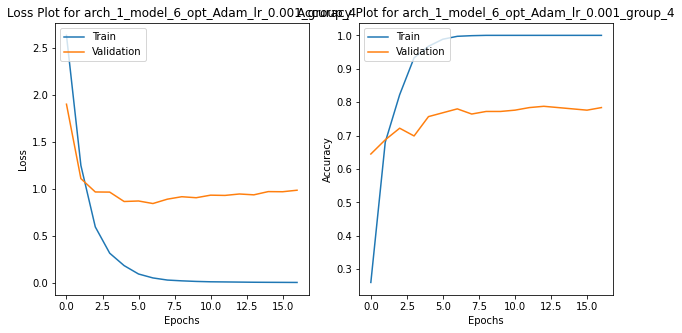

36/36 [==============================] - 1s 37ms/step - loss: 0.9264 - accuracy: 0.7437
arch_1_model_6_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 6.8884 - accuracy: 0.0889 - val_loss: 2.5654 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5673 - accuracy: 0.0971 - val_loss: 2.5644 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5659 - accuracy: 0.0885 - val_loss: 2.5642 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5642 - accuracy: 0.0857 - val_loss: 2.5640 - val_accuracy: 0.0849
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5657 - accuracy: 0.0812 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 6/250
33/33 [==============================] - 2s 56ms/step - loss: 2.5641 - accuracy: 0.0900 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 7/250
33/33 [=

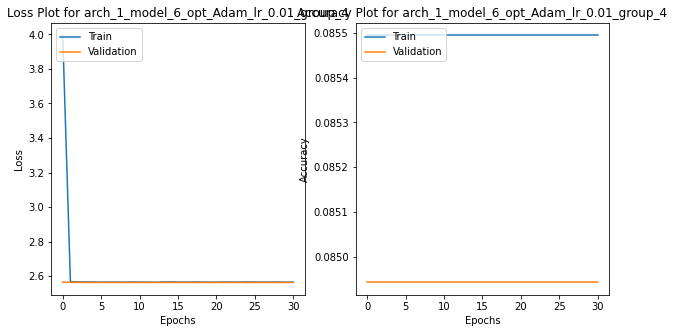

36/36 [==============================] - 1s 38ms/step - loss: 2.5643 - accuracy: 0.0243
arch_2_model_1_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5785 - accuracy: 0.0822 - val_loss: 2.5639 - val_accuracy: 0.0811
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5713 - accuracy: 0.0825 - val_loss: 2.5589 - val_accuracy: 0.1081
Epoch 3/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5590 - accuracy: 0.0664 - val_loss: 2.5553 - val_accuracy: 0.1158
Epoch 4/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5553 - accuracy: 0.1012 - val_loss: 2.5523 - val_accuracy: 0.1274
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5531 - accuracy: 0.0982 - val_loss: 2.5480 - val_accuracy: 0.1351
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5503 - accuracy: 0.1066 - val_loss: 2.5444 - val_accuracy: 0.1351
Epoch 7/250
33/33 [=

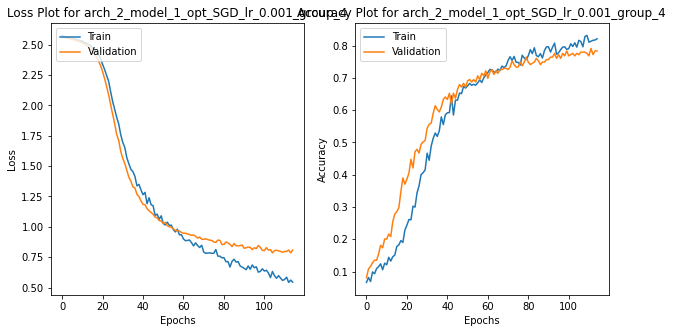

36/36 [==============================] - 2s 42ms/step - loss: 0.9556 - accuracy: 0.7150
arch_2_model_1_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.5652 - accuracy: 0.0841 - val_loss: 2.5362 - val_accuracy: 0.1969
Epoch 2/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5229 - accuracy: 0.1622 - val_loss: 2.4400 - val_accuracy: 0.2973
Epoch 3/250
33/33 [==============================] - 2s 49ms/step - loss: 2.3868 - accuracy: 0.2215 - val_loss: 2.0363 - val_accuracy: 0.4788
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 1.9909 - accuracy: 0.3649 - val_loss: 1.4948 - val_accuracy: 0.5251
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 1.5379 - accuracy: 0.5174 - val_loss: 1.2817 - val_accuracy: 0.6371
Epoch 6/250
33/33 [==============================] - 2s 50ms/step - loss: 1.2396 - accuracy: 0.6098 - val_loss: 1.1478 - val_accuracy: 0.6525
Epoch 7/250
33/33 [==

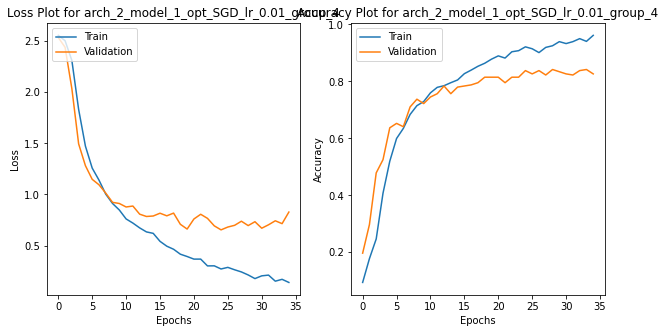

36/36 [==============================] - 1s 40ms/step - loss: 0.7016 - accuracy: 0.8184
arch_2_model_1_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 56ms/step - loss: 2.5695 - accuracy: 0.0703 - val_loss: 2.4917 - val_accuracy: 0.1853
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.3769 - accuracy: 0.2022 - val_loss: 1.7128 - val_accuracy: 0.4749
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 1.5807 - accuracy: 0.4661 - val_loss: 1.2985 - val_accuracy: 0.6023
Epoch 4/250
33/33 [==============================] - 2s 53ms/step - loss: 1.2084 - accuracy: 0.6311 - val_loss: 1.1150 - val_accuracy: 0.6409
Epoch 5/250
33/33 [==============================] - 2s 51ms/step - loss: 0.9663 - accuracy: 0.6769 - val_loss: 1.0396 - val_accuracy: 0.7181
Epoch 6/250
33/33 [==============================] - 2s 51ms/step - loss: 0.8245 - accuracy: 0.7386 - val_loss: 0.9476 - val_accuracy: 0.7220
Epoch 7/250
33/33 [

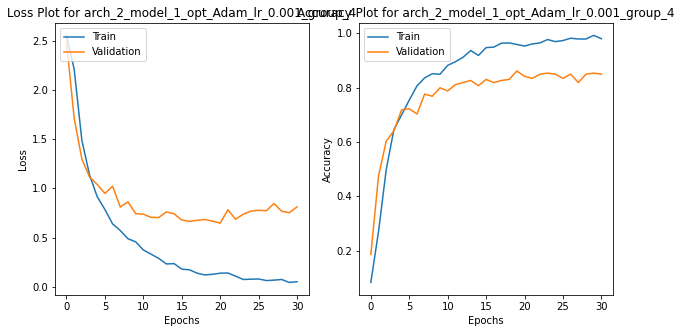

36/36 [==============================] - 1s 40ms/step - loss: 0.7404 - accuracy: 0.8123
arch_2_model_1_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.5628 - accuracy: 0.0899 - val_loss: 1.9224 - val_accuracy: 0.3320
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 1.8490 - accuracy: 0.4049 - val_loss: 1.3864 - val_accuracy: 0.5135
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 1.2671 - accuracy: 0.5720 - val_loss: 1.1384 - val_accuracy: 0.6023
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 0.9469 - accuracy: 0.6729 - val_loss: 1.0486 - val_accuracy: 0.6795
Epoch 5/250
33/33 [==============================] - 2s 50ms/step - loss: 0.7586 - accuracy: 0.7266 - val_loss: 1.0038 - val_accuracy: 0.6950
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 0.5654 - accuracy: 0.8081 - val_loss: 0.9631 - val_accuracy: 0.7490
Epoch 7/250
33/33 [=

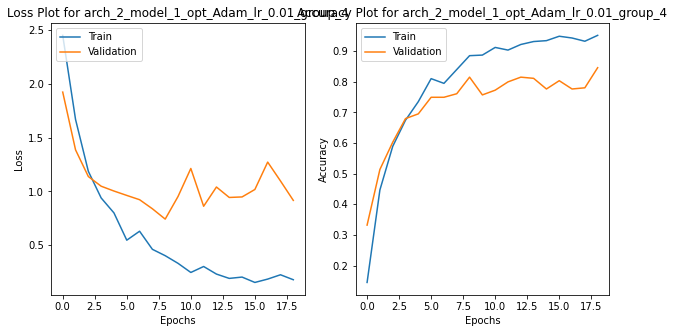

36/36 [==============================] - 1s 40ms/step - loss: 1.0408 - accuracy: 0.7463
arch_2_model_2_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 58ms/step - loss: 2.5839 - accuracy: 0.0807 - val_loss: 2.5690 - val_accuracy: 0.0927
Epoch 2/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5664 - accuracy: 0.0894 - val_loss: 2.5602 - val_accuracy: 0.1120
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5630 - accuracy: 0.0867 - val_loss: 2.5542 - val_accuracy: 0.1120
Epoch 4/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5525 - accuracy: 0.0929 - val_loss: 2.5485 - val_accuracy: 0.1236
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5534 - accuracy: 0.0841 - val_loss: 2.5436 - val_accuracy: 0.1351
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5443 - accuracy: 0.1155 - val_loss: 2.5376 - val_accuracy: 0.1467
Epoch 7/250
33/33 [=

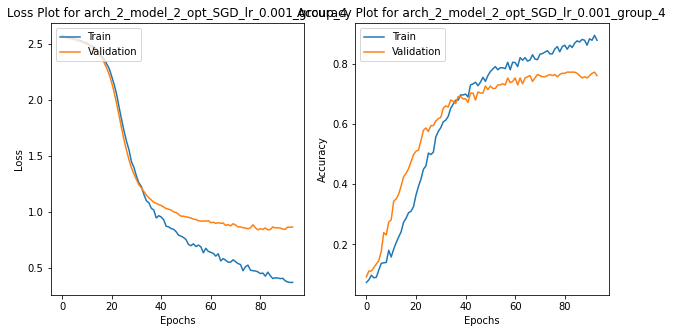

36/36 [==============================] - 1s 38ms/step - loss: 0.9066 - accuracy: 0.7341
arch_2_model_2_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 55ms/step - loss: 2.5815 - accuracy: 0.0823 - val_loss: 2.5387 - val_accuracy: 0.1351
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5284 - accuracy: 0.1425 - val_loss: 2.4630 - val_accuracy: 0.3166
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.4231 - accuracy: 0.2560 - val_loss: 2.1004 - val_accuracy: 0.4595
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 1.9593 - accuracy: 0.4159 - val_loss: 1.3808 - val_accuracy: 0.5753
Epoch 5/250
33/33 [==============================] - 2s 51ms/step - loss: 1.2619 - accuracy: 0.5993 - val_loss: 1.1475 - val_accuracy: 0.6834
Epoch 6/250
33/33 [==============================] - 2s 50ms/step - loss: 0.9756 - accuracy: 0.6905 - val_loss: 1.0775 - val_accuracy: 0.7259
Epoch 7/250
33/33 [==

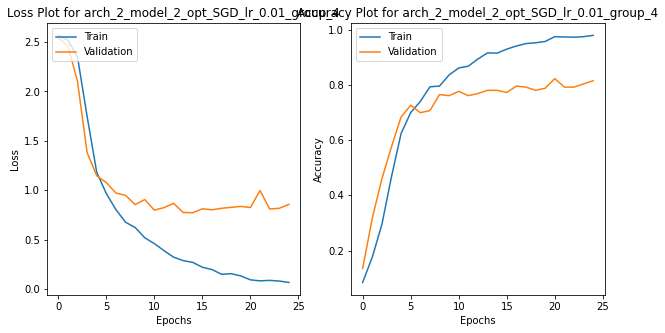

36/36 [==============================] - 1s 39ms/step - loss: 0.7641 - accuracy: 0.7863
arch_2_model_2_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5218 - accuracy: 0.1117 - val_loss: 1.8336 - val_accuracy: 0.4402
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 1.5636 - accuracy: 0.4950 - val_loss: 1.1529 - val_accuracy: 0.6293
Epoch 3/250
33/33 [==============================] - 2s 54ms/step - loss: 0.9460 - accuracy: 0.7091 - val_loss: 1.0463 - val_accuracy: 0.7104
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.7439 - accuracy: 0.7486 - val_loss: 0.9283 - val_accuracy: 0.7297
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 0.5248 - accuracy: 0.8328 - val_loss: 0.9013 - val_accuracy: 0.7490
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4192 - accuracy: 0.8766 - val_loss: 0.7907 - val_accuracy: 0.7683
Epoch 7/250
33/33 [

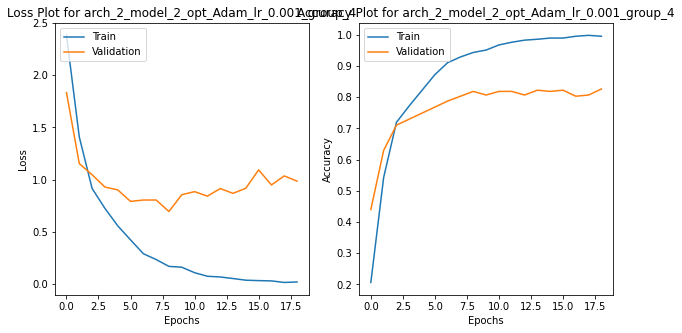

36/36 [==============================] - 1s 38ms/step - loss: 0.8810 - accuracy: 0.7550
arch_2_model_2_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 58ms/step - loss: 2.7672 - accuracy: 0.1143 - val_loss: 1.5372 - val_accuracy: 0.5058
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 1.2333 - accuracy: 0.5850 - val_loss: 0.8867 - val_accuracy: 0.7452
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 0.6414 - accuracy: 0.7967 - val_loss: 0.8164 - val_accuracy: 0.7761
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.4620 - accuracy: 0.8665 - val_loss: 0.7469 - val_accuracy: 0.8224
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 0.2747 - accuracy: 0.9259 - val_loss: 0.7621 - val_accuracy: 0.7915
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 0.3103 - accuracy: 0.9108 - val_loss: 0.8979 - val_accuracy: 0.7876
Epoch 7/250
33/33 [=

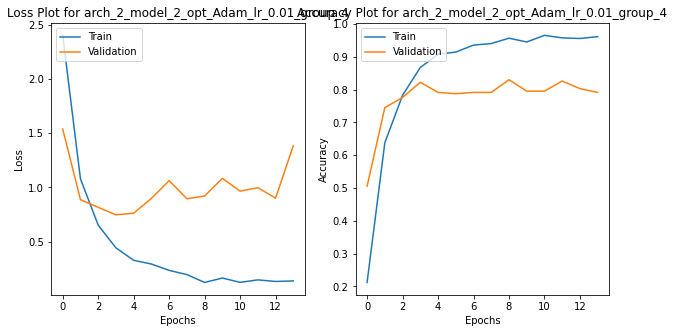

36/36 [==============================] - 1s 36ms/step - loss: 0.7849 - accuracy: 0.7941
arch_3_model_1_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5743 - accuracy: 0.0616 - val_loss: 2.5662 - val_accuracy: 0.0772
Epoch 2/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5689 - accuracy: 0.0789 - val_loss: 2.5634 - val_accuracy: 0.0772
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5673 - accuracy: 0.0859 - val_loss: 2.5619 - val_accuracy: 0.0927
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5616 - accuracy: 0.0862 - val_loss: 2.5603 - val_accuracy: 0.1351
Epoch 5/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5636 - accuracy: 0.0893 - val_loss: 2.5588 - val_accuracy: 0.1236
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5608 - accuracy: 0.0886 - val_loss: 2.5583 - val_accuracy: 0.1081
Epoch 7/250
33/33 [=

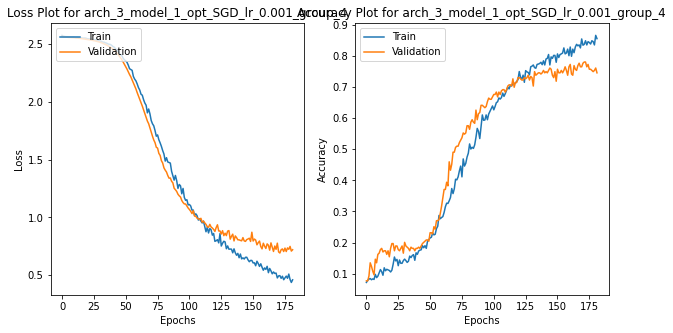

36/36 [==============================] - 1s 37ms/step - loss: 0.7246 - accuracy: 0.7819
arch_3_model_1_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.5673 - accuracy: 0.0811 - val_loss: 2.5612 - val_accuracy: 0.0734
Epoch 2/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5629 - accuracy: 0.0724 - val_loss: 2.5571 - val_accuracy: 0.0888
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5608 - accuracy: 0.0844 - val_loss: 2.5513 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5559 - accuracy: 0.0862 - val_loss: 2.5393 - val_accuracy: 0.1004
Epoch 5/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5413 - accuracy: 0.1194 - val_loss: 2.5164 - val_accuracy: 0.1737
Epoch 6/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5161 - accuracy: 0.1359 - val_loss: 2.4574 - val_accuracy: 0.1931
Epoch 7/250
33/33 [==

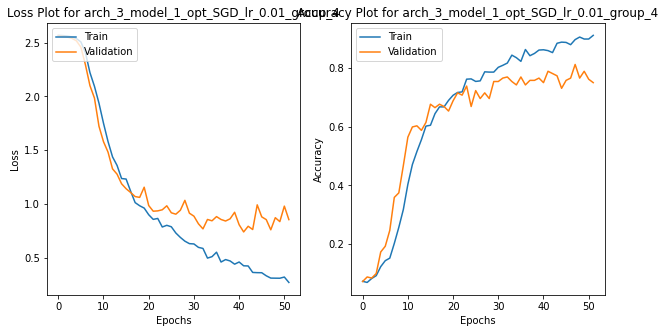

36/36 [==============================] - 1s 38ms/step - loss: 0.9286 - accuracy: 0.7507
arch_3_model_1_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 3s 58ms/step - loss: 2.5718 - accuracy: 0.0672 - val_loss: 2.5568 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5430 - accuracy: 0.1034 - val_loss: 2.3821 - val_accuracy: 0.1699
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.3026 - accuracy: 0.2095 - val_loss: 1.9482 - val_accuracy: 0.3320
Epoch 4/250
33/33 [==============================] - 2s 50ms/step - loss: 1.9833 - accuracy: 0.3167 - val_loss: 1.7817 - val_accuracy: 0.4208
Epoch 5/250
33/33 [==============================] - 2s 51ms/step - loss: 1.6768 - accuracy: 0.4210 - val_loss: 1.5542 - val_accuracy: 0.4826
Epoch 6/250
33/33 [==============================] - 2s 48ms/step - loss: 1.4826 - accuracy: 0.5124 - val_loss: 1.3871 - val_accuracy: 0.5946
Epoch 7/250
33/33 [

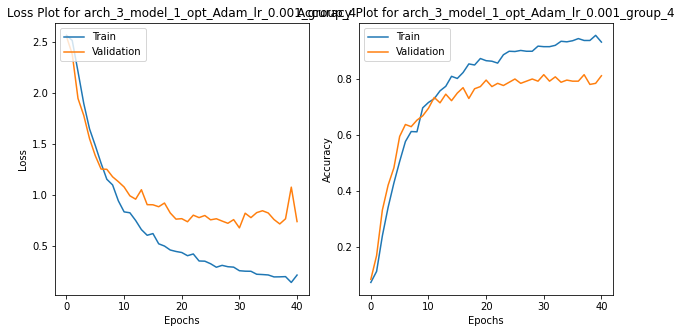

36/36 [==============================] - 2s 42ms/step - loss: 0.7518 - accuracy: 0.7950
arch_3_model_1_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5762 - accuracy: 0.0711 - val_loss: 2.5651 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5672 - accuracy: 0.0703 - val_loss: 2.5644 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5647 - accuracy: 0.0848 - val_loss: 2.5641 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5650 - accuracy: 0.0831 - val_loss: 2.5641 - val_accuracy: 0.0849
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5628 - accuracy: 0.0977 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5659 - accuracy: 0.0838 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 7/250
33/33 [=

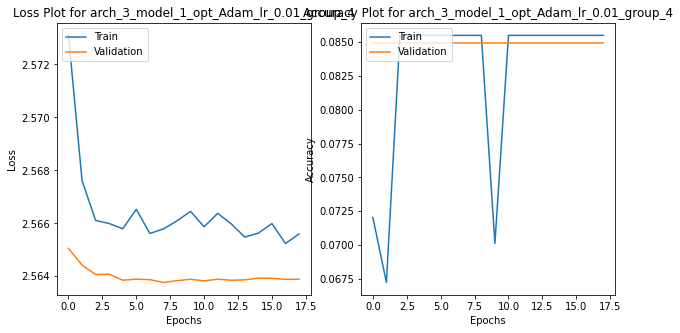

36/36 [==============================] - 1s 38ms/step - loss: 2.5645 - accuracy: 0.0243
arch_3_model_2_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5664 - accuracy: 0.0569 - val_loss: 2.5654 - val_accuracy: 0.0579
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5659 - accuracy: 0.0691 - val_loss: 2.5651 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5647 - accuracy: 0.0893 - val_loss: 2.5648 - val_accuracy: 0.0927
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5650 - accuracy: 0.0983 - val_loss: 2.5646 - val_accuracy: 0.0811
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5653 - accuracy: 0.0869 - val_loss: 2.5643 - val_accuracy: 0.0695
Epoch 6/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5649 - accuracy: 0.0750 - val_loss: 2.5641 - val_accuracy: 0.0772
Epoch 7/250
33/33 [=

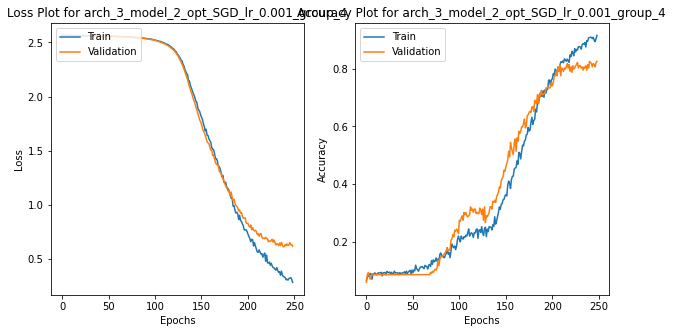

36/36 [==============================] - 1s 38ms/step - loss: 0.7074 - accuracy: 0.8123
arch_3_model_2_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 56ms/step - loss: 2.5678 - accuracy: 0.0887 - val_loss: 2.5641 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5635 - accuracy: 0.0853 - val_loss: 2.5630 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 50ms/step - loss: 2.5628 - accuracy: 0.0993 - val_loss: 2.5622 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5641 - accuracy: 0.0752 - val_loss: 2.5612 - val_accuracy: 0.0849
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5639 - accuracy: 0.0729 - val_loss: 2.5603 - val_accuracy: 0.0849
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5606 - accuracy: 0.0956 - val_loss: 2.5594 - val_accuracy: 0.0849
Epoch 7/250
33/33 [==

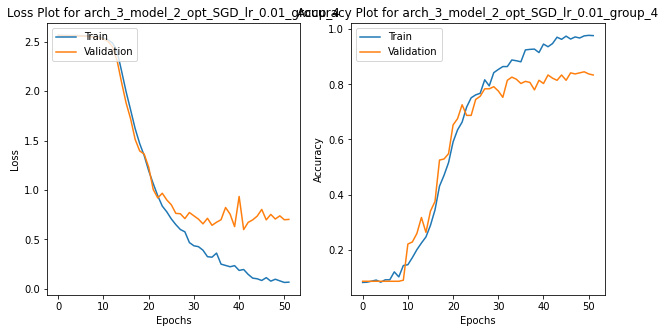

36/36 [==============================] - 1s 40ms/step - loss: 0.7428 - accuracy: 0.8089
arch_3_model_2_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 58ms/step - loss: 2.5671 - accuracy: 0.0582 - val_loss: 2.5620 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5454 - accuracy: 0.1169 - val_loss: 2.3415 - val_accuracy: 0.1197
Epoch 3/250
33/33 [==============================] - 2s 52ms/step - loss: 2.2592 - accuracy: 0.1657 - val_loss: 2.0032 - val_accuracy: 0.2973
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 1.8130 - accuracy: 0.3563 - val_loss: 1.4833 - val_accuracy: 0.5405
Epoch 5/250
33/33 [==============================] - 2s 53ms/step - loss: 1.3914 - accuracy: 0.4698 - val_loss: 1.1218 - val_accuracy: 0.6641
Epoch 6/250
33/33 [==============================] - 2s 53ms/step - loss: 1.0110 - accuracy: 0.6323 - val_loss: 0.8585 - val_accuracy: 0.7375
Epoch 7/250
33/33 [

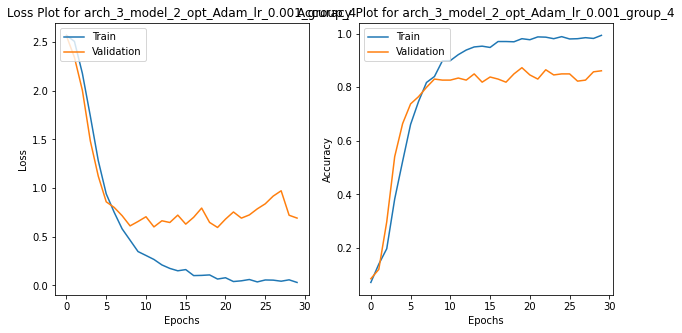

36/36 [==============================] - 1s 36ms/step - loss: 0.6337 - accuracy: 0.8436
arch_3_model_2_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 57ms/step - loss: 2.6613 - accuracy: 0.0833 - val_loss: 2.5643 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5680 - accuracy: 0.0872 - val_loss: 2.5641 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5648 - accuracy: 0.0780 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5651 - accuracy: 0.0879 - val_loss: 2.5641 - val_accuracy: 0.0849
Epoch 5/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5648 - accuracy: 0.0854 - val_loss: 2.5640 - val_accuracy: 0.0849
Epoch 6/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5666 - accuracy: 0.0853 - val_loss: 2.5641 - val_accuracy: 0.0849
Epoch 7/250
33/33 [=

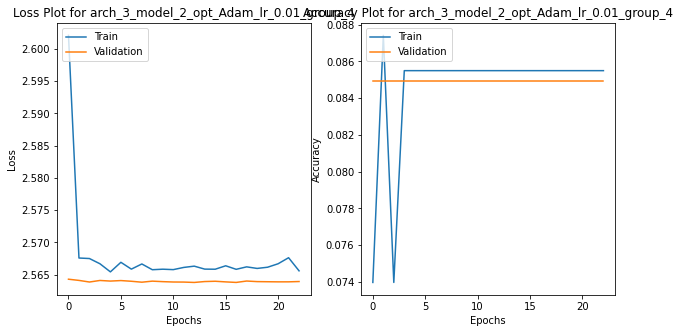

36/36 [==============================] - 1s 39ms/step - loss: 2.5640 - accuracy: 0.0243
arch_3_model_3_group_4_opt_SGD_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 54ms/step - loss: 2.5742 - accuracy: 0.0658 - val_loss: 2.5617 - val_accuracy: 0.0772
Epoch 2/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5638 - accuracy: 0.0711 - val_loss: 2.5579 - val_accuracy: 0.0811
Epoch 3/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5622 - accuracy: 0.0812 - val_loss: 2.5547 - val_accuracy: 0.1042
Epoch 4/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5581 - accuracy: 0.0793 - val_loss: 2.5521 - val_accuracy: 0.1042
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5537 - accuracy: 0.1111 - val_loss: 2.5492 - val_accuracy: 0.1274
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5543 - accuracy: 0.0959 - val_loss: 2.5469 - val_accuracy: 0.1429
Epoch 7/250
33/33 [=

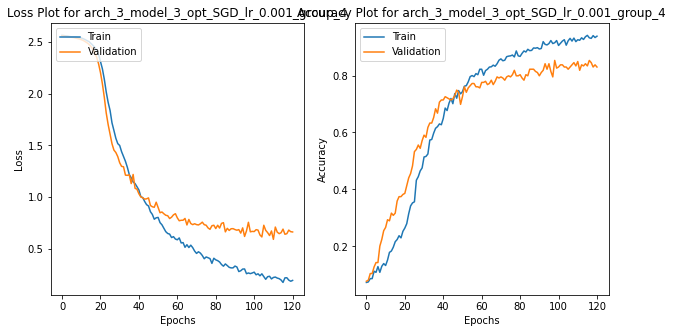

36/36 [==============================] - 1s 41ms/step - loss: 0.5888 - accuracy: 0.8367
arch_3_model_3_group_4_opt_SGD_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5677 - accuracy: 0.0812 - val_loss: 2.5623 - val_accuracy: 0.1274
Epoch 2/250
33/33 [==============================] - 2s 52ms/step - loss: 2.5646 - accuracy: 0.0745 - val_loss: 2.5540 - val_accuracy: 0.0888
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5475 - accuracy: 0.1255 - val_loss: 2.5255 - val_accuracy: 0.1931
Epoch 4/250
33/33 [==============================] - 2s 46ms/step - loss: 2.5056 - accuracy: 0.1904 - val_loss: 2.3112 - val_accuracy: 0.3822
Epoch 5/250
33/33 [==============================] - 2s 48ms/step - loss: 2.2442 - accuracy: 0.3078 - val_loss: 1.7716 - val_accuracy: 0.4170
Epoch 6/250
33/33 [==============================] - 2s 50ms/step - loss: 1.8074 - accuracy: 0.4127 - val_loss: 1.5200 - val_accuracy: 0.5830
Epoch 7/250
33/33 [==

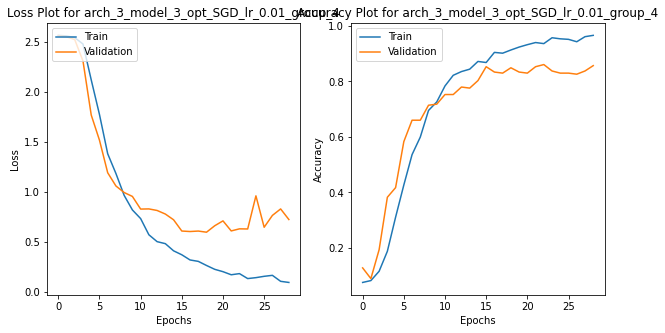

36/36 [==============================] - 1s 37ms/step - loss: 0.6058 - accuracy: 0.8262
arch_3_model_3_group_4_opt_Adam_lr_0.001
Epoch 1/250
33/33 [==============================] - 2s 53ms/step - loss: 2.5691 - accuracy: 0.0722 - val_loss: 2.4653 - val_accuracy: 0.2432
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.2499 - accuracy: 0.2585 - val_loss: 1.5996 - val_accuracy: 0.5753
Epoch 3/250
33/33 [==============================] - 2s 48ms/step - loss: 1.3952 - accuracy: 0.5434 - val_loss: 1.0154 - val_accuracy: 0.7066
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 0.9203 - accuracy: 0.7034 - val_loss: 0.8446 - val_accuracy: 0.7568
Epoch 5/250
33/33 [==============================] - 2s 49ms/step - loss: 0.6193 - accuracy: 0.8383 - val_loss: 0.8172 - val_accuracy: 0.7568
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 0.5154 - accuracy: 0.8328 - val_loss: 0.6845 - val_accuracy: 0.8224
Epoch 7/250
33/33 [

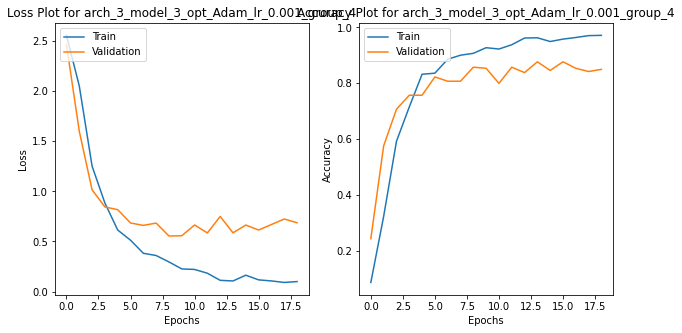

36/36 [==============================] - 1s 37ms/step - loss: 0.6112 - accuracy: 0.8297
arch_3_model_3_group_4_opt_Adam_lr_0.01
Epoch 1/250
33/33 [==============================] - 2s 52ms/step - loss: 5.3748 - accuracy: 0.0771 - val_loss: 2.5648 - val_accuracy: 0.0849
Epoch 2/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5671 - accuracy: 0.0813 - val_loss: 2.5643 - val_accuracy: 0.0849
Epoch 3/250
33/33 [==============================] - 2s 47ms/step - loss: 2.5667 - accuracy: 0.0853 - val_loss: 2.5644 - val_accuracy: 0.0849
Epoch 4/250
33/33 [==============================] - 2s 48ms/step - loss: 2.5686 - accuracy: 0.0641 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 5/250
33/33 [==============================] - 2s 51ms/step - loss: 2.5656 - accuracy: 0.0908 - val_loss: 2.5640 - val_accuracy: 0.0849
Epoch 6/250
33/33 [==============================] - 2s 49ms/step - loss: 2.5656 - accuracy: 0.0848 - val_loss: 2.5639 - val_accuracy: 0.0849
Epoch 7/250
33/33 [=

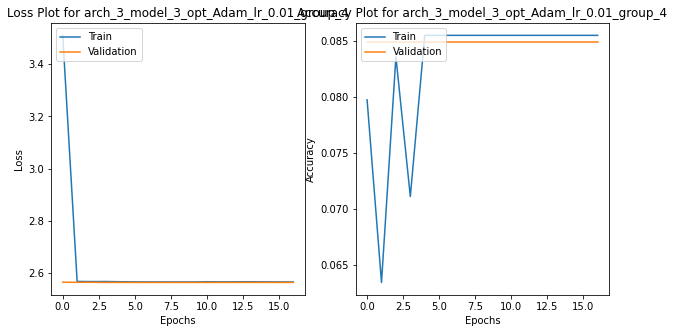

36/36 [==============================] - 1s 38ms/step - loss: 2.5647 - accuracy: 0.0243
Found 464 images belonging to 7 classes.
Found 115 images belonging to 7 classes.
Found 446 images belonging to 7 classes.
arch_1_model_1_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 146s 10s/step - loss: 1.9534 - accuracy: 0.1747 - val_loss: 1.9013 - val_accuracy: 0.2957
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9104 - accuracy: 0.1837 - val_loss: 1.8829 - val_accuracy: 0.2522
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 1.8974 - accuracy: 0.1662 - val_loss: 1.8665 - val_accuracy: 0.2261
Epoch 4/250
15/15 [==============================] - 1s 48ms/step - loss: 1.8833 - accuracy: 0.2338 - val_loss: 1.8526 - val_accuracy: 0.2609
Epoch 5/250
15/15 [==============================] - 1s 48ms/step - loss: 1.8626 - accuracy: 0.2569 - val_loss: 1.8458 - val_accuracy: 0.2348
Epoch 6/250
15/15 [===================

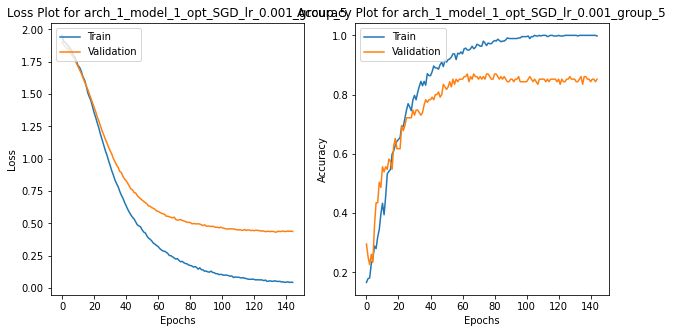

14/14 [==============================] - 112s 9s/step - loss: 0.4730 - accuracy: 0.8386
arch_1_model_1_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 70ms/step - loss: 2.0558 - accuracy: 0.1426 - val_loss: 1.9282 - val_accuracy: 0.1565
Epoch 2/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9119 - accuracy: 0.1884 - val_loss: 1.8585 - val_accuracy: 0.3565
Epoch 3/250
15/15 [==============================] - 1s 53ms/step - loss: 1.8320 - accuracy: 0.3384 - val_loss: 1.7812 - val_accuracy: 0.4174
Epoch 4/250
15/15 [==============================] - 1s 48ms/step - loss: 1.7458 - accuracy: 0.4847 - val_loss: 1.6654 - val_accuracy: 0.5304
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 1.5574 - accuracy: 0.5449 - val_loss: 1.4771 - val_accuracy: 0.5826
Epoch 6/250
15/15 [==============================] - 1s 49ms/step - loss: 1.3809 - accuracy: 0.6316 - val_loss: 1.2288 - val_accuracy: 0.6522
Epoch 7/250
15/15 [==

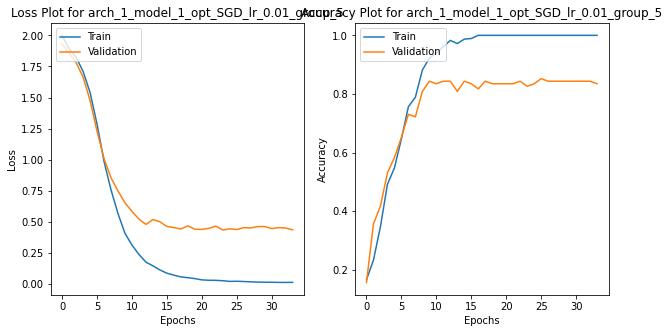

14/14 [==============================] - 1s 41ms/step - loss: 0.5035 - accuracy: 0.8296
arch_1_model_1_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 67ms/step - loss: 2.0725 - accuracy: 0.1716 - val_loss: 1.6587 - val_accuracy: 0.5130
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.4768 - accuracy: 0.6256 - val_loss: 1.2008 - val_accuracy: 0.7304
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 0.9955 - accuracy: 0.7727 - val_loss: 0.8911 - val_accuracy: 0.7913
Epoch 4/250
15/15 [==============================] - 1s 49ms/step - loss: 0.6981 - accuracy: 0.8526 - val_loss: 0.7166 - val_accuracy: 0.8174
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 0.4270 - accuracy: 0.9382 - val_loss: 0.6026 - val_accuracy: 0.8522
Epoch 6/250
15/15 [==============================] - 1s 48ms/step - loss: 0.3041 - accuracy: 0.9467 - val_loss: 0.5201 - val_accuracy: 0.8609
Epoch 7/250
15/15 [

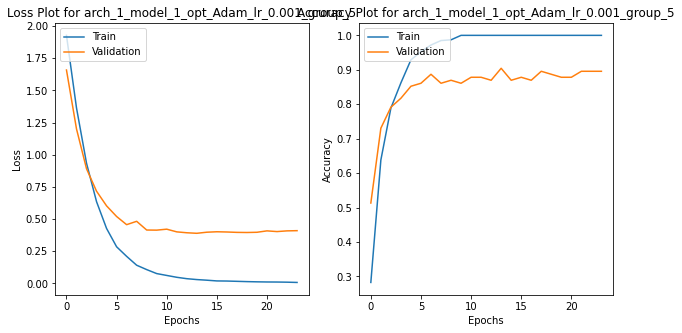

14/14 [==============================] - 1s 44ms/step - loss: 0.4138 - accuracy: 0.8587
arch_1_model_1_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 58ms/step - loss: 7.3135 - accuracy: 0.1857 - val_loss: 1.3199 - val_accuracy: 0.6348
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 0.9033 - accuracy: 0.7209 - val_loss: 0.6762 - val_accuracy: 0.8000
Epoch 3/250
15/15 [==============================] - 1s 47ms/step - loss: 0.2080 - accuracy: 0.9401 - val_loss: 0.5151 - val_accuracy: 0.8174
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 0.0681 - accuracy: 0.9905 - val_loss: 0.5715 - val_accuracy: 0.8348
Epoch 5/250
15/15 [==============================] - 1s 47ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.6422 - val_accuracy: 0.8696
Epoch 6/250
15/15 [==============================] - 1s 53ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.6752 - val_accuracy: 0.8435
Epoch 7/250
15/15 [=

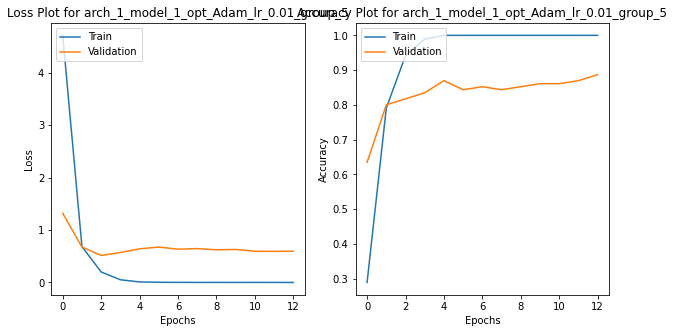

14/14 [==============================] - 1s 40ms/step - loss: 0.5145 - accuracy: 0.8296
arch_1_model_2_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 60ms/step - loss: 2.0085 - accuracy: 0.1269 - val_loss: 1.9230 - val_accuracy: 0.2000
Epoch 2/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9311 - accuracy: 0.1501 - val_loss: 1.9033 - val_accuracy: 0.2609
Epoch 3/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9061 - accuracy: 0.1836 - val_loss: 1.8912 - val_accuracy: 0.2957
Epoch 4/250
15/15 [==============================] - 1s 55ms/step - loss: 1.9006 - accuracy: 0.2194 - val_loss: 1.8808 - val_accuracy: 0.3391
Epoch 5/250
15/15 [==============================] - 1s 63ms/step - loss: 1.8551 - accuracy: 0.2987 - val_loss: 1.8711 - val_accuracy: 0.4000
Epoch 6/250
15/15 [==============================] - 1s 53ms/step - loss: 1.8693 - accuracy: 0.2610 - val_loss: 1.8617 - val_accuracy: 0.4174
Epoch 7/250
15/15 [=

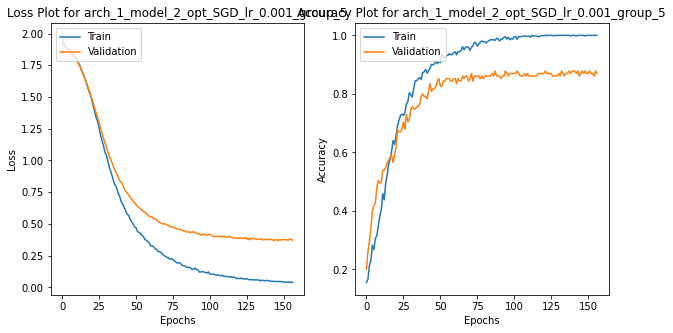

14/14 [==============================] - 1s 37ms/step - loss: 0.4894 - accuracy: 0.8386
arch_1_model_2_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 1.9895 - accuracy: 0.2113 - val_loss: 1.8988 - val_accuracy: 0.2522
Epoch 2/250
15/15 [==============================] - 1s 56ms/step - loss: 1.8650 - accuracy: 0.2574 - val_loss: 1.7828 - val_accuracy: 0.4000
Epoch 3/250
15/15 [==============================] - 1s 55ms/step - loss: 1.7171 - accuracy: 0.5049 - val_loss: 1.5855 - val_accuracy: 0.5217
Epoch 4/250
15/15 [==============================] - 1s 55ms/step - loss: 1.4955 - accuracy: 0.6005 - val_loss: 1.3038 - val_accuracy: 0.6435
Epoch 5/250
15/15 [==============================] - 1s 55ms/step - loss: 1.1177 - accuracy: 0.6999 - val_loss: 1.0432 - val_accuracy: 0.7304
Epoch 6/250
15/15 [==============================] - 1s 56ms/step - loss: 0.8450 - accuracy: 0.7756 - val_loss: 0.8463 - val_accuracy: 0.7304
Epoch 7/250
15/15 [==

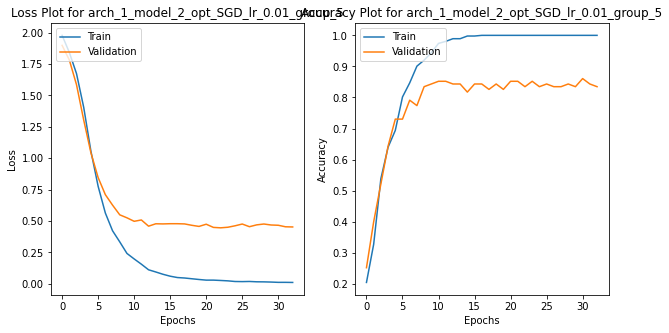

14/14 [==============================] - 1s 41ms/step - loss: 0.5816 - accuracy: 0.8072
arch_1_model_2_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 66ms/step - loss: 2.1828 - accuracy: 0.2279 - val_loss: 1.7679 - val_accuracy: 0.3565
Epoch 2/250
15/15 [==============================] - 1s 49ms/step - loss: 1.6520 - accuracy: 0.4704 - val_loss: 1.3797 - val_accuracy: 0.7043
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.2148 - accuracy: 0.7480 - val_loss: 1.1034 - val_accuracy: 0.7391
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 0.9772 - accuracy: 0.7615 - val_loss: 0.8978 - val_accuracy: 0.7478
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 0.7089 - accuracy: 0.8518 - val_loss: 0.7685 - val_accuracy: 0.7826
Epoch 6/250
15/15 [==============================] - 1s 48ms/step - loss: 0.5702 - accuracy: 0.8687 - val_loss: 0.6575 - val_accuracy: 0.8261
Epoch 7/250
15/15 [

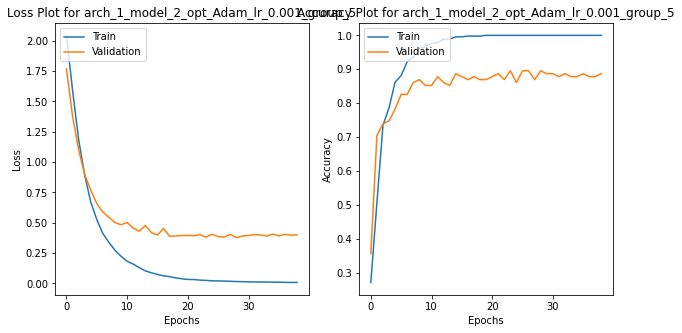

14/14 [==============================] - 1s 40ms/step - loss: 0.4678 - accuracy: 0.8543
arch_1_model_2_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 63ms/step - loss: 5.9679 - accuracy: 0.1656 - val_loss: 1.3408 - val_accuracy: 0.4435
Epoch 2/250
15/15 [==============================] - 1s 54ms/step - loss: 1.0474 - accuracy: 0.6421 - val_loss: 0.6605 - val_accuracy: 0.8000
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 0.3076 - accuracy: 0.9461 - val_loss: 0.5396 - val_accuracy: 0.8609
Epoch 4/250
15/15 [==============================] - 1s 51ms/step - loss: 0.0518 - accuracy: 0.9914 - val_loss: 0.5128 - val_accuracy: 0.8522
Epoch 5/250
15/15 [==============================] - 1s 58ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.5700 - val_accuracy: 0.8435
Epoch 6/250
15/15 [==============================] - 1s 51ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.5965 - val_accuracy: 0.8435
Epoch 7/250
15/15 [=

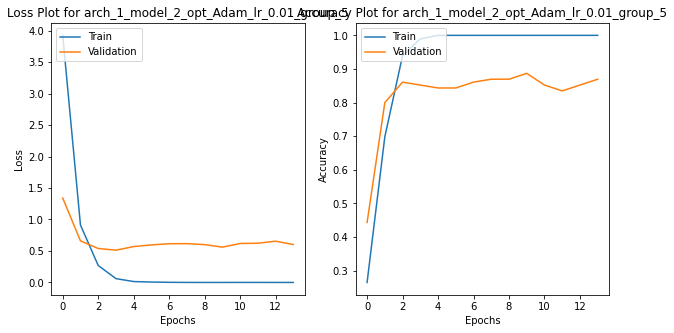

14/14 [==============================] - 1s 40ms/step - loss: 0.7491 - accuracy: 0.8027
arch_1_model_3_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 63ms/step - loss: 1.9810 - accuracy: 0.1237 - val_loss: 1.9274 - val_accuracy: 0.1304
Epoch 2/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9175 - accuracy: 0.2496 - val_loss: 1.9136 - val_accuracy: 0.1565
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 1.9071 - accuracy: 0.1641 - val_loss: 1.9062 - val_accuracy: 0.1826
Epoch 4/250
15/15 [==============================] - 1s 52ms/step - loss: 1.9120 - accuracy: 0.1956 - val_loss: 1.9002 - val_accuracy: 0.2261
Epoch 5/250
15/15 [==============================] - 1s 47ms/step - loss: 1.9009 - accuracy: 0.2100 - val_loss: 1.8944 - val_accuracy: 0.2087
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9026 - accuracy: 0.2059 - val_loss: 1.8888 - val_accuracy: 0.2870
Epoch 7/250
15/15 [=

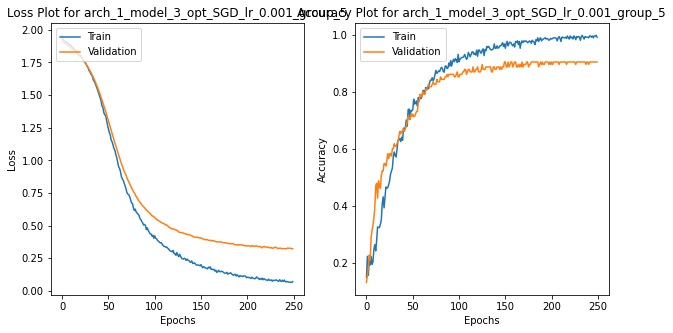

14/14 [==============================] - 1s 38ms/step - loss: 0.4377 - accuracy: 0.8498
arch_1_model_3_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 58ms/step - loss: 1.9791 - accuracy: 0.1494 - val_loss: 1.8799 - val_accuracy: 0.2696
Epoch 2/250
15/15 [==============================] - 1s 51ms/step - loss: 1.8759 - accuracy: 0.2753 - val_loss: 1.8305 - val_accuracy: 0.4696
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 1.8078 - accuracy: 0.3750 - val_loss: 1.7640 - val_accuracy: 0.4957
Epoch 4/250
15/15 [==============================] - 1s 52ms/step - loss: 1.7172 - accuracy: 0.4623 - val_loss: 1.6639 - val_accuracy: 0.6087
Epoch 5/250
15/15 [==============================] - 1s 48ms/step - loss: 1.5975 - accuracy: 0.5692 - val_loss: 1.5107 - val_accuracy: 0.6174
Epoch 6/250
15/15 [==============================] - 1s 55ms/step - loss: 1.4139 - accuracy: 0.6556 - val_loss: 1.3196 - val_accuracy: 0.6870
Epoch 7/250
15/15 [==

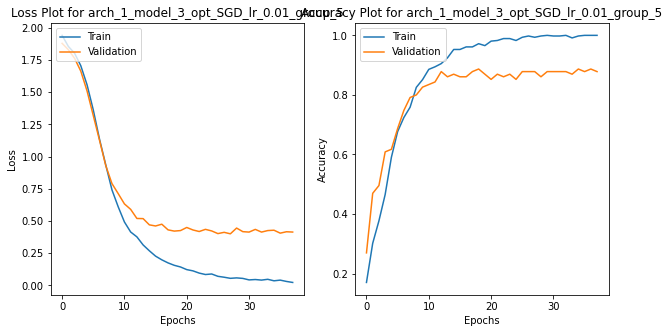

14/14 [==============================] - 1s 37ms/step - loss: 0.4697 - accuracy: 0.8386
arch_1_model_3_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 2.0607 - accuracy: 0.1658 - val_loss: 1.9206 - val_accuracy: 0.2000
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.8201 - accuracy: 0.3260 - val_loss: 1.6251 - val_accuracy: 0.4870
Epoch 3/250
15/15 [==============================] - 1s 48ms/step - loss: 1.5293 - accuracy: 0.6062 - val_loss: 1.3096 - val_accuracy: 0.7043
Epoch 4/250
15/15 [==============================] - 1s 51ms/step - loss: 1.2013 - accuracy: 0.7037 - val_loss: 1.0489 - val_accuracy: 0.7826
Epoch 5/250
15/15 [==============================] - 1s 50ms/step - loss: 0.8590 - accuracy: 0.8100 - val_loss: 0.8555 - val_accuracy: 0.8348
Epoch 6/250
15/15 [==============================] - 1s 47ms/step - loss: 0.6363 - accuracy: 0.8828 - val_loss: 0.7302 - val_accuracy: 0.8261
Epoch 7/250
15/15 [

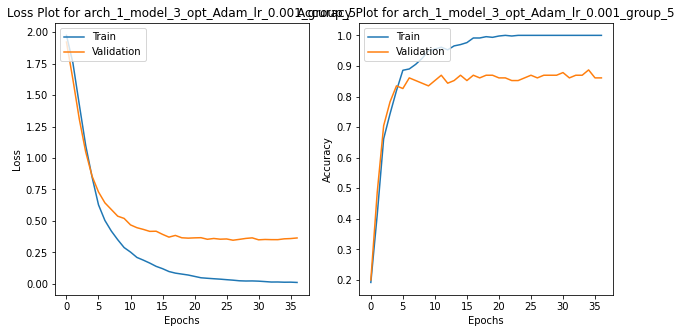

14/14 [==============================] - 1s 39ms/step - loss: 0.4099 - accuracy: 0.8565
arch_1_model_3_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 2.1920 - accuracy: 0.2803 - val_loss: 1.0562 - val_accuracy: 0.5826
Epoch 2/250
15/15 [==============================] - 1s 54ms/step - loss: 0.6877 - accuracy: 0.7583 - val_loss: 0.5157 - val_accuracy: 0.8348
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 0.2026 - accuracy: 0.9313 - val_loss: 0.4973 - val_accuracy: 0.8696
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 0.0720 - accuracy: 0.9853 - val_loss: 0.4768 - val_accuracy: 0.8609
Epoch 5/250
15/15 [==============================] - 1s 46ms/step - loss: 0.0294 - accuracy: 0.9951 - val_loss: 0.4856 - val_accuracy: 0.8870
Epoch 6/250
15/15 [==============================] - 1s 49ms/step - loss: 0.0286 - accuracy: 0.9923 - val_loss: 0.5229 - val_accuracy: 0.8435
Epoch 7/250
15/15 [=

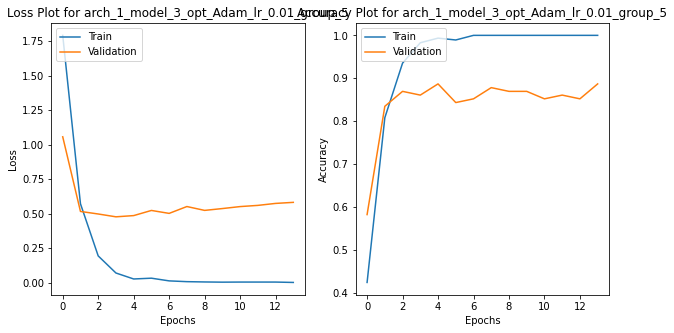

14/14 [==============================] - 1s 38ms/step - loss: 0.4860 - accuracy: 0.8430
arch_1_model_4_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 1.9931 - accuracy: 0.1642 - val_loss: 1.9004 - val_accuracy: 0.2261
Epoch 2/250
15/15 [==============================] - 1s 50ms/step - loss: 1.8952 - accuracy: 0.2143 - val_loss: 1.8787 - val_accuracy: 0.2087
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 1.8712 - accuracy: 0.2986 - val_loss: 1.8587 - val_accuracy: 0.3652
Epoch 4/250
15/15 [==============================] - 1s 56ms/step - loss: 1.8489 - accuracy: 0.3063 - val_loss: 1.8413 - val_accuracy: 0.3565
Epoch 5/250
15/15 [==============================] - 1s 52ms/step - loss: 1.8294 - accuracy: 0.3349 - val_loss: 1.8265 - val_accuracy: 0.4174
Epoch 6/250
15/15 [==============================] - 1s 48ms/step - loss: 1.8065 - accuracy: 0.4113 - val_loss: 1.8073 - val_accuracy: 0.4522
Epoch 7/250
15/15 [=

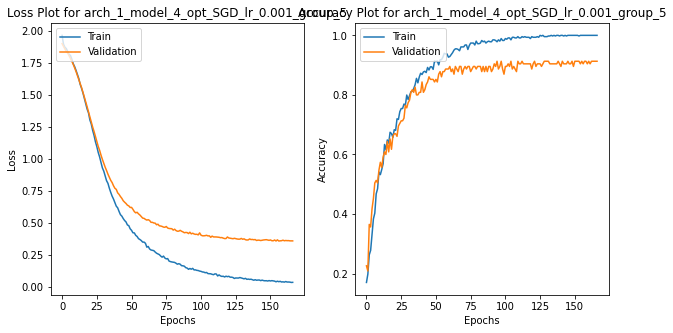

14/14 [==============================] - 1s 42ms/step - loss: 0.4577 - accuracy: 0.8430
arch_1_model_4_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 65ms/step - loss: 1.9596 - accuracy: 0.1717 - val_loss: 1.8784 - val_accuracy: 0.3217
Epoch 2/250
15/15 [==============================] - 1s 52ms/step - loss: 1.8292 - accuracy: 0.3235 - val_loss: 1.6957 - val_accuracy: 0.3826
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 1.5958 - accuracy: 0.5214 - val_loss: 1.4221 - val_accuracy: 0.6000
Epoch 4/250
15/15 [==============================] - 1s 54ms/step - loss: 1.2937 - accuracy: 0.6433 - val_loss: 1.0690 - val_accuracy: 0.6783
Epoch 5/250
15/15 [==============================] - 1s 54ms/step - loss: 0.9287 - accuracy: 0.7595 - val_loss: 0.8563 - val_accuracy: 0.8087
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 0.6073 - accuracy: 0.8333 - val_loss: 0.7460 - val_accuracy: 0.8087
Epoch 7/250
15/15 [==

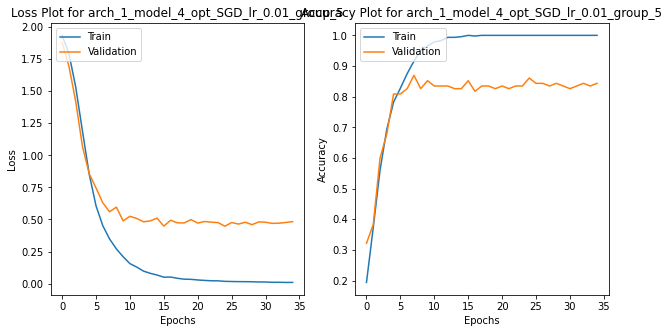

14/14 [==============================] - 1s 45ms/step - loss: 0.5860 - accuracy: 0.8161
arch_1_model_4_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 68ms/step - loss: 1.9887 - accuracy: 0.2315 - val_loss: 1.4022 - val_accuracy: 0.4696
Epoch 2/250
15/15 [==============================] - 1s 56ms/step - loss: 1.2296 - accuracy: 0.6581 - val_loss: 0.9404 - val_accuracy: 0.7130
Epoch 3/250
15/15 [==============================] - 1s 55ms/step - loss: 0.7138 - accuracy: 0.8317 - val_loss: 0.7478 - val_accuracy: 0.7739
Epoch 4/250
15/15 [==============================] - 1s 56ms/step - loss: 0.4951 - accuracy: 0.8990 - val_loss: 0.6561 - val_accuracy: 0.8000
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 0.3820 - accuracy: 0.9188 - val_loss: 0.5785 - val_accuracy: 0.8348
Epoch 6/250
15/15 [==============================] - 1s 61ms/step - loss: 0.2845 - accuracy: 0.9511 - val_loss: 0.5000 - val_accuracy: 0.8522
Epoch 7/250
15/15 [

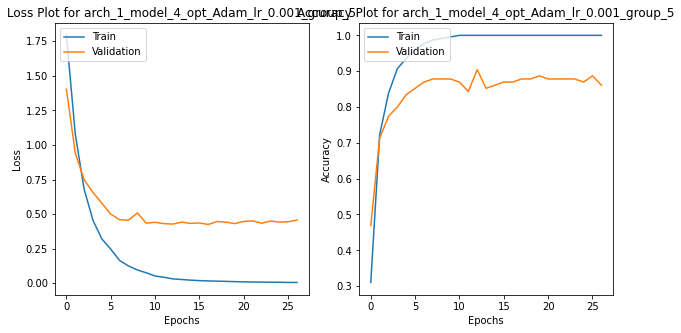

14/14 [==============================] - 1s 39ms/step - loss: 0.5162 - accuracy: 0.8363
arch_1_model_4_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 67ms/step - loss: 9.8272 - accuracy: 0.1336 - val_loss: 1.9397 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9364 - accuracy: 0.1697 - val_loss: 1.9261 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9251 - accuracy: 0.1639 - val_loss: 1.9129 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9073 - accuracy: 0.1705 - val_loss: 1.9071 - val_accuracy: 0.1739
Epoch 5/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9177 - accuracy: 0.1533 - val_loss: 1.9056 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 56ms/step - loss: 1.9251 - accuracy: 0.1281 - val_loss: 1.9054 - val_accuracy: 0.1739
Epoch 7/250
15/15 [=

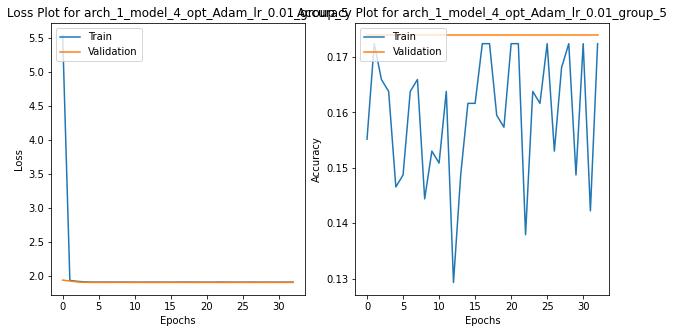

14/14 [==============================] - 1s 42ms/step - loss: 1.8036 - accuracy: 0.2242
arch_1_model_5_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 61ms/step - loss: 1.9416 - accuracy: 0.1627 - val_loss: 1.9043 - val_accuracy: 0.2522
Epoch 2/250
15/15 [==============================] - 1s 57ms/step - loss: 1.9140 - accuracy: 0.1970 - val_loss: 1.8867 - val_accuracy: 0.2522
Epoch 3/250
15/15 [==============================] - 1s 54ms/step - loss: 1.8945 - accuracy: 0.2060 - val_loss: 1.8788 - val_accuracy: 0.2348
Epoch 4/250
15/15 [==============================] - 1s 53ms/step - loss: 1.8568 - accuracy: 0.2591 - val_loss: 1.8622 - val_accuracy: 0.2870
Epoch 5/250
15/15 [==============================] - 1s 56ms/step - loss: 1.8622 - accuracy: 0.2836 - val_loss: 1.8461 - val_accuracy: 0.4261
Epoch 6/250
15/15 [==============================] - 1s 58ms/step - loss: 1.8527 - accuracy: 0.2928 - val_loss: 1.8309 - val_accuracy: 0.4261
Epoch 7/250
15/15 [=

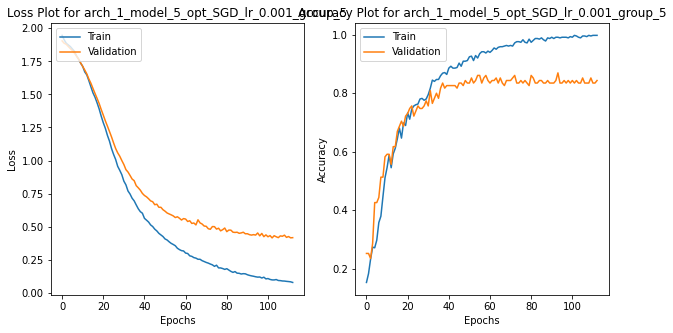

14/14 [==============================] - 1s 39ms/step - loss: 0.5003 - accuracy: 0.8206
arch_1_model_5_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 60ms/step - loss: 1.9365 - accuracy: 0.2031 - val_loss: 1.8384 - val_accuracy: 0.4087
Epoch 2/250
15/15 [==============================] - 1s 49ms/step - loss: 1.8163 - accuracy: 0.3840 - val_loss: 1.7011 - val_accuracy: 0.5130
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 1.6062 - accuracy: 0.5111 - val_loss: 1.4200 - val_accuracy: 0.6609
Epoch 4/250
15/15 [==============================] - 1s 52ms/step - loss: 1.3007 - accuracy: 0.6855 - val_loss: 1.0594 - val_accuracy: 0.6783
Epoch 5/250
15/15 [==============================] - 1s 53ms/step - loss: 0.8777 - accuracy: 0.7920 - val_loss: 0.8182 - val_accuracy: 0.7652
Epoch 6/250
15/15 [==============================] - 1s 56ms/step - loss: 0.6046 - accuracy: 0.8349 - val_loss: 0.6811 - val_accuracy: 0.7913
Epoch 7/250
15/15 [==

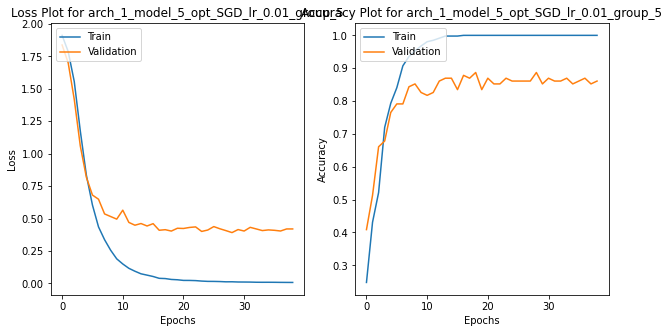

14/14 [==============================] - 1s 40ms/step - loss: 0.4674 - accuracy: 0.8543
arch_1_model_5_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 67ms/step - loss: 2.1852 - accuracy: 0.2027 - val_loss: 1.4824 - val_accuracy: 0.6000
Epoch 2/250
15/15 [==============================] - 1s 56ms/step - loss: 1.3210 - accuracy: 0.7080 - val_loss: 1.0509 - val_accuracy: 0.7391
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 0.8135 - accuracy: 0.7970 - val_loss: 0.8228 - val_accuracy: 0.7391
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 0.5791 - accuracy: 0.8337 - val_loss: 0.6707 - val_accuracy: 0.8348
Epoch 5/250
15/15 [==============================] - 1s 54ms/step - loss: 0.3924 - accuracy: 0.9199 - val_loss: 0.6366 - val_accuracy: 0.8435
Epoch 6/250
15/15 [==============================] - 1s 53ms/step - loss: 0.2517 - accuracy: 0.9636 - val_loss: 0.5943 - val_accuracy: 0.8261
Epoch 7/250
15/15 [

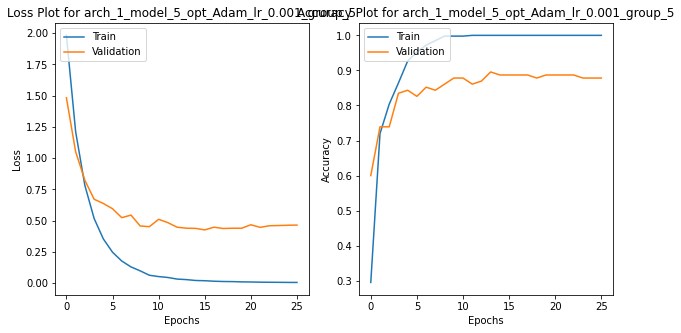

14/14 [==============================] - 1s 36ms/step - loss: 0.4963 - accuracy: 0.8430
arch_1_model_5_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 63ms/step - loss: 8.7937 - accuracy: 0.1872 - val_loss: 1.7449 - val_accuracy: 0.6261
Epoch 2/250
15/15 [==============================] - 1s 55ms/step - loss: 1.4705 - accuracy: 0.6150 - val_loss: 1.0007 - val_accuracy: 0.7043
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 0.7517 - accuracy: 0.7979 - val_loss: 0.8033 - val_accuracy: 0.7391
Epoch 4/250
15/15 [==============================] - 1s 51ms/step - loss: 0.4549 - accuracy: 0.8707 - val_loss: 0.6876 - val_accuracy: 0.7739
Epoch 5/250
15/15 [==============================] - 1s 54ms/step - loss: 0.3436 - accuracy: 0.8679 - val_loss: 0.7486 - val_accuracy: 0.7826
Epoch 6/250
15/15 [==============================] - 1s 51ms/step - loss: 0.1941 - accuracy: 0.9313 - val_loss: 0.7628 - val_accuracy: 0.7565
Epoch 7/250
15/15 [=

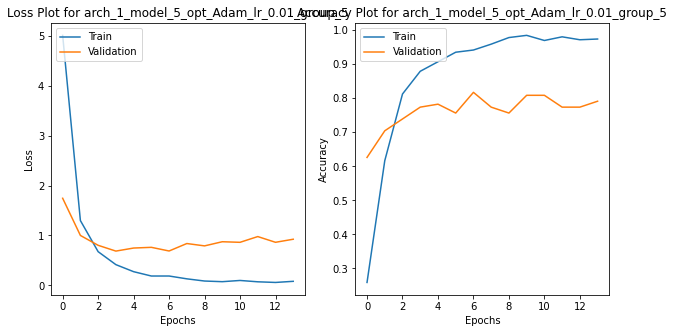

14/14 [==============================] - 1s 38ms/step - loss: 0.6716 - accuracy: 0.7758
arch_1_model_6_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 1.9401 - accuracy: 0.1783 - val_loss: 1.8866 - val_accuracy: 0.2783
Epoch 2/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9110 - accuracy: 0.1793 - val_loss: 1.8701 - val_accuracy: 0.3913
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 1.8836 - accuracy: 0.2308 - val_loss: 1.8554 - val_accuracy: 0.2696
Epoch 4/250
15/15 [==============================] - 1s 59ms/step - loss: 1.8593 - accuracy: 0.3036 - val_loss: 1.8402 - val_accuracy: 0.2174
Epoch 5/250
15/15 [==============================] - 1s 53ms/step - loss: 1.8584 - accuracy: 0.2832 - val_loss: 1.8180 - val_accuracy: 0.2957
Epoch 6/250
15/15 [==============================] - 1s 51ms/step - loss: 1.7830 - accuracy: 0.3605 - val_loss: 1.7948 - val_accuracy: 0.4696
Epoch 7/250
15/15 [=

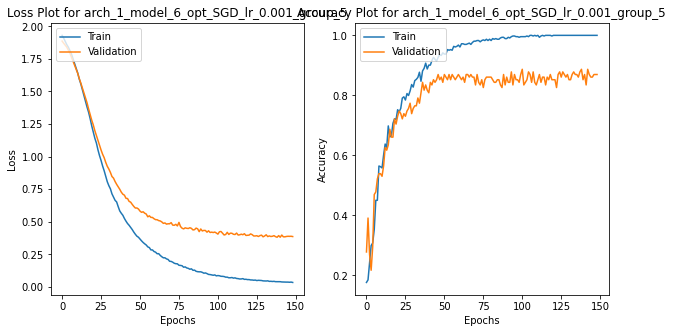

14/14 [==============================] - 1s 37ms/step - loss: 0.4815 - accuracy: 0.8408
arch_1_model_6_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 70ms/step - loss: 1.9504 - accuracy: 0.1604 - val_loss: 1.8665 - val_accuracy: 0.4783
Epoch 2/250
15/15 [==============================] - 1s 50ms/step - loss: 1.8146 - accuracy: 0.4187 - val_loss: 1.7188 - val_accuracy: 0.6087
Epoch 3/250
15/15 [==============================] - 1s 60ms/step - loss: 1.6466 - accuracy: 0.5896 - val_loss: 1.4955 - val_accuracy: 0.5652
Epoch 4/250
15/15 [==============================] - 1s 54ms/step - loss: 1.3628 - accuracy: 0.6374 - val_loss: 1.1638 - val_accuracy: 0.6870
Epoch 5/250
15/15 [==============================] - 1s 50ms/step - loss: 0.9317 - accuracy: 0.7820 - val_loss: 0.9046 - val_accuracy: 0.7304
Epoch 6/250
15/15 [==============================] - 1s 62ms/step - loss: 0.6734 - accuracy: 0.8453 - val_loss: 0.8170 - val_accuracy: 0.7391
Epoch 7/250
15/15 [==

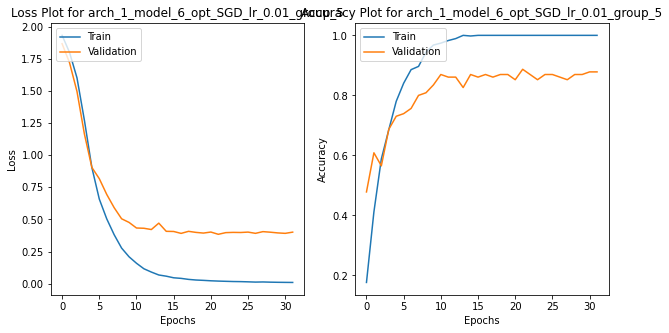

14/14 [==============================] - 1s 38ms/step - loss: 0.4925 - accuracy: 0.8363
arch_1_model_6_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 69ms/step - loss: 2.5776 - accuracy: 0.2026 - val_loss: 1.3743 - val_accuracy: 0.6435
Epoch 2/250
15/15 [==============================] - 1s 53ms/step - loss: 1.1063 - accuracy: 0.7231 - val_loss: 0.8194 - val_accuracy: 0.7478
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 0.5696 - accuracy: 0.8614 - val_loss: 0.6286 - val_accuracy: 0.7913
Epoch 4/250
15/15 [==============================] - 1s 52ms/step - loss: 0.2813 - accuracy: 0.9308 - val_loss: 0.5010 - val_accuracy: 0.8522
Epoch 5/250
15/15 [==============================] - 1s 69ms/step - loss: 0.1337 - accuracy: 0.9728 - val_loss: 0.5106 - val_accuracy: 0.8435
Epoch 6/250
15/15 [==============================] - 1s 56ms/step - loss: 0.0546 - accuracy: 0.9965 - val_loss: 0.3830 - val_accuracy: 0.8783
Epoch 7/250
15/15 [

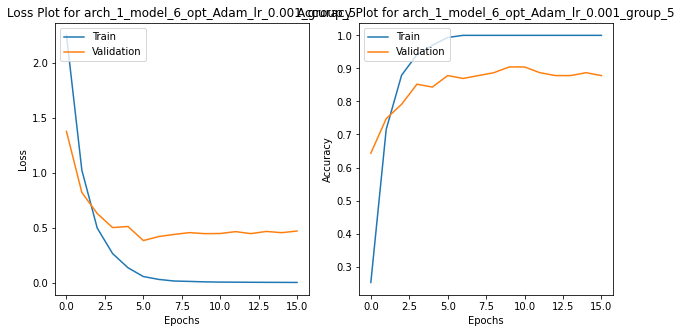

14/14 [==============================] - 1s 38ms/step - loss: 0.5449 - accuracy: 0.8341
arch_1_model_6_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 63ms/step - loss: 19.2153 - accuracy: 0.1755 - val_loss: 1.7951 - val_accuracy: 0.3478
Epoch 2/250
15/15 [==============================] - 1s 53ms/step - loss: 1.8474 - accuracy: 0.3970 - val_loss: 1.6604 - val_accuracy: 0.4696
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.4054 - accuracy: 0.5625 - val_loss: 1.1516 - val_accuracy: 0.6087
Epoch 4/250
15/15 [==============================] - 1s 59ms/step - loss: 0.7903 - accuracy: 0.7724 - val_loss: 1.0251 - val_accuracy: 0.6783
Epoch 5/250
15/15 [==============================] - 1s 56ms/step - loss: 0.4394 - accuracy: 0.8558 - val_loss: 0.8734 - val_accuracy: 0.7304
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 0.3253 - accuracy: 0.9092 - val_loss: 0.9496 - val_accuracy: 0.7130
Epoch 7/250
15/15 [

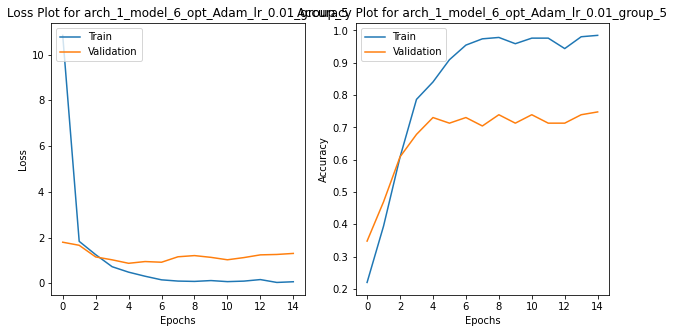

14/14 [==============================] - 1s 40ms/step - loss: 0.8812 - accuracy: 0.7175
arch_2_model_1_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 69ms/step - loss: 2.0131 - accuracy: 0.1582 - val_loss: 1.9320 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9322 - accuracy: 0.1701 - val_loss: 1.9184 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9366 - accuracy: 0.1871 - val_loss: 1.9106 - val_accuracy: 0.2174
Epoch 4/250
15/15 [==============================] - 1s 60ms/step - loss: 1.9137 - accuracy: 0.1802 - val_loss: 1.9076 - val_accuracy: 0.2087
Epoch 5/250
15/15 [==============================] - 1s 56ms/step - loss: 1.9081 - accuracy: 0.1867 - val_loss: 1.9071 - val_accuracy: 0.2261
Epoch 6/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9032 - accuracy: 0.1990 - val_loss: 1.9064 - val_accuracy: 0.1913
Epoch 7/250
15/15 [=

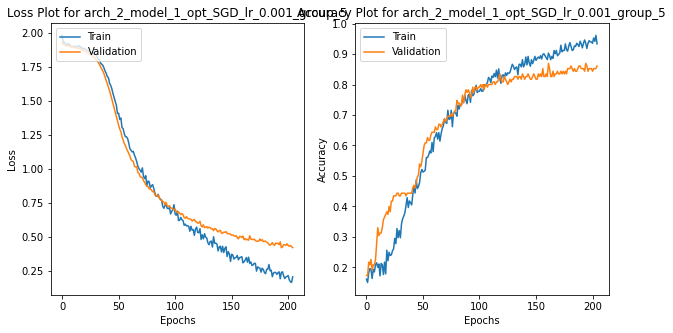

14/14 [==============================] - 1s 37ms/step - loss: 0.4023 - accuracy: 0.8767
arch_2_model_1_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 1.9606 - accuracy: 0.1426 - val_loss: 1.9250 - val_accuracy: 0.2609
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9257 - accuracy: 0.1632 - val_loss: 1.8964 - val_accuracy: 0.2261
Epoch 3/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9009 - accuracy: 0.2177 - val_loss: 1.8726 - val_accuracy: 0.3304
Epoch 4/250
15/15 [==============================] - 1s 57ms/step - loss: 1.8864 - accuracy: 0.2561 - val_loss: 1.8354 - val_accuracy: 0.4000
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 1.8168 - accuracy: 0.2831 - val_loss: 1.7536 - val_accuracy: 0.4696
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 1.7466 - accuracy: 0.3990 - val_loss: 1.5358 - val_accuracy: 0.5217
Epoch 7/250
15/15 [==

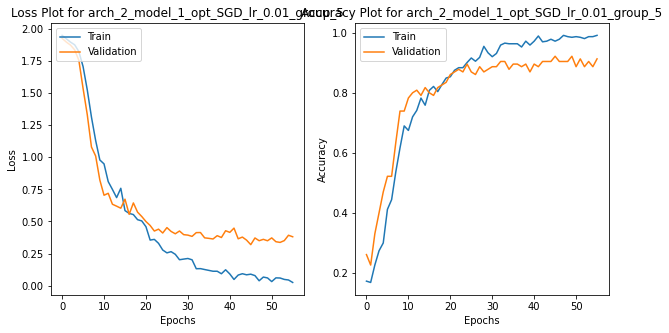

14/14 [==============================] - 1s 40ms/step - loss: 0.3440 - accuracy: 0.9013
arch_2_model_1_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 66ms/step - loss: 1.9014 - accuracy: 0.2330 - val_loss: 1.6936 - val_accuracy: 0.4783
Epoch 2/250
15/15 [==============================] - 1s 62ms/step - loss: 1.6182 - accuracy: 0.4325 - val_loss: 1.1258 - val_accuracy: 0.6609
Epoch 3/250
15/15 [==============================] - 1s 55ms/step - loss: 1.1148 - accuracy: 0.6437 - val_loss: 0.8674 - val_accuracy: 0.7478
Epoch 4/250
15/15 [==============================] - 1s 55ms/step - loss: 0.8860 - accuracy: 0.7251 - val_loss: 0.7421 - val_accuracy: 0.8000
Epoch 5/250
15/15 [==============================] - 1s 57ms/step - loss: 0.7807 - accuracy: 0.7559 - val_loss: 0.6754 - val_accuracy: 0.8261
Epoch 6/250
15/15 [==============================] - 1s 56ms/step - loss: 0.5526 - accuracy: 0.8354 - val_loss: 0.6010 - val_accuracy: 0.8435
Epoch 7/250
15/15 [

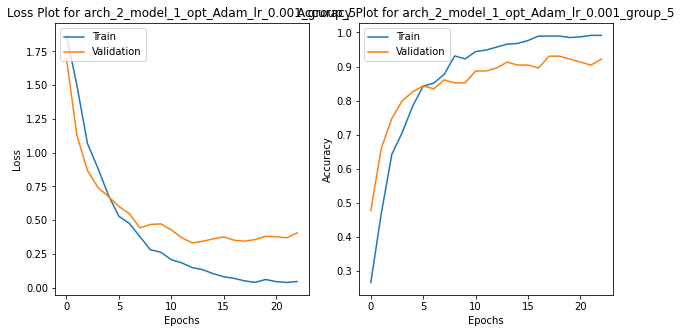

14/14 [==============================] - 1s 40ms/step - loss: 0.3435 - accuracy: 0.8879
arch_2_model_1_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 2s 73ms/step - loss: 2.1484 - accuracy: 0.1814 - val_loss: 1.9173 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9270 - accuracy: 0.1691 - val_loss: 1.9078 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9103 - accuracy: 0.1765 - val_loss: 1.9072 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9065 - accuracy: 0.1733 - val_loss: 1.9069 - val_accuracy: 0.1739
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9025 - accuracy: 0.1507 - val_loss: 1.9068 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9246 - accuracy: 0.1488 - val_loss: 1.9060 - val_accuracy: 0.1739
Epoch 7/250
15/15 [=

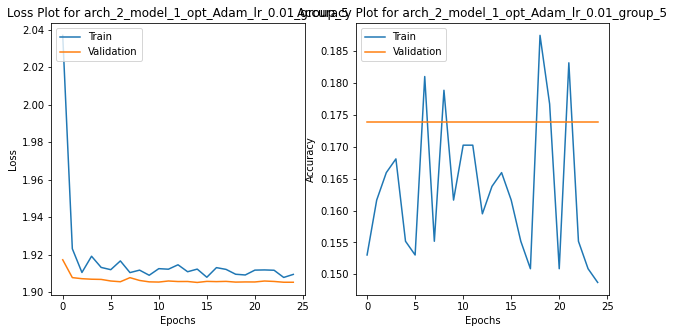

14/14 [==============================] - 1s 38ms/step - loss: 1.8050 - accuracy: 0.2242
arch_2_model_2_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 71ms/step - loss: 1.9415 - accuracy: 0.1822 - val_loss: 1.9464 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9497 - accuracy: 0.1629 - val_loss: 1.9337 - val_accuracy: 0.1652
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 1.9282 - accuracy: 0.1687 - val_loss: 1.9249 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9251 - accuracy: 0.1962 - val_loss: 1.9179 - val_accuracy: 0.1826
Epoch 5/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9157 - accuracy: 0.2118 - val_loss: 1.9113 - val_accuracy: 0.2000
Epoch 6/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9099 - accuracy: 0.1774 - val_loss: 1.9055 - val_accuracy: 0.2261
Epoch 7/250
15/15 [=

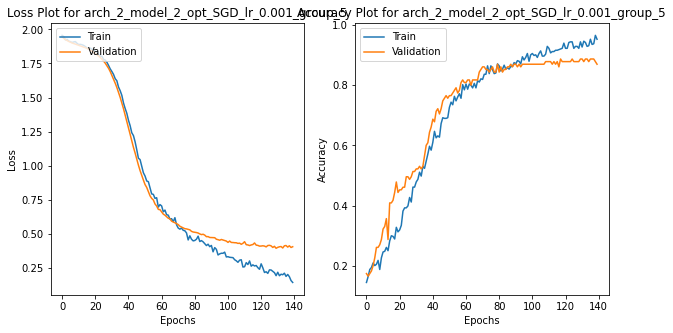

14/14 [==============================] - 1s 38ms/step - loss: 0.5352 - accuracy: 0.8341
arch_2_model_2_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 60ms/step - loss: 1.9426 - accuracy: 0.1796 - val_loss: 1.8905 - val_accuracy: 0.2348
Epoch 2/250
15/15 [==============================] - 1s 52ms/step - loss: 1.9066 - accuracy: 0.2006 - val_loss: 1.8583 - val_accuracy: 0.3478
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.8450 - accuracy: 0.2743 - val_loss: 1.7769 - val_accuracy: 0.3913
Epoch 4/250
15/15 [==============================] - 1s 53ms/step - loss: 1.7526 - accuracy: 0.4381 - val_loss: 1.5988 - val_accuracy: 0.5478
Epoch 5/250
15/15 [==============================] - 1s 50ms/step - loss: 1.5121 - accuracy: 0.5836 - val_loss: 1.2185 - val_accuracy: 0.7391
Epoch 6/250
15/15 [==============================] - 1s 48ms/step - loss: 1.1427 - accuracy: 0.6329 - val_loss: 0.8754 - val_accuracy: 0.7478
Epoch 7/250
15/15 [==

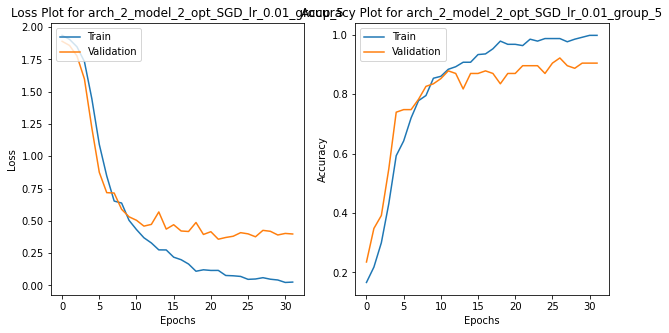

14/14 [==============================] - 1s 41ms/step - loss: 0.4173 - accuracy: 0.8901
arch_2_model_2_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 62ms/step - loss: 1.8978 - accuracy: 0.2202 - val_loss: 1.5244 - val_accuracy: 0.5652
Epoch 2/250
15/15 [==============================] - 1s 50ms/step - loss: 1.3331 - accuracy: 0.5710 - val_loss: 1.0170 - val_accuracy: 0.5913
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 0.8052 - accuracy: 0.7097 - val_loss: 0.7715 - val_accuracy: 0.6783
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 0.5552 - accuracy: 0.7996 - val_loss: 0.4914 - val_accuracy: 0.8435
Epoch 5/250
15/15 [==============================] - 1s 54ms/step - loss: 0.3523 - accuracy: 0.8807 - val_loss: 0.4695 - val_accuracy: 0.8696
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 0.2430 - accuracy: 0.9382 - val_loss: 0.4348 - val_accuracy: 0.8609
Epoch 7/250
15/15 [

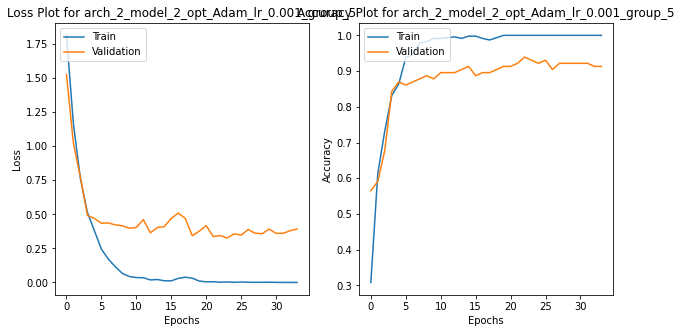

14/14 [==============================] - 1s 42ms/step - loss: 0.5101 - accuracy: 0.8901
arch_2_model_2_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 61ms/step - loss: 2.6193 - accuracy: 0.1683 - val_loss: 1.7463 - val_accuracy: 0.3391
Epoch 2/250
15/15 [==============================] - 1s 47ms/step - loss: 1.5765 - accuracy: 0.4250 - val_loss: 0.9255 - val_accuracy: 0.6696
Epoch 3/250
15/15 [==============================] - 1s 48ms/step - loss: 0.9697 - accuracy: 0.6860 - val_loss: 0.6760 - val_accuracy: 0.8087
Epoch 4/250
15/15 [==============================] - 1s 54ms/step - loss: 0.4900 - accuracy: 0.8661 - val_loss: 0.5121 - val_accuracy: 0.8174
Epoch 5/250
15/15 [==============================] - 1s 57ms/step - loss: 0.2673 - accuracy: 0.9062 - val_loss: 0.3408 - val_accuracy: 0.8783
Epoch 6/250
15/15 [==============================] - 1s 56ms/step - loss: 0.2664 - accuracy: 0.9109 - val_loss: 0.3402 - val_accuracy: 0.9304
Epoch 7/250
15/15 [=

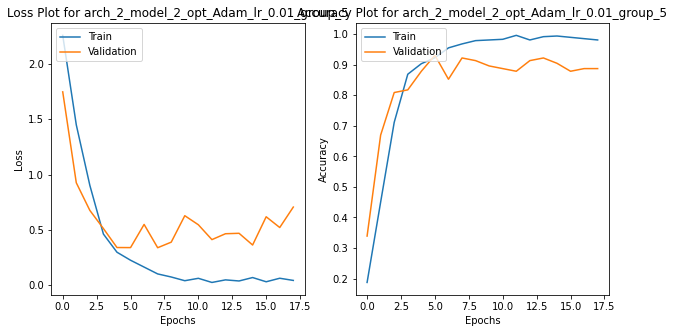

14/14 [==============================] - 1s 38ms/step - loss: 0.4472 - accuracy: 0.8857
arch_3_model_1_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 67ms/step - loss: 1.9395 - accuracy: 0.1880 - val_loss: 1.9396 - val_accuracy: 0.1043
Epoch 2/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9449 - accuracy: 0.1411 - val_loss: 1.9379 - val_accuracy: 0.0696
Epoch 3/250
15/15 [==============================] - 1s 57ms/step - loss: 1.9387 - accuracy: 0.1488 - val_loss: 1.9357 - val_accuracy: 0.0783
Epoch 4/250
15/15 [==============================] - 1s 57ms/step - loss: 1.9337 - accuracy: 0.1874 - val_loss: 1.9336 - val_accuracy: 0.0870
Epoch 5/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9439 - accuracy: 0.1313 - val_loss: 1.9319 - val_accuracy: 0.1130
Epoch 6/250
15/15 [==============================] - 1s 55ms/step - loss: 1.9270 - accuracy: 0.2009 - val_loss: 1.9298 - val_accuracy: 0.1130
Epoch 7/250
15/15 [=

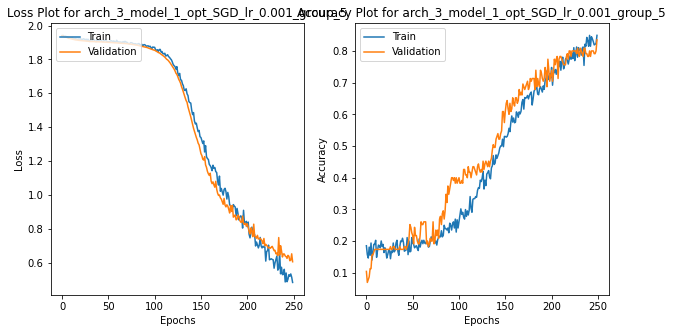

14/14 [==============================] - 1s 36ms/step - loss: 0.5068 - accuracy: 0.8229
arch_3_model_1_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 62ms/step - loss: 1.9501 - accuracy: 0.1190 - val_loss: 1.9362 - val_accuracy: 0.1652
Epoch 2/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9349 - accuracy: 0.1533 - val_loss: 1.9228 - val_accuracy: 0.2087
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9165 - accuracy: 0.1433 - val_loss: 1.9114 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9124 - accuracy: 0.1989 - val_loss: 1.9069 - val_accuracy: 0.2783
Epoch 5/250
15/15 [==============================] - 1s 55ms/step - loss: 1.9188 - accuracy: 0.1860 - val_loss: 1.9031 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9168 - accuracy: 0.1520 - val_loss: 1.8990 - val_accuracy: 0.3391
Epoch 7/250
15/15 [==

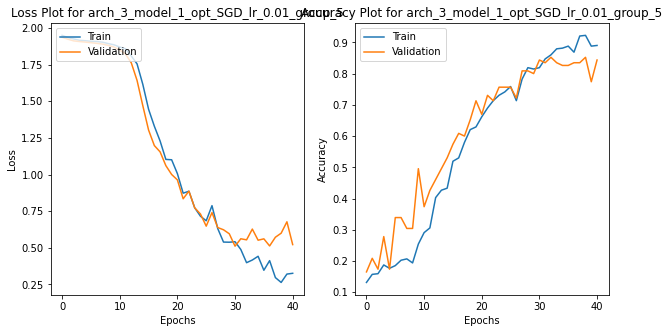

14/14 [==============================] - 1s 44ms/step - loss: 0.3998 - accuracy: 0.8834
arch_3_model_1_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 2s 79ms/step - loss: 1.9329 - accuracy: 0.1833 - val_loss: 1.8966 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9056 - accuracy: 0.1930 - val_loss: 1.8364 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 52ms/step - loss: 1.8382 - accuracy: 0.2502 - val_loss: 1.6439 - val_accuracy: 0.4696
Epoch 4/250
15/15 [==============================] - 1s 49ms/step - loss: 1.5978 - accuracy: 0.4608 - val_loss: 1.2658 - val_accuracy: 0.6174
Epoch 5/250
15/15 [==============================] - 1s 52ms/step - loss: 1.2990 - accuracy: 0.5494 - val_loss: 1.1048 - val_accuracy: 0.6087
Epoch 6/250
15/15 [==============================] - 1s 52ms/step - loss: 1.0508 - accuracy: 0.6175 - val_loss: 0.9776 - val_accuracy: 0.6348
Epoch 7/250
15/15 [

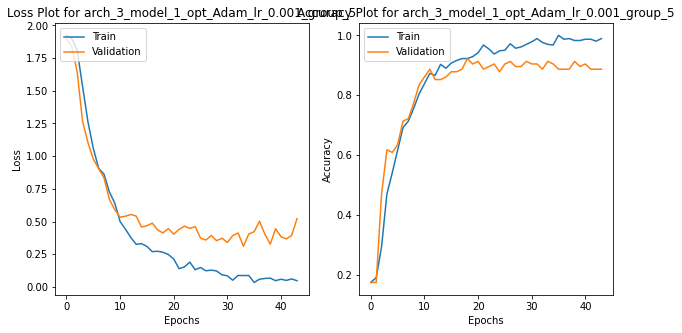

14/14 [==============================] - 1s 36ms/step - loss: 0.4108 - accuracy: 0.8901
arch_3_model_1_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 2s 69ms/step - loss: 1.9731 - accuracy: 0.1667 - val_loss: 1.9107 - val_accuracy: 0.1826
Epoch 2/250
15/15 [==============================] - 1s 60ms/step - loss: 1.9279 - accuracy: 0.1518 - val_loss: 1.8915 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 55ms/step - loss: 1.8772 - accuracy: 0.2170 - val_loss: 1.8004 - val_accuracy: 0.2696
Epoch 4/250
15/15 [==============================] - 1s 52ms/step - loss: 1.7666 - accuracy: 0.2760 - val_loss: 1.5860 - val_accuracy: 0.3913
Epoch 5/250
15/15 [==============================] - 1s 52ms/step - loss: 1.6096 - accuracy: 0.3109 - val_loss: 1.5578 - val_accuracy: 0.4087
Epoch 6/250
15/15 [==============================] - 1s 48ms/step - loss: 1.5129 - accuracy: 0.4699 - val_loss: 1.5047 - val_accuracy: 0.4087
Epoch 7/250
15/15 [=

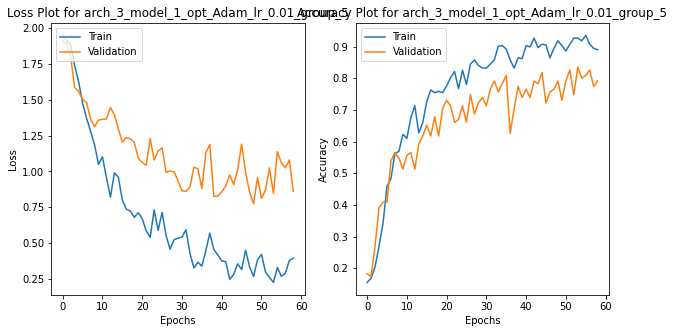

14/14 [==============================] - 1s 36ms/step - loss: 0.9659 - accuracy: 0.7399
arch_3_model_2_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 63ms/step - loss: 1.9510 - accuracy: 0.1129 - val_loss: 1.9475 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9460 - accuracy: 0.1554 - val_loss: 1.9448 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9460 - accuracy: 0.1382 - val_loss: 1.9422 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9379 - accuracy: 0.1791 - val_loss: 1.9399 - val_accuracy: 0.1739
Epoch 5/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9371 - accuracy: 0.1859 - val_loss: 1.9377 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9385 - accuracy: 0.1679 - val_loss: 1.9359 - val_accuracy: 0.1739
Epoch 7/250
15/15 [=

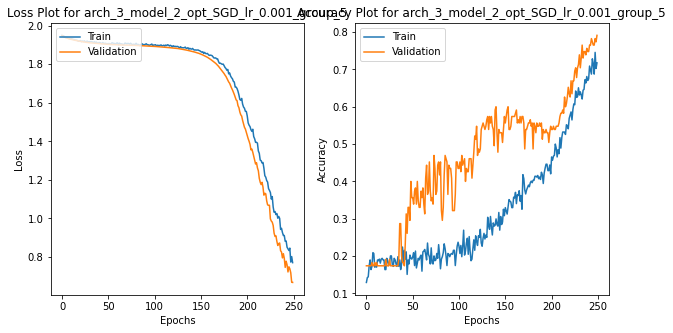

14/14 [==============================] - 1s 39ms/step - loss: 0.6610 - accuracy: 0.8341
arch_3_model_2_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 2s 64ms/step - loss: 1.9410 - accuracy: 0.1831 - val_loss: 1.9251 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 55ms/step - loss: 1.9231 - accuracy: 0.1731 - val_loss: 1.9113 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 58ms/step - loss: 1.9214 - accuracy: 0.1545 - val_loss: 1.9051 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 51ms/step - loss: 1.9226 - accuracy: 0.1536 - val_loss: 1.9047 - val_accuracy: 0.1739
Epoch 5/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9232 - accuracy: 0.2151 - val_loss: 1.9029 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9329 - accuracy: 0.1699 - val_loss: 1.9025 - val_accuracy: 0.1913
Epoch 7/250
15/15 [==

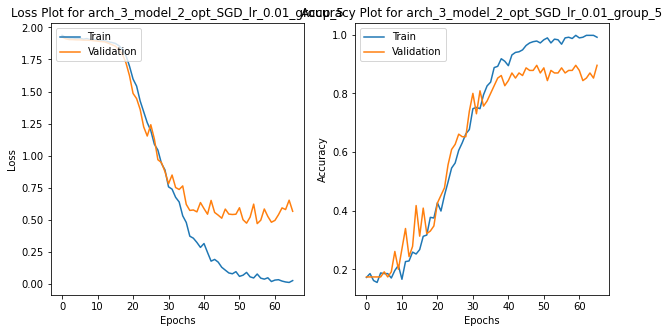

14/14 [==============================] - 1s 40ms/step - loss: 0.4511 - accuracy: 0.8924
arch_3_model_2_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 2s 61ms/step - loss: 1.9403 - accuracy: 0.1636 - val_loss: 1.9086 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9139 - accuracy: 0.1714 - val_loss: 1.9037 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 45ms/step - loss: 1.9204 - accuracy: 0.1401 - val_loss: 1.8925 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 56ms/step - loss: 1.8868 - accuracy: 0.1948 - val_loss: 1.8453 - val_accuracy: 0.3391
Epoch 5/250
15/15 [==============================] - 1s 57ms/step - loss: 1.7993 - accuracy: 0.3137 - val_loss: 1.5350 - val_accuracy: 0.5043
Epoch 6/250
15/15 [==============================] - 1s 51ms/step - loss: 1.4992 - accuracy: 0.4298 - val_loss: 1.2190 - val_accuracy: 0.5391
Epoch 7/250
15/15 [

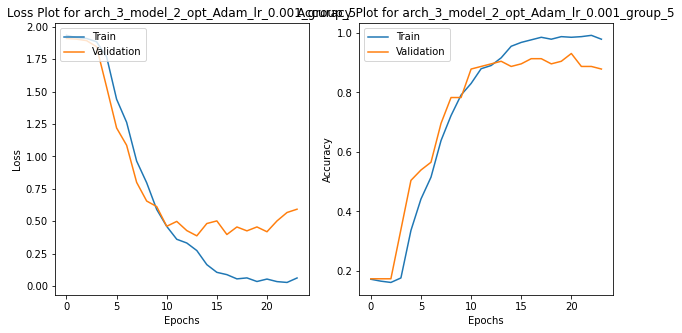

14/14 [==============================] - 1s 34ms/step - loss: 0.3351 - accuracy: 0.8969
arch_3_model_2_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 62ms/step - loss: 1.9523 - accuracy: 0.1645 - val_loss: 1.9066 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9079 - accuracy: 0.1709 - val_loss: 1.9118 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9186 - accuracy: 0.1597 - val_loss: 1.9054 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 1.8967 - accuracy: 0.2039 - val_loss: 1.9065 - val_accuracy: 0.1739
Epoch 5/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9071 - accuracy: 0.1999 - val_loss: 1.9070 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9168 - accuracy: 0.1575 - val_loss: 1.9058 - val_accuracy: 0.1739
Epoch 7/250
15/15 [=

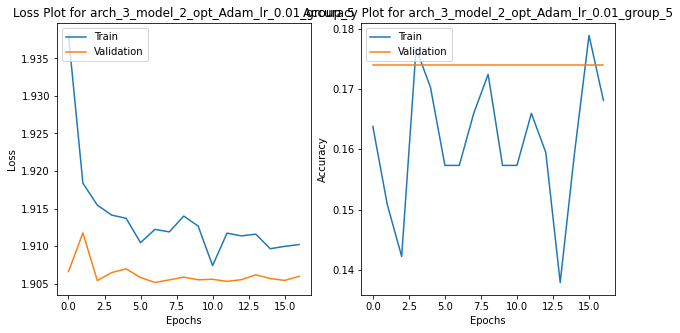

14/14 [==============================] - 0s 33ms/step - loss: 1.8070 - accuracy: 0.2242
arch_3_model_3_group_5_opt_SGD_lr_0.001
Epoch 1/250
15/15 [==============================] - 1s 64ms/step - loss: 1.9533 - accuracy: 0.1362 - val_loss: 1.9316 - val_accuracy: 0.1826
Epoch 2/250
15/15 [==============================] - 1s 54ms/step - loss: 1.9353 - accuracy: 0.1800 - val_loss: 1.9203 - val_accuracy: 0.2348
Epoch 3/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9286 - accuracy: 0.1700 - val_loss: 1.9143 - val_accuracy: 0.2435
Epoch 4/250
15/15 [==============================] - 1s 58ms/step - loss: 1.9272 - accuracy: 0.1739 - val_loss: 1.9099 - val_accuracy: 0.1826
Epoch 5/250
15/15 [==============================] - 1s 49ms/step - loss: 1.9218 - accuracy: 0.2137 - val_loss: 1.9060 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 52ms/step - loss: 1.9136 - accuracy: 0.2120 - val_loss: 1.9024 - val_accuracy: 0.1739
Epoch 7/250
15/15 [=

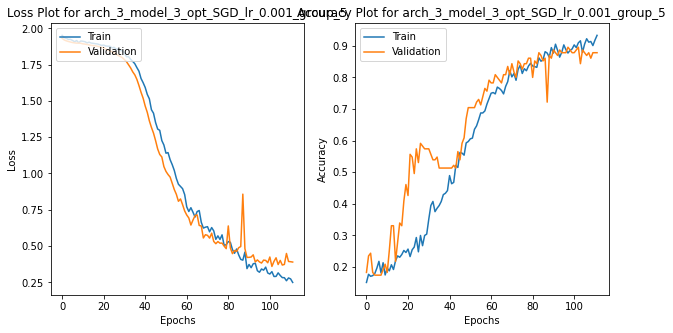

14/14 [==============================] - 1s 38ms/step - loss: 0.4671 - accuracy: 0.8543
arch_3_model_3_group_5_opt_SGD_lr_0.01
Epoch 1/250
15/15 [==============================] - 1s 60ms/step - loss: 1.9213 - accuracy: 0.1616 - val_loss: 1.9084 - val_accuracy: 0.1913
Epoch 2/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9053 - accuracy: 0.2381 - val_loss: 1.8871 - val_accuracy: 0.3304
Epoch 3/250
15/15 [==============================] - 1s 51ms/step - loss: 1.8918 - accuracy: 0.2554 - val_loss: 1.8604 - val_accuracy: 0.4087
Epoch 4/250
15/15 [==============================] - 1s 57ms/step - loss: 1.8658 - accuracy: 0.2768 - val_loss: 1.7982 - val_accuracy: 0.4609
Epoch 5/250
15/15 [==============================] - 1s 57ms/step - loss: 1.8003 - accuracy: 0.3495 - val_loss: 1.6255 - val_accuracy: 0.5217
Epoch 6/250
15/15 [==============================] - 1s 52ms/step - loss: 1.6239 - accuracy: 0.4251 - val_loss: 1.3875 - val_accuracy: 0.3217
Epoch 7/250
15/15 [==

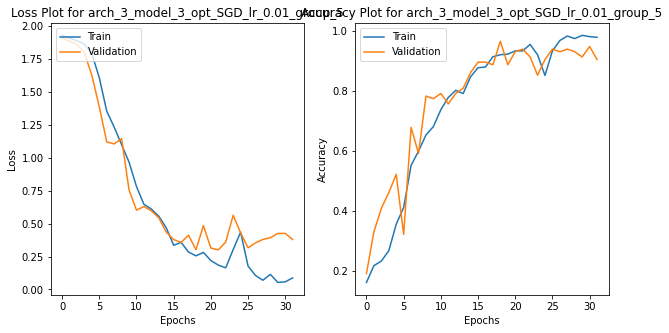

14/14 [==============================] - 1s 40ms/step - loss: 0.3897 - accuracy: 0.8879
arch_3_model_3_group_5_opt_Adam_lr_0.001
Epoch 1/250
15/15 [==============================] - 2s 67ms/step - loss: 1.9592 - accuracy: 0.1784 - val_loss: 1.9129 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 47ms/step - loss: 1.9275 - accuracy: 0.1629 - val_loss: 1.9093 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 53ms/step - loss: 1.9188 - accuracy: 0.1644 - val_loss: 1.8960 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 55ms/step - loss: 1.8975 - accuracy: 0.1946 - val_loss: 1.8567 - val_accuracy: 0.3391
Epoch 5/250
15/15 [==============================] - 1s 57ms/step - loss: 1.8037 - accuracy: 0.3574 - val_loss: 1.4913 - val_accuracy: 0.4783
Epoch 6/250
15/15 [==============================] - 1s 54ms/step - loss: 1.4101 - accuracy: 0.4847 - val_loss: 0.7758 - val_accuracy: 0.7130
Epoch 7/250
15/15 [

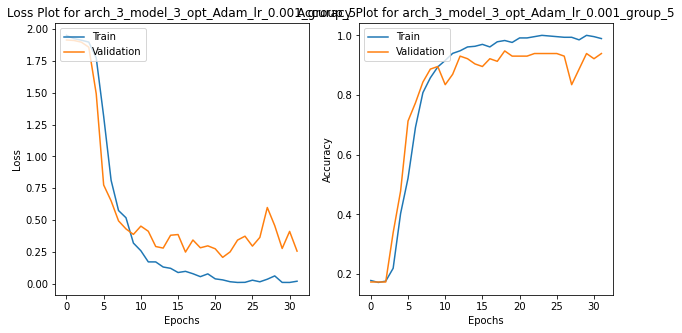

14/14 [==============================] - 1s 39ms/step - loss: 0.3889 - accuracy: 0.8991
arch_3_model_3_group_5_opt_Adam_lr_0.01
Epoch 1/250
15/15 [==============================] - 2s 68ms/step - loss: 7.6860 - accuracy: 0.1673 - val_loss: 1.9078 - val_accuracy: 0.1739
Epoch 2/250
15/15 [==============================] - 1s 55ms/step - loss: 1.9095 - accuracy: 0.1898 - val_loss: 1.9119 - val_accuracy: 0.1739
Epoch 3/250
15/15 [==============================] - 1s 55ms/step - loss: 1.9366 - accuracy: 0.1765 - val_loss: 1.9110 - val_accuracy: 0.1739
Epoch 4/250
15/15 [==============================] - 1s 50ms/step - loss: 1.9110 - accuracy: 0.1696 - val_loss: 1.9075 - val_accuracy: 0.1739
Epoch 5/250
15/15 [==============================] - 1s 48ms/step - loss: 1.9016 - accuracy: 0.1514 - val_loss: 1.9078 - val_accuracy: 0.1739
Epoch 6/250
15/15 [==============================] - 1s 46ms/step - loss: 1.9135 - accuracy: 0.1402 - val_loss: 1.9073 - val_accuracy: 0.1739
Epoch 7/250
15/15 [=

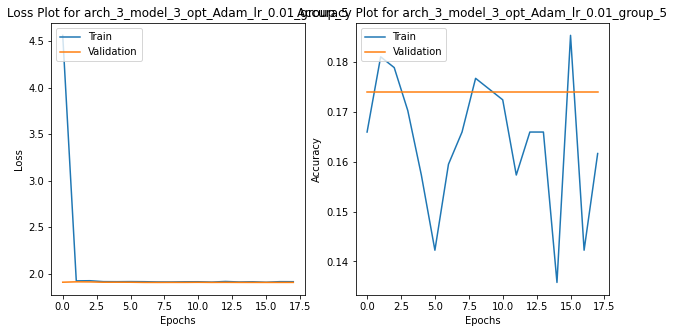

14/14 [==============================] - 0s 32ms/step - loss: 1.8064 - accuracy: 0.2242
Found 1247 images belonging to 15 classes.
Found 308 images belonging to 15 classes.
Found 919 images belonging to 15 classes.
arch_1_model_1_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 421s 11s/step - loss: 2.7471 - accuracy: 0.0784 - val_loss: 2.6873 - val_accuracy: 0.0812
Epoch 2/250
39/39 [==============================] - 2s 48ms/step - loss: 2.7041 - accuracy: 0.0911 - val_loss: 2.6785 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6815 - accuracy: 0.1202 - val_loss: 2.6592 - val_accuracy: 0.1331
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6720 - accuracy: 0.1243 - val_loss: 2.6408 - val_accuracy: 0.1494
Epoch 5/250
39/39 [==============================] - 2s 53ms/step - loss: 2.6465 - accuracy: 0.1180 - val_loss: 2.6190 - val_accuracy: 0.1136
Epoch 6/250
39/39 [===============

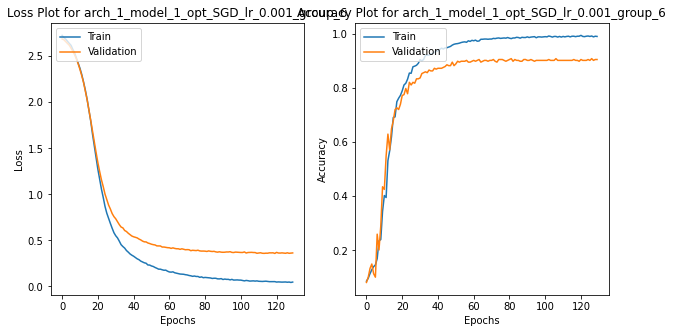

29/29 [==============================] - 252s 9s/step - loss: 0.3367 - accuracy: 0.9097
arch_1_model_1_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 51ms/step - loss: 2.7386 - accuracy: 0.0940 - val_loss: 2.5776 - val_accuracy: 0.1688
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 2.4852 - accuracy: 0.2649 - val_loss: 2.0705 - val_accuracy: 0.5942
Epoch 3/250
39/39 [==============================] - 2s 46ms/step - loss: 1.6927 - accuracy: 0.7037 - val_loss: 1.0131 - val_accuracy: 0.7857
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.7252 - accuracy: 0.8487 - val_loss: 0.6427 - val_accuracy: 0.8214
Epoch 5/250
39/39 [==============================] - 2s 50ms/step - loss: 0.3734 - accuracy: 0.9231 - val_loss: 0.5081 - val_accuracy: 0.8831
Epoch 6/250
39/39 [==============================] - 2s 49ms/step - loss: 0.2356 - accuracy: 0.9510 - val_loss: 0.4520 - val_accuracy: 0.8864
Epoch 7/250
39/39 [==

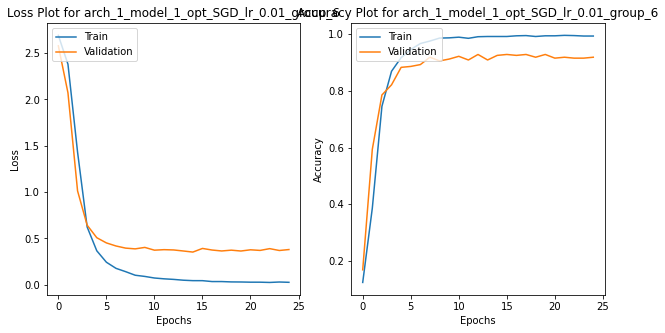

29/29 [==============================] - 1s 38ms/step - loss: 0.3710 - accuracy: 0.8977
arch_1_model_1_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6203 - accuracy: 0.1818 - val_loss: 1.5800 - val_accuracy: 0.6558
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 1.1932 - accuracy: 0.7938 - val_loss: 0.8202 - val_accuracy: 0.8312
Epoch 3/250
39/39 [==============================] - 2s 49ms/step - loss: 0.5570 - accuracy: 0.8840 - val_loss: 0.5978 - val_accuracy: 0.8766
Epoch 4/250
39/39 [==============================] - 2s 50ms/step - loss: 0.3242 - accuracy: 0.9433 - val_loss: 0.5075 - val_accuracy: 0.8799
Epoch 5/250
39/39 [==============================] - 2s 54ms/step - loss: 0.2517 - accuracy: 0.9515 - val_loss: 0.4601 - val_accuracy: 0.8929
Epoch 6/250
39/39 [==============================] - 2s 51ms/step - loss: 0.1876 - accuracy: 0.9714 - val_loss: 0.4431 - val_accuracy: 0.8994
Epoch 7/250
39/39 [

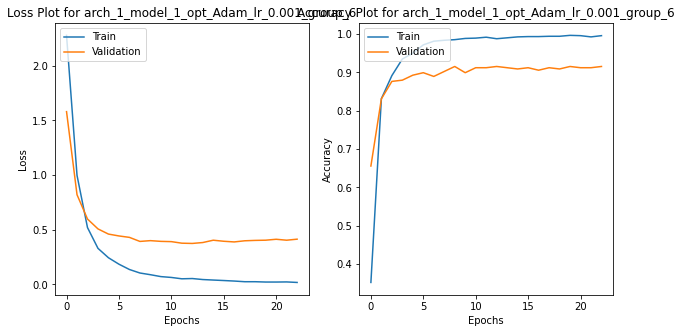

29/29 [==============================] - 1s 36ms/step - loss: 0.3603 - accuracy: 0.9108
arch_1_model_1_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 55ms/step - loss: 4.6581 - accuracy: 0.3544 - val_loss: 0.6847 - val_accuracy: 0.8117
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 0.2710 - accuracy: 0.9250 - val_loss: 0.4631 - val_accuracy: 0.8896
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 0.1081 - accuracy: 0.9760 - val_loss: 0.4362 - val_accuracy: 0.8961
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.0577 - accuracy: 0.9877 - val_loss: 0.4667 - val_accuracy: 0.9091
Epoch 5/250
39/39 [==============================] - 2s 52ms/step - loss: 0.0453 - accuracy: 0.9885 - val_loss: 0.4928 - val_accuracy: 0.9026
Epoch 6/250
39/39 [==============================] - 2s 53ms/step - loss: 0.0541 - accuracy: 0.9858 - val_loss: 0.5330 - val_accuracy: 0.8896
Epoch 7/250
39/39 [=

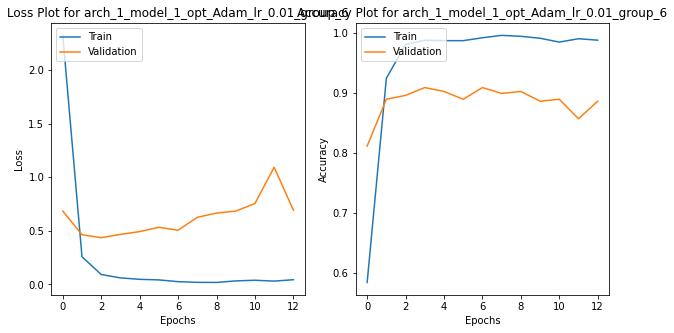

29/29 [==============================] - 1s 34ms/step - loss: 0.3909 - accuracy: 0.8934
arch_1_model_2_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 2s 50ms/step - loss: 2.7116 - accuracy: 0.0727 - val_loss: 2.6809 - val_accuracy: 0.1039
Epoch 2/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6822 - accuracy: 0.1070 - val_loss: 2.6660 - val_accuracy: 0.1071
Epoch 3/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6671 - accuracy: 0.1090 - val_loss: 2.6484 - val_accuracy: 0.0974
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6478 - accuracy: 0.1136 - val_loss: 2.6259 - val_accuracy: 0.0974
Epoch 5/250
39/39 [==============================] - 2s 51ms/step - loss: 2.6023 - accuracy: 0.1487 - val_loss: 2.5976 - val_accuracy: 0.1136
Epoch 6/250
39/39 [==============================] - 2s 53ms/step - loss: 2.5781 - accuracy: 0.1856 - val_loss: 2.5687 - val_accuracy: 0.2273
Epoch 7/250
39/39 [=

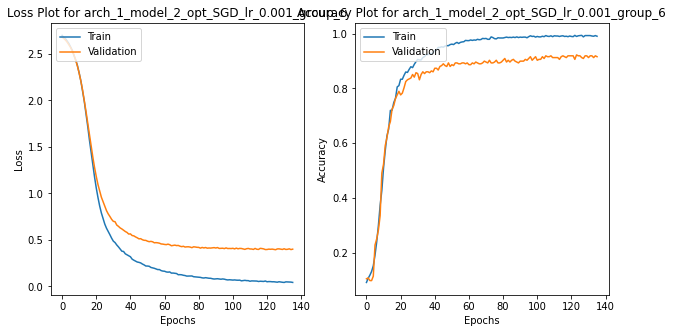

29/29 [==============================] - 1s 34ms/step - loss: 0.3584 - accuracy: 0.8923
arch_1_model_2_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 52ms/step - loss: 2.6950 - accuracy: 0.0955 - val_loss: 2.5338 - val_accuracy: 0.2045
Epoch 2/250
39/39 [==============================] - 2s 47ms/step - loss: 2.4003 - accuracy: 0.3197 - val_loss: 1.9445 - val_accuracy: 0.5130
Epoch 3/250
39/39 [==============================] - 2s 45ms/step - loss: 1.5856 - accuracy: 0.6737 - val_loss: 1.0247 - val_accuracy: 0.7857
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.7139 - accuracy: 0.8432 - val_loss: 0.6568 - val_accuracy: 0.8474
Epoch 5/250
39/39 [==============================] - 2s 52ms/step - loss: 0.4254 - accuracy: 0.9091 - val_loss: 0.5654 - val_accuracy: 0.8734
Epoch 6/250
39/39 [==============================] - 2s 49ms/step - loss: 0.2999 - accuracy: 0.9242 - val_loss: 0.4871 - val_accuracy: 0.8831
Epoch 7/250
39/39 [==

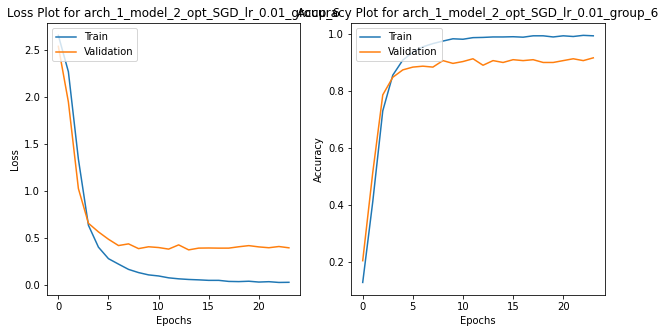

29/29 [==============================] - 1s 39ms/step - loss: 0.3316 - accuracy: 0.9010
arch_1_model_2_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 2s 50ms/step - loss: 2.8727 - accuracy: 0.1015 - val_loss: 2.4628 - val_accuracy: 0.1558
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 2.2862 - accuracy: 0.2853 - val_loss: 2.0142 - val_accuracy: 0.5422
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 1.7734 - accuracy: 0.6141 - val_loss: 1.5481 - val_accuracy: 0.5844
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 1.2145 - accuracy: 0.7585 - val_loss: 1.1598 - val_accuracy: 0.7338
Epoch 5/250
39/39 [==============================] - 2s 52ms/step - loss: 0.8492 - accuracy: 0.8237 - val_loss: 0.9715 - val_accuracy: 0.7630
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 0.6745 - accuracy: 0.8365 - val_loss: 0.8840 - val_accuracy: 0.7630
Epoch 7/250
39/39 [

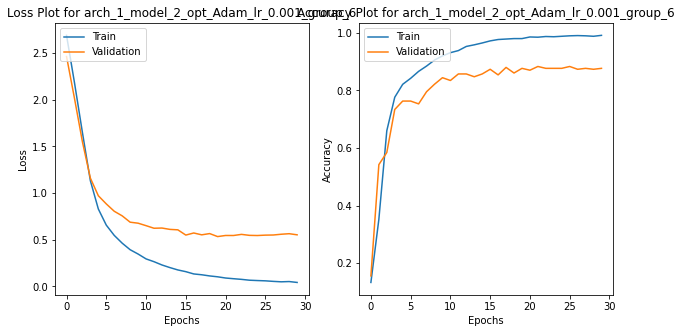

29/29 [==============================] - 1s 39ms/step - loss: 0.5542 - accuracy: 0.8487
arch_1_model_2_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 57ms/step - loss: 4.3137 - accuracy: 0.2773 - val_loss: 0.7802 - val_accuracy: 0.8019
Epoch 2/250
39/39 [==============================] - 2s 53ms/step - loss: 0.3423 - accuracy: 0.9034 - val_loss: 0.4483 - val_accuracy: 0.8701
Epoch 3/250
39/39 [==============================] - 2s 51ms/step - loss: 0.0935 - accuracy: 0.9709 - val_loss: 0.4024 - val_accuracy: 0.8831
Epoch 4/250
39/39 [==============================] - 2s 56ms/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.5230 - val_accuracy: 0.8669
Epoch 5/250
39/39 [==============================] - 2s 52ms/step - loss: 0.0570 - accuracy: 0.9811 - val_loss: 0.5071 - val_accuracy: 0.8799
Epoch 6/250
39/39 [==============================] - 2s 52ms/step - loss: 0.0335 - accuracy: 0.9875 - val_loss: 0.5982 - val_accuracy: 0.8961
Epoch 7/250
39/39 [=

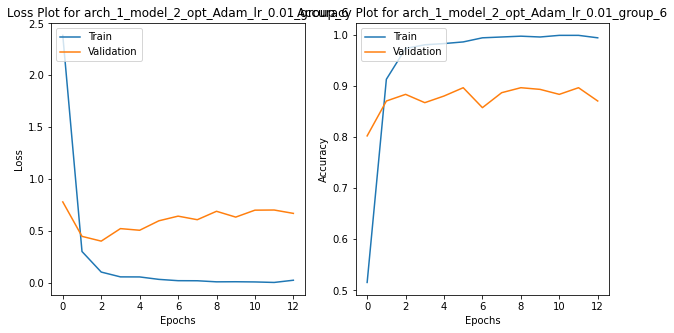

29/29 [==============================] - 1s 40ms/step - loss: 0.4328 - accuracy: 0.8694
arch_1_model_3_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 55ms/step - loss: 2.7648 - accuracy: 0.0847 - val_loss: 2.6873 - val_accuracy: 0.1039
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 2.7036 - accuracy: 0.1039 - val_loss: 2.6761 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6761 - accuracy: 0.1272 - val_loss: 2.6695 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 45ms/step - loss: 2.6845 - accuracy: 0.1096 - val_loss: 2.6646 - val_accuracy: 0.1071
Epoch 5/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6717 - accuracy: 0.0846 - val_loss: 2.6599 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6612 - accuracy: 0.1125 - val_loss: 2.6540 - val_accuracy: 0.1006
Epoch 7/250
39/39 [=

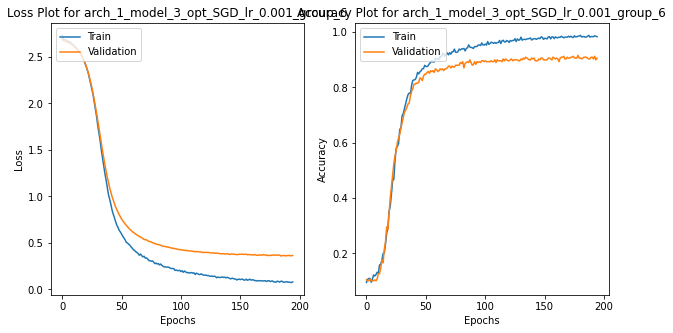

29/29 [==============================] - 1s 35ms/step - loss: 0.3271 - accuracy: 0.8945
arch_1_model_3_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 53ms/step - loss: 2.7080 - accuracy: 0.0714 - val_loss: 2.5995 - val_accuracy: 0.2045
Epoch 2/250
39/39 [==============================] - 2s 48ms/step - loss: 2.5590 - accuracy: 0.2184 - val_loss: 2.3598 - val_accuracy: 0.4481
Epoch 3/250
39/39 [==============================] - 2s 47ms/step - loss: 2.2428 - accuracy: 0.4678 - val_loss: 1.7897 - val_accuracy: 0.6526
Epoch 4/250
39/39 [==============================] - 2s 43ms/step - loss: 1.5256 - accuracy: 0.7224 - val_loss: 1.0869 - val_accuracy: 0.7727
Epoch 5/250
39/39 [==============================] - 2s 47ms/step - loss: 0.8636 - accuracy: 0.8249 - val_loss: 0.7270 - val_accuracy: 0.8279
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 0.5295 - accuracy: 0.8890 - val_loss: 0.6104 - val_accuracy: 0.8571
Epoch 7/250
39/39 [==

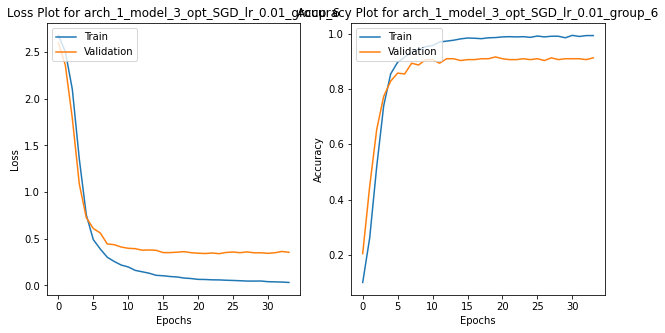

29/29 [==============================] - 1s 37ms/step - loss: 0.3398 - accuracy: 0.8988
arch_1_model_3_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 2s 53ms/step - loss: 2.7547 - accuracy: 0.1047 - val_loss: 2.4404 - val_accuracy: 0.3182
Epoch 2/250
39/39 [==============================] - 2s 46ms/step - loss: 2.2983 - accuracy: 0.4426 - val_loss: 1.8672 - val_accuracy: 0.6461
Epoch 3/250
39/39 [==============================] - 2s 45ms/step - loss: 1.6049 - accuracy: 0.7577 - val_loss: 1.2590 - val_accuracy: 0.8019
Epoch 4/250
39/39 [==============================] - 2s 53ms/step - loss: 0.9969 - accuracy: 0.8427 - val_loss: 0.8219 - val_accuracy: 0.8377
Epoch 5/250
39/39 [==============================] - 2s 55ms/step - loss: 0.5928 - accuracy: 0.9076 - val_loss: 0.6250 - val_accuracy: 0.8604
Epoch 6/250
39/39 [==============================] - 2s 51ms/step - loss: 0.4044 - accuracy: 0.9260 - val_loss: 0.5530 - val_accuracy: 0.8766
Epoch 7/250
39/39 [

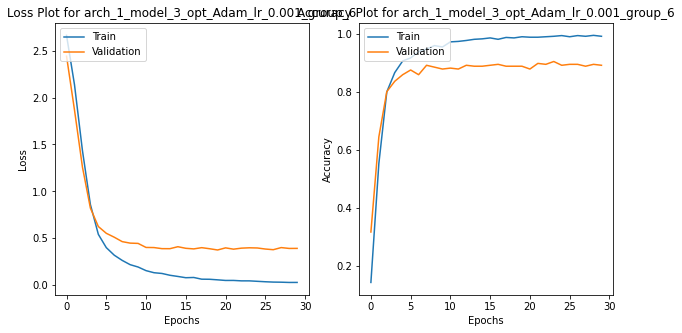

29/29 [==============================] - 1s 40ms/step - loss: 0.3432 - accuracy: 0.9032
arch_1_model_3_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 57ms/step - loss: 2.7353 - accuracy: 0.2911 - val_loss: 0.7539 - val_accuracy: 0.7857
Epoch 2/250
39/39 [==============================] - 2s 52ms/step - loss: 0.4268 - accuracy: 0.8753 - val_loss: 0.5991 - val_accuracy: 0.8279
Epoch 3/250
39/39 [==============================] - 2s 53ms/step - loss: 0.2020 - accuracy: 0.9466 - val_loss: 0.5032 - val_accuracy: 0.8442
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 0.1156 - accuracy: 0.9707 - val_loss: 0.5165 - val_accuracy: 0.8766
Epoch 5/250
39/39 [==============================] - 2s 46ms/step - loss: 0.0716 - accuracy: 0.9883 - val_loss: 0.6473 - val_accuracy: 0.8571
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 0.0581 - accuracy: 0.9828 - val_loss: 0.5594 - val_accuracy: 0.8864
Epoch 7/250
39/39 [=

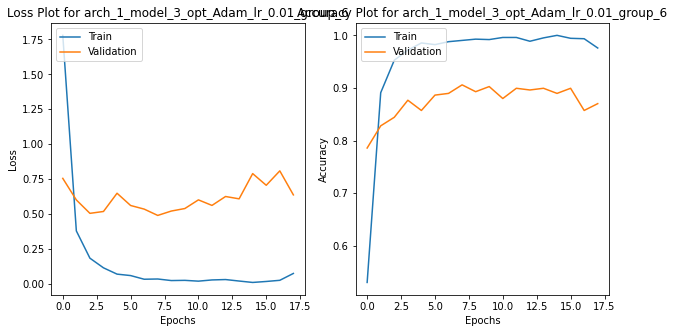

29/29 [==============================] - 1s 36ms/step - loss: 0.4845 - accuracy: 0.8890
arch_1_model_4_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 55ms/step - loss: 2.7468 - accuracy: 0.0535 - val_loss: 2.6748 - val_accuracy: 0.1039
Epoch 2/250
39/39 [==============================] - 2s 45ms/step - loss: 2.6710 - accuracy: 0.0930 - val_loss: 2.6446 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6328 - accuracy: 0.1464 - val_loss: 2.6173 - val_accuracy: 0.1299
Epoch 4/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6121 - accuracy: 0.1791 - val_loss: 2.5850 - val_accuracy: 0.2208
Epoch 5/250
39/39 [==============================] - 2s 46ms/step - loss: 2.5747 - accuracy: 0.2125 - val_loss: 2.5445 - val_accuracy: 0.2370
Epoch 6/250
39/39 [==============================] - 2s 44ms/step - loss: 2.5237 - accuracy: 0.2575 - val_loss: 2.4895 - val_accuracy: 0.2922
Epoch 7/250
39/39 [=

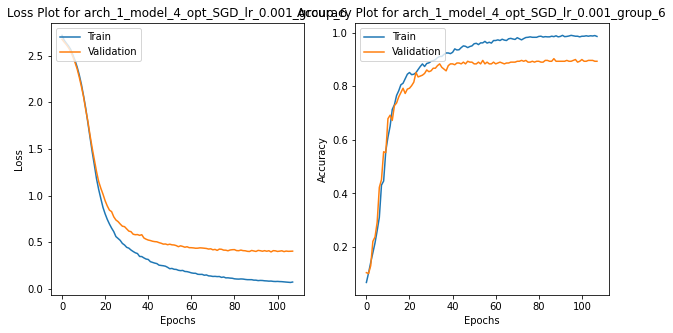

29/29 [==============================] - 1s 36ms/step - loss: 0.3599 - accuracy: 0.8923
arch_1_model_4_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 51ms/step - loss: 2.6861 - accuracy: 0.1201 - val_loss: 2.4769 - val_accuracy: 0.3766
Epoch 2/250
39/39 [==============================] - 2s 48ms/step - loss: 2.3075 - accuracy: 0.4024 - val_loss: 1.6670 - val_accuracy: 0.6883
Epoch 3/250
39/39 [==============================] - 2s 46ms/step - loss: 1.2863 - accuracy: 0.7677 - val_loss: 0.8894 - val_accuracy: 0.8149
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 0.5751 - accuracy: 0.8654 - val_loss: 0.6009 - val_accuracy: 0.8766
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 0.3793 - accuracy: 0.9108 - val_loss: 0.5104 - val_accuracy: 0.8896
Epoch 6/250
39/39 [==============================] - 2s 49ms/step - loss: 0.2759 - accuracy: 0.9386 - val_loss: 0.5167 - val_accuracy: 0.8701
Epoch 7/250
39/39 [==

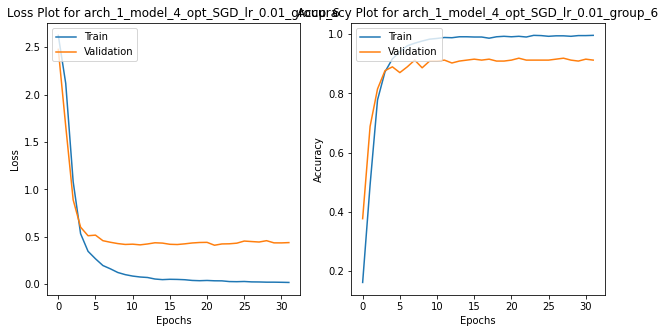

29/29 [==============================] - 1s 40ms/step - loss: 0.3566 - accuracy: 0.9086
arch_1_model_4_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 2s 54ms/step - loss: 2.4589 - accuracy: 0.2721 - val_loss: 1.2801 - val_accuracy: 0.7597
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 0.8818 - accuracy: 0.8578 - val_loss: 0.6557 - val_accuracy: 0.8539
Epoch 3/250
39/39 [==============================] - 2s 53ms/step - loss: 0.4179 - accuracy: 0.8919 - val_loss: 0.5356 - val_accuracy: 0.8831
Epoch 4/250
39/39 [==============================] - 2s 46ms/step - loss: 0.2626 - accuracy: 0.9468 - val_loss: 0.4712 - val_accuracy: 0.8831
Epoch 5/250
39/39 [==============================] - 2s 47ms/step - loss: 0.1488 - accuracy: 0.9750 - val_loss: 0.4397 - val_accuracy: 0.8864
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 0.1441 - accuracy: 0.9780 - val_loss: 0.4323 - val_accuracy: 0.8864
Epoch 7/250
39/39 [

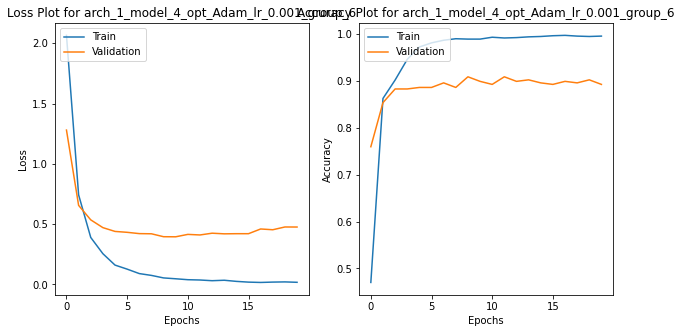

29/29 [==============================] - 1s 36ms/step - loss: 0.3255 - accuracy: 0.9086
arch_1_model_4_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 54ms/step - loss: 4.1848 - accuracy: 0.2495 - val_loss: 0.9399 - val_accuracy: 0.7500
Epoch 2/250
39/39 [==============================] - 2s 46ms/step - loss: 0.6594 - accuracy: 0.8217 - val_loss: 0.5961 - val_accuracy: 0.8506
Epoch 3/250
39/39 [==============================] - 2s 51ms/step - loss: 0.3154 - accuracy: 0.9178 - val_loss: 0.5452 - val_accuracy: 0.8571
Epoch 4/250
39/39 [==============================] - 2s 45ms/step - loss: 0.2552 - accuracy: 0.9228 - val_loss: 0.5686 - val_accuracy: 0.8474
Epoch 5/250
39/39 [==============================] - 2s 54ms/step - loss: 0.2074 - accuracy: 0.9455 - val_loss: 0.6107 - val_accuracy: 0.8799
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 0.1022 - accuracy: 0.9624 - val_loss: 0.6112 - val_accuracy: 0.8701
Epoch 7/250
39/39 [=

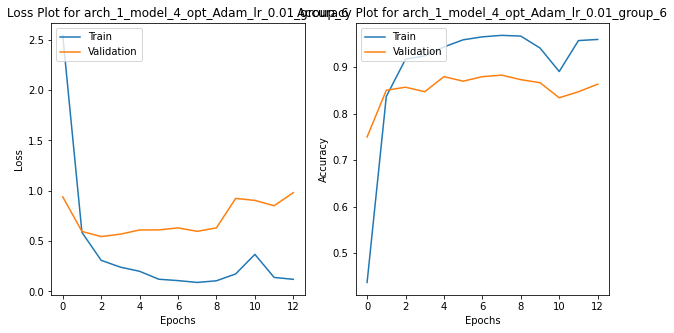

29/29 [==============================] - 1s 34ms/step - loss: 0.5366 - accuracy: 0.8422
arch_1_model_5_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 2s 53ms/step - loss: 2.7144 - accuracy: 0.0829 - val_loss: 2.6702 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6673 - accuracy: 0.1118 - val_loss: 2.6451 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6405 - accuracy: 0.1406 - val_loss: 2.6091 - val_accuracy: 0.1201
Epoch 4/250
39/39 [==============================] - 2s 46ms/step - loss: 2.5972 - accuracy: 0.1516 - val_loss: 2.5684 - val_accuracy: 0.1721
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 2.5467 - accuracy: 0.2115 - val_loss: 2.5175 - val_accuracy: 0.2565
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 2.5065 - accuracy: 0.2821 - val_loss: 2.4580 - val_accuracy: 0.3312
Epoch 7/250
39/39 [=

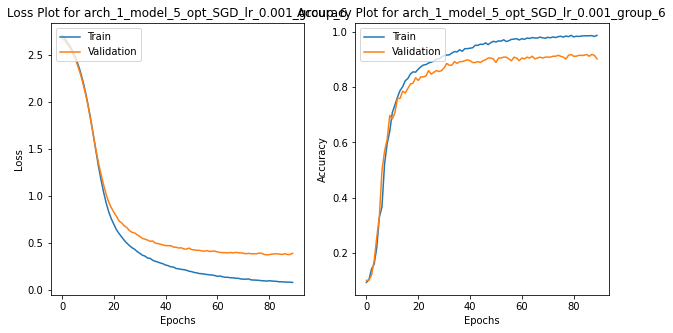

29/29 [==============================] - 1s 34ms/step - loss: 0.3506 - accuracy: 0.8955
arch_1_model_5_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 51ms/step - loss: 2.6991 - accuracy: 0.1036 - val_loss: 2.5288 - val_accuracy: 0.3831
Epoch 2/250
39/39 [==============================] - 2s 46ms/step - loss: 2.3762 - accuracy: 0.3999 - val_loss: 1.7930 - val_accuracy: 0.6851
Epoch 3/250
39/39 [==============================] - 2s 50ms/step - loss: 1.3691 - accuracy: 0.7346 - val_loss: 0.9279 - val_accuracy: 0.7695
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.6649 - accuracy: 0.8368 - val_loss: 0.6246 - val_accuracy: 0.8571
Epoch 5/250
39/39 [==============================] - 2s 47ms/step - loss: 0.3867 - accuracy: 0.9053 - val_loss: 0.5348 - val_accuracy: 0.8864
Epoch 6/250
39/39 [==============================] - 2s 49ms/step - loss: 0.2664 - accuracy: 0.9357 - val_loss: 0.4986 - val_accuracy: 0.8766
Epoch 7/250
39/39 [==

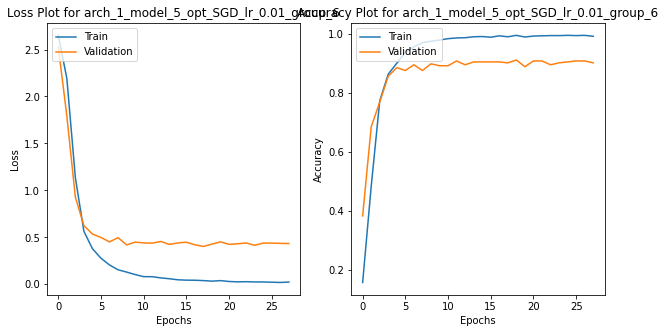

29/29 [==============================] - 1s 35ms/step - loss: 0.3696 - accuracy: 0.8901
arch_1_model_5_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 55ms/step - loss: 2.7127 - accuracy: 0.2401 - val_loss: 1.5881 - val_accuracy: 0.6786
Epoch 2/250
39/39 [==============================] - 2s 47ms/step - loss: 1.1591 - accuracy: 0.7915 - val_loss: 0.8454 - val_accuracy: 0.7987
Epoch 3/250
39/39 [==============================] - 2s 50ms/step - loss: 0.5673 - accuracy: 0.8605 - val_loss: 0.6691 - val_accuracy: 0.8312
Epoch 4/250
39/39 [==============================] - 2s 45ms/step - loss: 0.3817 - accuracy: 0.9133 - val_loss: 0.6076 - val_accuracy: 0.8344
Epoch 5/250
39/39 [==============================] - 2s 50ms/step - loss: 0.2760 - accuracy: 0.9353 - val_loss: 0.5233 - val_accuracy: 0.8604
Epoch 6/250
39/39 [==============================] - 2s 52ms/step - loss: 0.2097 - accuracy: 0.9496 - val_loss: 0.4888 - val_accuracy: 0.8734
Epoch 7/250
39/39 [

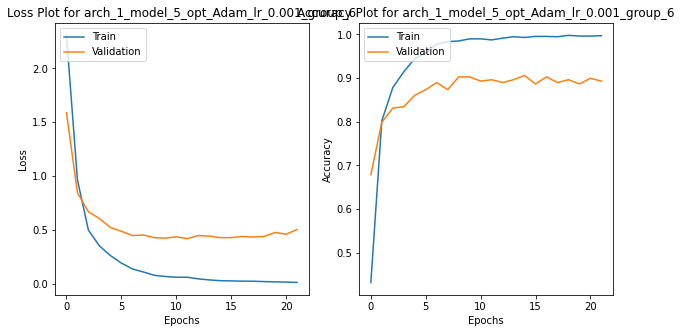

29/29 [==============================] - 1s 42ms/step - loss: 0.3665 - accuracy: 0.8955
arch_1_model_5_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 50ms/step - loss: 5.6019 - accuracy: 0.1494 - val_loss: 1.6737 - val_accuracy: 0.5909
Epoch 2/250
39/39 [==============================] - 2s 45ms/step - loss: 1.5493 - accuracy: 0.6180 - val_loss: 0.8101 - val_accuracy: 0.7727
Epoch 3/250
39/39 [==============================] - 2s 56ms/step - loss: 0.4778 - accuracy: 0.8500 - val_loss: 0.6376 - val_accuracy: 0.8409
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.3139 - accuracy: 0.8992 - val_loss: 0.5795 - val_accuracy: 0.8409
Epoch 5/250
39/39 [==============================] - 2s 45ms/step - loss: 0.2961 - accuracy: 0.9262 - val_loss: 0.5847 - val_accuracy: 0.8604
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 0.1727 - accuracy: 0.9492 - val_loss: 0.6089 - val_accuracy: 0.8604
Epoch 7/250
39/39 [=

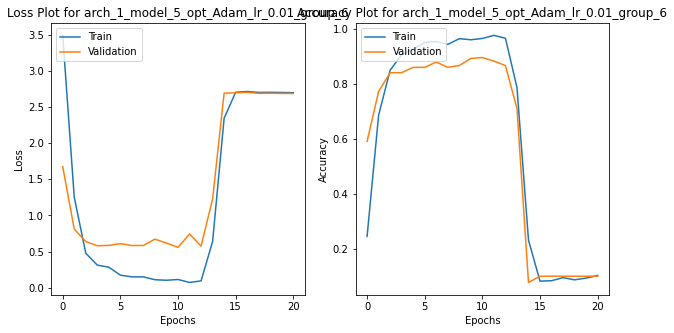

29/29 [==============================] - 1s 34ms/step - loss: 0.5252 - accuracy: 0.8672
arch_1_model_6_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 60ms/step - loss: 2.7101 - accuracy: 0.0935 - val_loss: 2.6694 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6693 - accuracy: 0.1053 - val_loss: 2.6465 - val_accuracy: 0.1039
Epoch 3/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6439 - accuracy: 0.1176 - val_loss: 2.6190 - val_accuracy: 0.1039
Epoch 4/250
39/39 [==============================] - 2s 54ms/step - loss: 2.6080 - accuracy: 0.1458 - val_loss: 2.5795 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 50ms/step - loss: 2.5571 - accuracy: 0.1342 - val_loss: 2.5390 - val_accuracy: 0.2143
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 2.5131 - accuracy: 0.2437 - val_loss: 2.4888 - val_accuracy: 0.2013
Epoch 7/250
39/39 [=

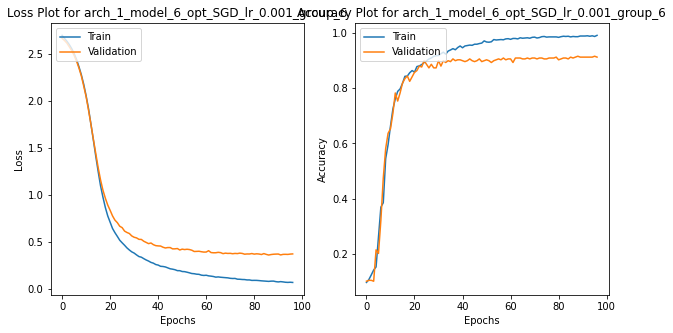

29/29 [==============================] - 1s 34ms/step - loss: 0.3227 - accuracy: 0.9010
arch_1_model_6_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 2s 52ms/step - loss: 2.6875 - accuracy: 0.1417 - val_loss: 2.5240 - val_accuracy: 0.1429
Epoch 2/250
39/39 [==============================] - 2s 52ms/step - loss: 2.3586 - accuracy: 0.3286 - val_loss: 1.7502 - val_accuracy: 0.6688
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 1.3304 - accuracy: 0.7307 - val_loss: 0.8929 - val_accuracy: 0.7857
Epoch 4/250
39/39 [==============================] - 2s 57ms/step - loss: 0.6218 - accuracy: 0.8515 - val_loss: 0.5919 - val_accuracy: 0.8636
Epoch 5/250
39/39 [==============================] - 2s 51ms/step - loss: 0.3746 - accuracy: 0.9106 - val_loss: 0.5489 - val_accuracy: 0.8734
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 0.2791 - accuracy: 0.9383 - val_loss: 0.4673 - val_accuracy: 0.8799
Epoch 7/250
39/39 [==

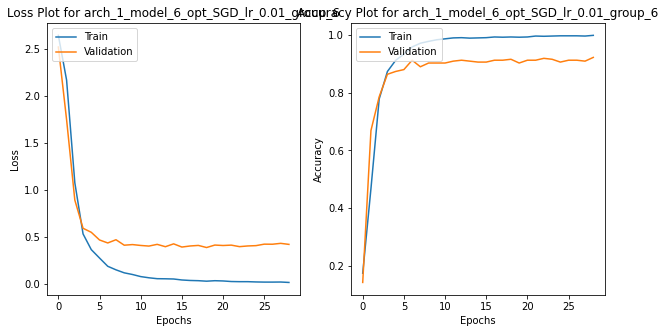

29/29 [==============================] - 1s 36ms/step - loss: 0.3594 - accuracy: 0.8923
arch_1_model_6_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 54ms/step - loss: 2.9920 - accuracy: 0.1975 - val_loss: 1.3328 - val_accuracy: 0.7240
Epoch 2/250
39/39 [==============================] - 2s 58ms/step - loss: 0.8555 - accuracy: 0.8367 - val_loss: 0.6652 - val_accuracy: 0.8474
Epoch 3/250
39/39 [==============================] - 2s 49ms/step - loss: 0.3987 - accuracy: 0.9020 - val_loss: 0.4917 - val_accuracy: 0.8734
Epoch 4/250
39/39 [==============================] - 2s 52ms/step - loss: 0.2169 - accuracy: 0.9492 - val_loss: 0.4737 - val_accuracy: 0.8734
Epoch 5/250
39/39 [==============================] - 2s 45ms/step - loss: 0.1415 - accuracy: 0.9793 - val_loss: 0.4829 - val_accuracy: 0.8701
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 0.1187 - accuracy: 0.9800 - val_loss: 0.4060 - val_accuracy: 0.9026
Epoch 7/250
39/39 [

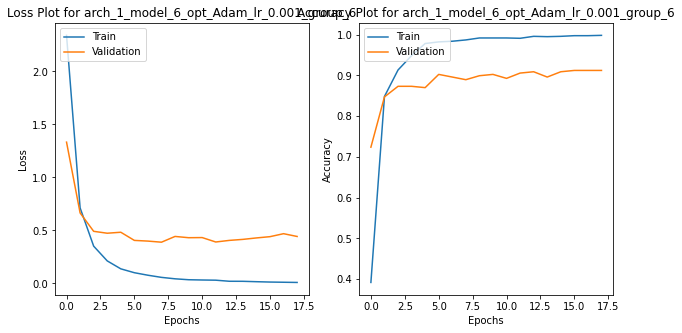

29/29 [==============================] - 1s 35ms/step - loss: 0.3302 - accuracy: 0.9021
arch_1_model_6_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 60ms/step - loss: 9.9653 - accuracy: 0.2112 - val_loss: 1.1101 - val_accuracy: 0.7435
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 0.8637 - accuracy: 0.7908 - val_loss: 0.7239 - val_accuracy: 0.7825
Epoch 3/250
39/39 [==============================] - 2s 51ms/step - loss: 0.4047 - accuracy: 0.8826 - val_loss: 0.6705 - val_accuracy: 0.8409
Epoch 4/250
39/39 [==============================] - 2s 51ms/step - loss: 0.3134 - accuracy: 0.9065 - val_loss: 0.6115 - val_accuracy: 0.8604
Epoch 5/250
39/39 [==============================] - 2s 55ms/step - loss: 0.1867 - accuracy: 0.9361 - val_loss: 0.5758 - val_accuracy: 0.8279
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 0.2023 - accuracy: 0.9411 - val_loss: 0.5374 - val_accuracy: 0.8701
Epoch 7/250
39/39 [=

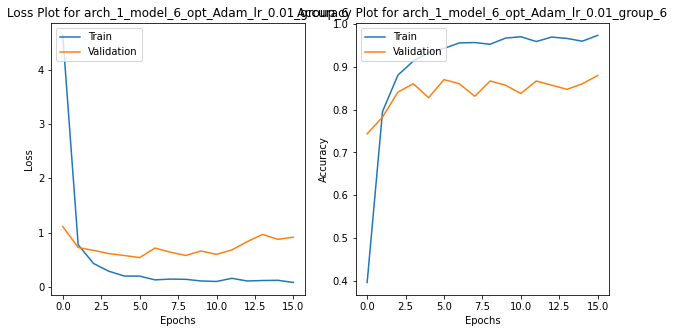

29/29 [==============================] - 1s 37ms/step - loss: 0.6819 - accuracy: 0.8357
arch_2_model_1_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 52ms/step - loss: 2.7552 - accuracy: 0.0589 - val_loss: 2.7016 - val_accuracy: 0.1071
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 2.7030 - accuracy: 0.0858 - val_loss: 2.6934 - val_accuracy: 0.1071
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6951 - accuracy: 0.0898 - val_loss: 2.6854 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6912 - accuracy: 0.0953 - val_loss: 2.6774 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 56ms/step - loss: 2.6801 - accuracy: 0.1166 - val_loss: 2.6675 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6768 - accuracy: 0.1012 - val_loss: 2.6600 - val_accuracy: 0.1006
Epoch 7/250
39/39 [=

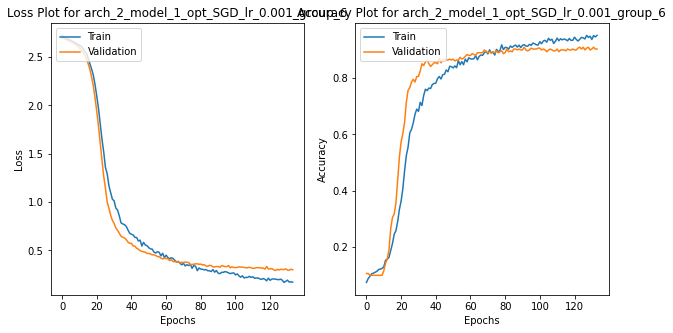

29/29 [==============================] - 1s 35ms/step - loss: 0.3082 - accuracy: 0.9206
arch_2_model_1_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 53ms/step - loss: 2.7152 - accuracy: 0.0511 - val_loss: 2.6769 - val_accuracy: 0.1169
Epoch 2/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6654 - accuracy: 0.1309 - val_loss: 2.5077 - val_accuracy: 0.1558
Epoch 3/250
39/39 [==============================] - 2s 49ms/step - loss: 2.4633 - accuracy: 0.1947 - val_loss: 1.9583 - val_accuracy: 0.5552
Epoch 4/250
39/39 [==============================] - 2s 46ms/step - loss: 1.7914 - accuracy: 0.4680 - val_loss: 1.0282 - val_accuracy: 0.7370
Epoch 5/250
39/39 [==============================] - 2s 47ms/step - loss: 1.1268 - accuracy: 0.6385 - val_loss: 0.9071 - val_accuracy: 0.7500
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 0.8563 - accuracy: 0.7589 - val_loss: 0.6509 - val_accuracy: 0.8149
Epoch 7/250
39/39 [==

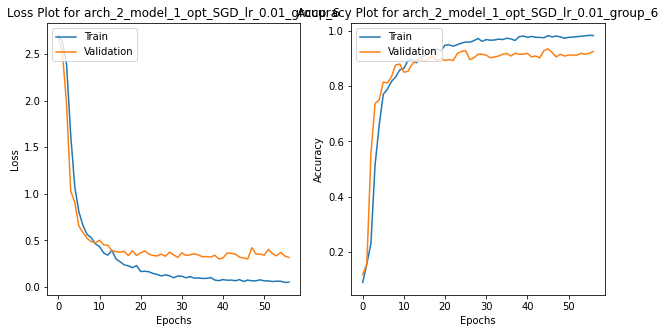

29/29 [==============================] - 1s 40ms/step - loss: 0.2802 - accuracy: 0.9478
arch_2_model_1_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 61ms/step - loss: 2.6446 - accuracy: 0.1169 - val_loss: 2.1434 - val_accuracy: 0.3864
Epoch 2/250
39/39 [==============================] - 2s 48ms/step - loss: 1.8491 - accuracy: 0.4581 - val_loss: 0.9202 - val_accuracy: 0.7565
Epoch 3/250
39/39 [==============================] - 2s 45ms/step - loss: 0.8438 - accuracy: 0.7471 - val_loss: 0.6104 - val_accuracy: 0.8636
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.6377 - accuracy: 0.8047 - val_loss: 0.5524 - val_accuracy: 0.8442
Epoch 5/250
39/39 [==============================] - 2s 48ms/step - loss: 0.4488 - accuracy: 0.8632 - val_loss: 0.4651 - val_accuracy: 0.8799
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 0.3680 - accuracy: 0.8901 - val_loss: 0.4055 - val_accuracy: 0.8831
Epoch 7/250
39/39 [

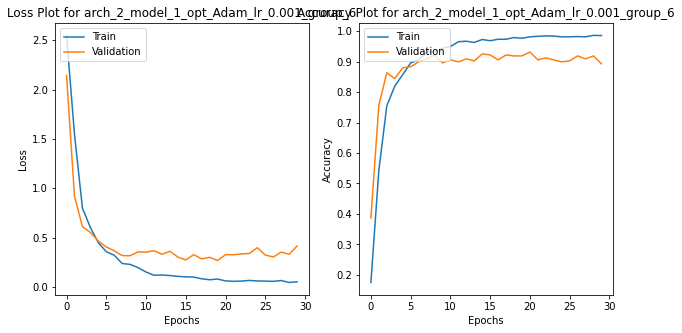

29/29 [==============================] - 1s 36ms/step - loss: 0.2225 - accuracy: 0.9358
arch_2_model_1_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 60ms/step - loss: 2.7799 - accuracy: 0.0804 - val_loss: 2.0747 - val_accuracy: 0.3084
Epoch 2/250
39/39 [==============================] - 2s 54ms/step - loss: 1.7788 - accuracy: 0.4355 - val_loss: 0.9695 - val_accuracy: 0.7500
Epoch 3/250
39/39 [==============================] - 2s 44ms/step - loss: 0.8383 - accuracy: 0.7351 - val_loss: 0.7005 - val_accuracy: 0.8052
Epoch 4/250
39/39 [==============================] - 2s 51ms/step - loss: 0.5969 - accuracy: 0.8140 - val_loss: 0.5706 - val_accuracy: 0.8279
Epoch 5/250
39/39 [==============================] - 2s 50ms/step - loss: 0.4512 - accuracy: 0.8642 - val_loss: 0.4783 - val_accuracy: 0.8701
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 0.4233 - accuracy: 0.8614 - val_loss: 0.4201 - val_accuracy: 0.8766
Epoch 7/250
39/39 [=

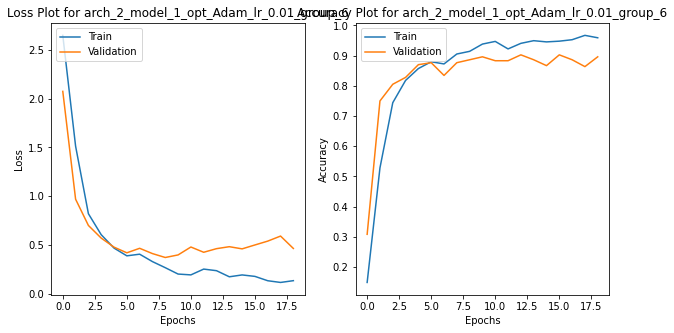

29/29 [==============================] - 1s 35ms/step - loss: 0.3485 - accuracy: 0.9021
arch_2_model_2_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 54ms/step - loss: 2.7266 - accuracy: 0.0682 - val_loss: 2.7017 - val_accuracy: 0.0812
Epoch 2/250
39/39 [==============================] - 2s 47ms/step - loss: 2.7052 - accuracy: 0.0603 - val_loss: 2.6902 - val_accuracy: 0.1104
Epoch 3/250
39/39 [==============================] - 2s 45ms/step - loss: 2.6937 - accuracy: 0.1044 - val_loss: 2.6800 - val_accuracy: 0.1786
Epoch 4/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6857 - accuracy: 0.1222 - val_loss: 2.6720 - val_accuracy: 0.1851
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6793 - accuracy: 0.1366 - val_loss: 2.6628 - val_accuracy: 0.1818
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6725 - accuracy: 0.1263 - val_loss: 2.6539 - val_accuracy: 0.2045
Epoch 7/250
39/39 [=

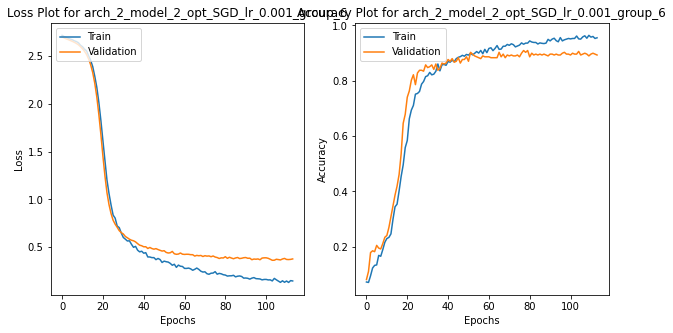

29/29 [==============================] - 1s 36ms/step - loss: 0.3356 - accuracy: 0.9075
arch_2_model_2_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 55ms/step - loss: 2.7000 - accuracy: 0.0988 - val_loss: 2.5555 - val_accuracy: 0.2338
Epoch 2/250
39/39 [==============================] - 2s 45ms/step - loss: 2.4662 - accuracy: 0.2708 - val_loss: 1.8362 - val_accuracy: 0.5714
Epoch 3/250
39/39 [==============================] - 2s 46ms/step - loss: 1.4455 - accuracy: 0.6068 - val_loss: 0.7137 - val_accuracy: 0.8409
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 0.7358 - accuracy: 0.7673 - val_loss: 0.6377 - val_accuracy: 0.7955
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 0.4755 - accuracy: 0.8571 - val_loss: 0.5788 - val_accuracy: 0.8377
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 0.4166 - accuracy: 0.8691 - val_loss: 0.5085 - val_accuracy: 0.8409
Epoch 7/250
39/39 [==

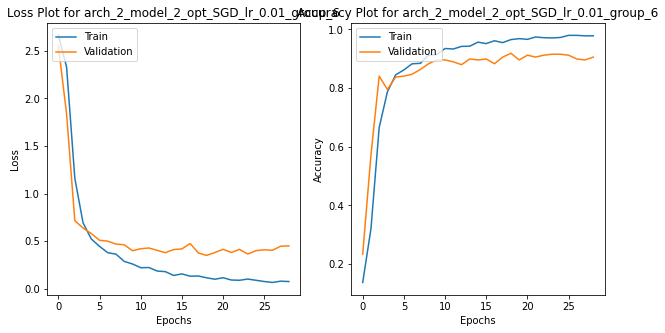

29/29 [==============================] - 1s 37ms/step - loss: 0.3843 - accuracy: 0.9129
arch_2_model_2_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 57ms/step - loss: 2.6254 - accuracy: 0.1410 - val_loss: 1.4927 - val_accuracy: 0.6688
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 1.0942 - accuracy: 0.7056 - val_loss: 0.7005 - val_accuracy: 0.8084
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 0.4955 - accuracy: 0.8378 - val_loss: 0.6081 - val_accuracy: 0.8377
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 0.4190 - accuracy: 0.8728 - val_loss: 0.4812 - val_accuracy: 0.8539
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 0.2719 - accuracy: 0.9133 - val_loss: 0.4195 - val_accuracy: 0.8799
Epoch 6/250
39/39 [==============================] - 2s 45ms/step - loss: 0.2551 - accuracy: 0.9142 - val_loss: 0.4083 - val_accuracy: 0.8701
Epoch 7/250
39/39 [

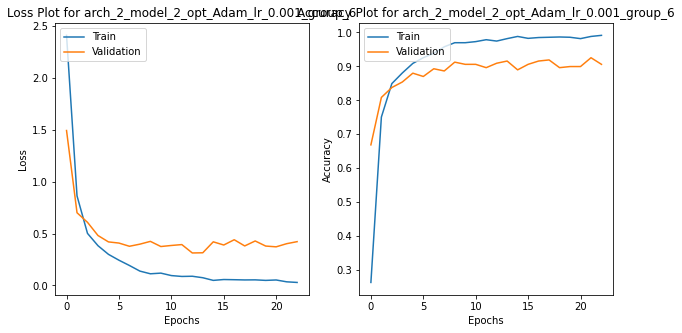

29/29 [==============================] - 1s 37ms/step - loss: 0.3139 - accuracy: 0.9173
arch_2_model_2_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 56ms/step - loss: 3.0488 - accuracy: 0.1961 - val_loss: 0.8328 - val_accuracy: 0.7305
Epoch 2/250
39/39 [==============================] - 2s 47ms/step - loss: 0.7127 - accuracy: 0.7810 - val_loss: 0.5936 - val_accuracy: 0.8247
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 0.4287 - accuracy: 0.8523 - val_loss: 0.5795 - val_accuracy: 0.8377
Epoch 4/250
39/39 [==============================] - 2s 49ms/step - loss: 0.3665 - accuracy: 0.8873 - val_loss: 0.4634 - val_accuracy: 0.8766
Epoch 5/250
39/39 [==============================] - 2s 48ms/step - loss: 0.3135 - accuracy: 0.9027 - val_loss: 0.5716 - val_accuracy: 0.8896
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 0.1923 - accuracy: 0.9396 - val_loss: 0.5638 - val_accuracy: 0.8896
Epoch 7/250
39/39 [=

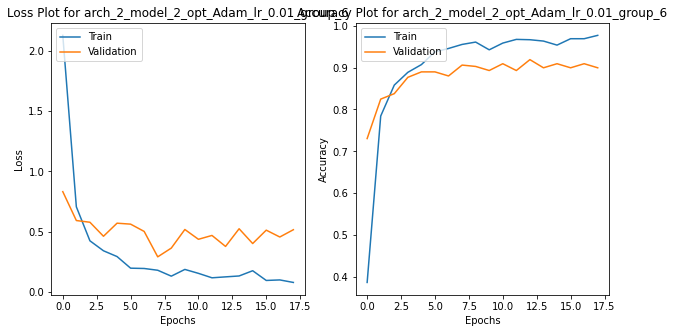

29/29 [==============================] - 1s 34ms/step - loss: 0.4065 - accuracy: 0.9151
arch_3_model_1_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 52ms/step - loss: 2.7144 - accuracy: 0.0816 - val_loss: 2.7022 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 2.7010 - accuracy: 0.0782 - val_loss: 2.6971 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 53ms/step - loss: 2.7001 - accuracy: 0.0842 - val_loss: 2.6945 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6916 - accuracy: 0.1035 - val_loss: 2.6915 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 46ms/step - loss: 2.7009 - accuracy: 0.0733 - val_loss: 2.6888 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6935 - accuracy: 0.0986 - val_loss: 2.6860 - val_accuracy: 0.1006
Epoch 7/250
39/39 [=

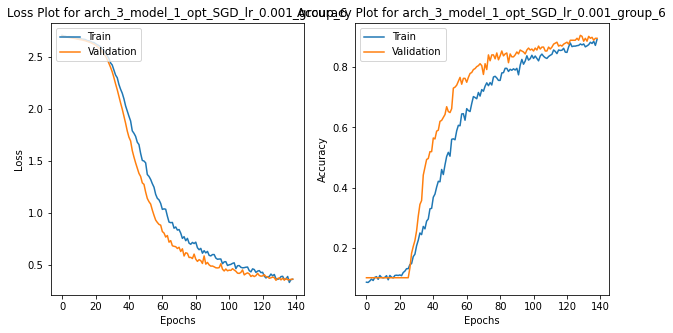

29/29 [==============================] - 1s 35ms/step - loss: 0.4007 - accuracy: 0.8607
arch_3_model_1_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 55ms/step - loss: 2.7140 - accuracy: 0.0766 - val_loss: 2.6918 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 53ms/step - loss: 2.6898 - accuracy: 0.0978 - val_loss: 2.6753 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6783 - accuracy: 0.0925 - val_loss: 2.6432 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6462 - accuracy: 0.1071 - val_loss: 2.5608 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 44ms/step - loss: 2.5486 - accuracy: 0.1489 - val_loss: 2.3327 - val_accuracy: 0.2338
Epoch 6/250
39/39 [==============================] - 2s 45ms/step - loss: 2.2968 - accuracy: 0.2564 - val_loss: 1.7834 - val_accuracy: 0.3831
Epoch 7/250
39/39 [==

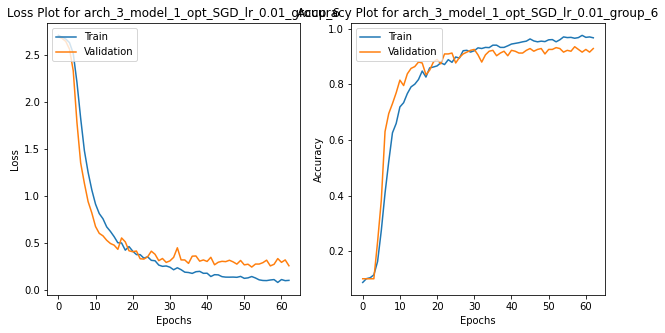

29/29 [==============================] - 1s 35ms/step - loss: 0.2655 - accuracy: 0.9347
arch_3_model_1_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 53ms/step - loss: 2.7070 - accuracy: 0.1001 - val_loss: 2.6646 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6381 - accuracy: 0.0911 - val_loss: 2.3726 - val_accuracy: 0.1753
Epoch 3/250
39/39 [==============================] - 2s 44ms/step - loss: 2.3087 - accuracy: 0.2273 - val_loss: 1.7203 - val_accuracy: 0.5227
Epoch 4/250
39/39 [==============================] - 2s 50ms/step - loss: 1.6745 - accuracy: 0.4465 - val_loss: 1.1842 - val_accuracy: 0.6526
Epoch 5/250
39/39 [==============================] - 2s 46ms/step - loss: 1.2292 - accuracy: 0.5938 - val_loss: 0.7887 - val_accuracy: 0.7760
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 0.9204 - accuracy: 0.6899 - val_loss: 0.7215 - val_accuracy: 0.7662
Epoch 7/250
39/39 [

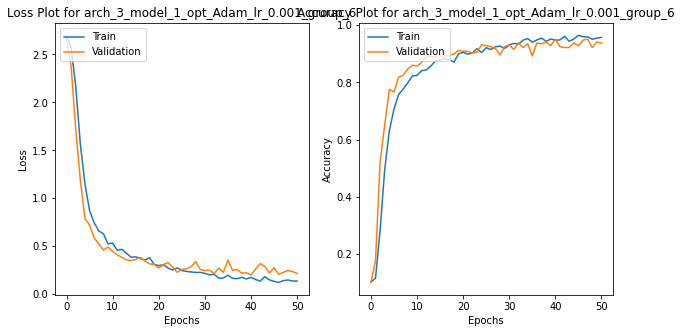

29/29 [==============================] - 1s 40ms/step - loss: 0.3357 - accuracy: 0.9195
arch_3_model_1_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 54ms/step - loss: 2.6234 - accuracy: 0.0929 - val_loss: 2.2201 - val_accuracy: 0.2078
Epoch 2/250
39/39 [==============================] - 2s 52ms/step - loss: 2.0894 - accuracy: 0.2401 - val_loss: 1.5741 - val_accuracy: 0.4123
Epoch 3/250
39/39 [==============================] - 2s 47ms/step - loss: 1.7179 - accuracy: 0.3911 - val_loss: 1.5381 - val_accuracy: 0.4968
Epoch 4/250
39/39 [==============================] - 2s 49ms/step - loss: 1.5510 - accuracy: 0.4694 - val_loss: 1.1084 - val_accuracy: 0.6201
Epoch 5/250
39/39 [==============================] - 2s 50ms/step - loss: 1.2965 - accuracy: 0.5519 - val_loss: 1.1811 - val_accuracy: 0.6039
Epoch 6/250
39/39 [==============================] - 2s 47ms/step - loss: 1.1360 - accuracy: 0.6256 - val_loss: 1.0407 - val_accuracy: 0.5909
Epoch 7/250
39/39 [=

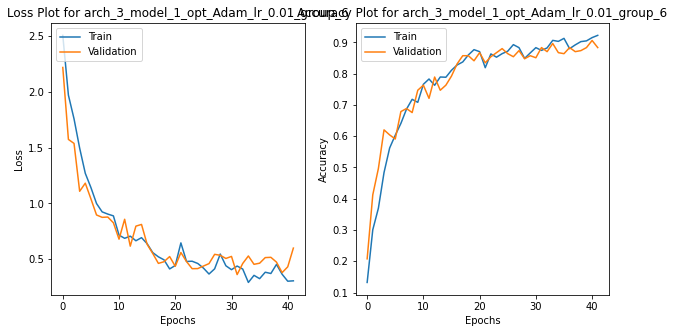

29/29 [==============================] - 1s 34ms/step - loss: 0.6991 - accuracy: 0.8313
arch_3_model_2_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 58ms/step - loss: 2.7065 - accuracy: 0.0730 - val_loss: 2.7048 - val_accuracy: 0.0779
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 2.7097 - accuracy: 0.0722 - val_loss: 2.7030 - val_accuracy: 0.1201
Epoch 3/250
39/39 [==============================] - 2s 46ms/step - loss: 2.7048 - accuracy: 0.0866 - val_loss: 2.7016 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 53ms/step - loss: 2.7021 - accuracy: 0.1013 - val_loss: 2.7003 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 51ms/step - loss: 2.7036 - accuracy: 0.0901 - val_loss: 2.6991 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 50ms/step - loss: 2.7021 - accuracy: 0.0745 - val_loss: 2.6982 - val_accuracy: 0.1006
Epoch 7/250
39/39 [=

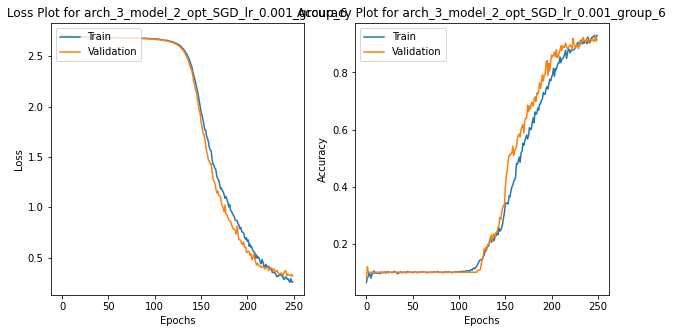

29/29 [==============================] - 1s 35ms/step - loss: 0.3400 - accuracy: 0.8999
arch_3_model_2_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 52ms/step - loss: 2.7089 - accuracy: 0.0731 - val_loss: 2.6973 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6966 - accuracy: 0.0929 - val_loss: 2.6907 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6903 - accuracy: 0.1034 - val_loss: 2.6865 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6853 - accuracy: 0.1071 - val_loss: 2.6835 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 45ms/step - loss: 2.6863 - accuracy: 0.0976 - val_loss: 2.6818 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6743 - accuracy: 0.1091 - val_loss: 2.6794 - val_accuracy: 0.1006
Epoch 7/250
39/39 [==

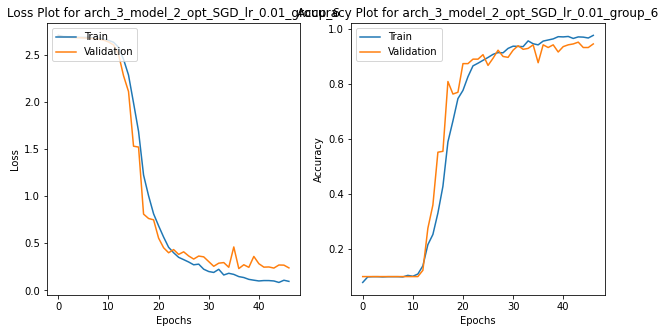

29/29 [==============================] - 1s 35ms/step - loss: 0.2523 - accuracy: 0.9347
arch_3_model_2_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 52ms/step - loss: 2.7112 - accuracy: 0.0747 - val_loss: 2.6875 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6791 - accuracy: 0.1234 - val_loss: 2.6555 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 45ms/step - loss: 2.5378 - accuracy: 0.1499 - val_loss: 1.7109 - val_accuracy: 0.4156
Epoch 4/250
39/39 [==============================] - 2s 50ms/step - loss: 1.5770 - accuracy: 0.4543 - val_loss: 0.9324 - val_accuracy: 0.7370
Epoch 5/250
39/39 [==============================] - 2s 48ms/step - loss: 0.9047 - accuracy: 0.6738 - val_loss: 0.6176 - val_accuracy: 0.8442
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 0.6375 - accuracy: 0.8019 - val_loss: 0.4864 - val_accuracy: 0.8539
Epoch 7/250
39/39 [

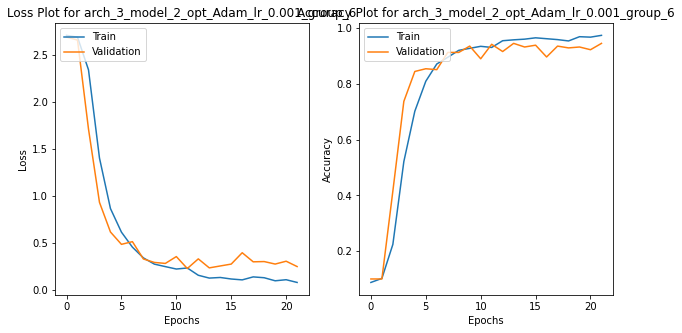

29/29 [==============================] - 1s 35ms/step - loss: 0.2673 - accuracy: 0.9238
arch_3_model_2_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 58ms/step - loss: 2.7854 - accuracy: 0.0796 - val_loss: 2.6910 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 53ms/step - loss: 2.6963 - accuracy: 0.0850 - val_loss: 2.6849 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6883 - accuracy: 0.1017 - val_loss: 2.6865 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 54ms/step - loss: 2.6867 - accuracy: 0.1006 - val_loss: 2.6847 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6959 - accuracy: 0.0929 - val_loss: 2.6847 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 46ms/step - loss: 2.6878 - accuracy: 0.0933 - val_loss: 2.6841 - val_accuracy: 0.1006
Epoch 7/250
39/39 [=

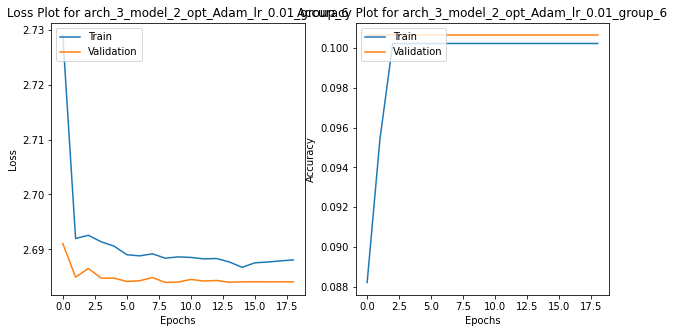

29/29 [==============================] - 1s 38ms/step - loss: 2.7169 - accuracy: 0.0435
arch_3_model_3_group_6_opt_SGD_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 64ms/step - loss: 2.7072 - accuracy: 0.0686 - val_loss: 2.7059 - val_accuracy: 0.0942
Epoch 2/250
39/39 [==============================] - 2s 46ms/step - loss: 2.7046 - accuracy: 0.0752 - val_loss: 2.7015 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6990 - accuracy: 0.1011 - val_loss: 2.6959 - val_accuracy: 0.1234
Epoch 4/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6936 - accuracy: 0.1097 - val_loss: 2.6909 - val_accuracy: 0.1104
Epoch 5/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6931 - accuracy: 0.1100 - val_loss: 2.6860 - val_accuracy: 0.1039
Epoch 6/250
39/39 [==============================] - 2s 47ms/step - loss: 2.6879 - accuracy: 0.1113 - val_loss: 2.6801 - val_accuracy: 0.1039
Epoch 7/250
39/39 [=

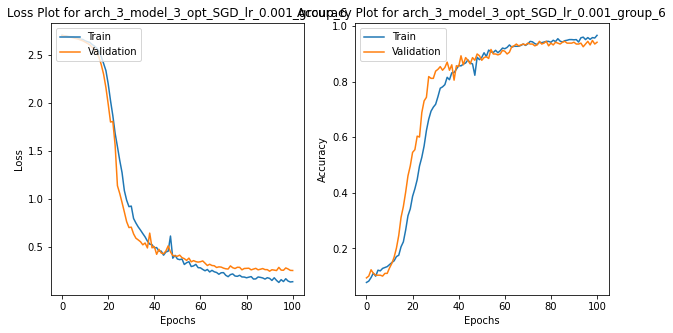

29/29 [==============================] - 1s 40ms/step - loss: 0.2231 - accuracy: 0.9412
arch_3_model_3_group_6_opt_SGD_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 60ms/step - loss: 2.7166 - accuracy: 0.0836 - val_loss: 2.6900 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 51ms/step - loss: 2.6912 - accuracy: 0.0962 - val_loss: 2.6891 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 50ms/step - loss: 2.6847 - accuracy: 0.1116 - val_loss: 2.6650 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 51ms/step - loss: 2.6591 - accuracy: 0.1064 - val_loss: 2.5543 - val_accuracy: 0.1429
Epoch 5/250
39/39 [==============================] - 2s 50ms/step - loss: 2.4746 - accuracy: 0.2035 - val_loss: 1.6998 - val_accuracy: 0.4643
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 1.8474 - accuracy: 0.4415 - val_loss: 1.7463 - val_accuracy: 0.4416
Epoch 7/250
39/39 [==

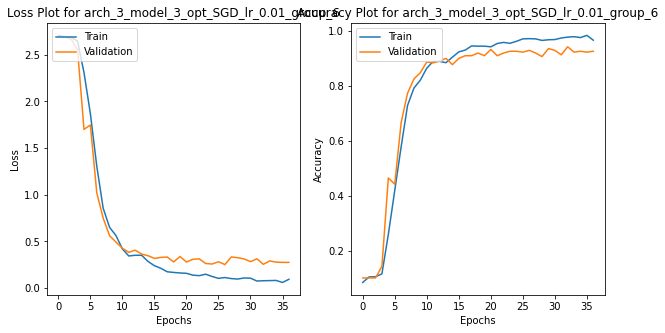

29/29 [==============================] - 1s 35ms/step - loss: 0.2114 - accuracy: 0.9412
arch_3_model_3_group_6_opt_Adam_lr_0.001
Epoch 1/250
39/39 [==============================] - 3s 62ms/step - loss: 2.6977 - accuracy: 0.0856 - val_loss: 2.5535 - val_accuracy: 0.1494
Epoch 2/250
39/39 [==============================] - 2s 53ms/step - loss: 2.1953 - accuracy: 0.2873 - val_loss: 1.0607 - val_accuracy: 0.6526
Epoch 3/250
39/39 [==============================] - 2s 45ms/step - loss: 0.9290 - accuracy: 0.6955 - val_loss: 0.5887 - val_accuracy: 0.8019
Epoch 4/250
39/39 [==============================] - 2s 48ms/step - loss: 0.5504 - accuracy: 0.7889 - val_loss: 0.4658 - val_accuracy: 0.8669
Epoch 5/250
39/39 [==============================] - 2s 49ms/step - loss: 0.3751 - accuracy: 0.8655 - val_loss: 0.3618 - val_accuracy: 0.9058
Epoch 6/250
39/39 [==============================] - 2s 45ms/step - loss: 0.2724 - accuracy: 0.9152 - val_loss: 0.3639 - val_accuracy: 0.8994
Epoch 7/250
39/39 [

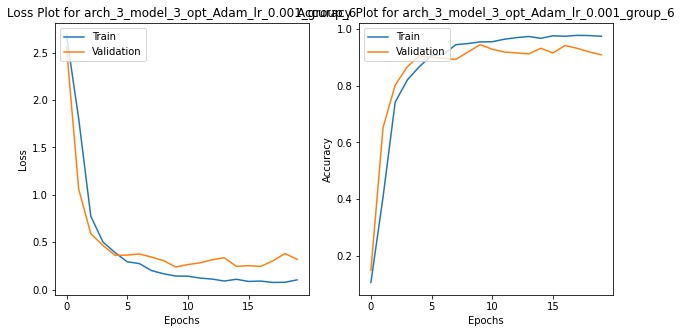

29/29 [==============================] - 1s 35ms/step - loss: 0.2501 - accuracy: 0.9347
arch_3_model_3_group_6_opt_Adam_lr_0.01
Epoch 1/250
39/39 [==============================] - 3s 62ms/step - loss: 2.9683 - accuracy: 0.0630 - val_loss: 2.6903 - val_accuracy: 0.1006
Epoch 2/250
39/39 [==============================] - 2s 49ms/step - loss: 2.6892 - accuracy: 0.0961 - val_loss: 2.6859 - val_accuracy: 0.1006
Epoch 3/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6856 - accuracy: 0.0955 - val_loss: 2.6852 - val_accuracy: 0.1006
Epoch 4/250
39/39 [==============================] - 2s 52ms/step - loss: 2.6887 - accuracy: 0.0923 - val_loss: 2.6850 - val_accuracy: 0.1006
Epoch 5/250
39/39 [==============================] - 2s 55ms/step - loss: 2.6892 - accuracy: 0.1038 - val_loss: 2.6843 - val_accuracy: 0.1006
Epoch 6/250
39/39 [==============================] - 2s 48ms/step - loss: 2.6927 - accuracy: 0.0872 - val_loss: 2.6842 - val_accuracy: 0.1006
Epoch 7/250
39/39 [=

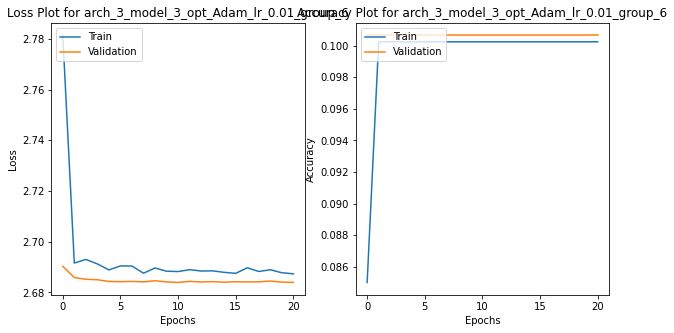

29/29 [==============================] - 1s 34ms/step - loss: 2.7123 - accuracy: 0.0435
Found 528 images belonging to 7 classes.
Found 132 images belonging to 7 classes.
Found 616 images belonging to 7 classes.
arch_1_model_1_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 170s 10s/step - loss: 1.9857 - accuracy: 0.1157 - val_loss: 1.9235 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9366 - accuracy: 0.1467 - val_loss: 1.9053 - val_accuracy: 0.2500
Epoch 3/250
17/17 [==============================] - 1s 65ms/step - loss: 1.9217 - accuracy: 0.1996 - val_loss: 1.8928 - val_accuracy: 0.2348
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9094 - accuracy: 0.1836 - val_loss: 1.8886 - val_accuracy: 0.3258
Epoch 5/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9019 - accuracy: 0.2296 - val_loss: 1.8720 - val_accuracy: 0.4015
Epoch 6/250
17/17 [===================

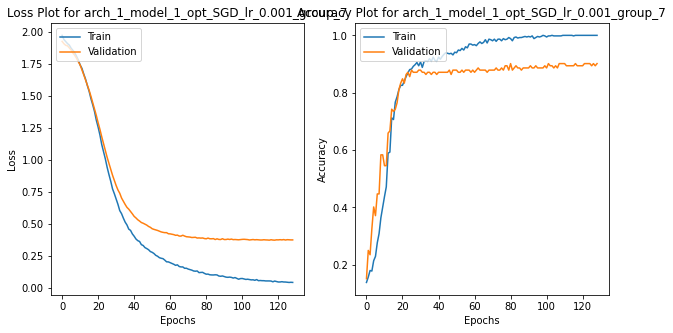

20/20 [==============================] - 158s 8s/step - loss: 0.3949 - accuracy: 0.8588
arch_1_model_1_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 1s 61ms/step - loss: 1.9533 - accuracy: 0.1507 - val_loss: 1.8483 - val_accuracy: 0.4394
Epoch 2/250
17/17 [==============================] - 1s 44ms/step - loss: 1.7673 - accuracy: 0.5231 - val_loss: 1.5896 - val_accuracy: 0.6742
Epoch 3/250
17/17 [==============================] - 1s 48ms/step - loss: 1.4121 - accuracy: 0.7616 - val_loss: 1.1565 - val_accuracy: 0.7197
Epoch 4/250
17/17 [==============================] - 1s 52ms/step - loss: 0.9270 - accuracy: 0.8350 - val_loss: 0.7121 - val_accuracy: 0.8712
Epoch 5/250
17/17 [==============================] - 1s 51ms/step - loss: 0.4934 - accuracy: 0.8863 - val_loss: 0.5503 - val_accuracy: 0.8485
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 0.3147 - accuracy: 0.9343 - val_loss: 0.4771 - val_accuracy: 0.8636
Epoch 7/250
17/17 [==

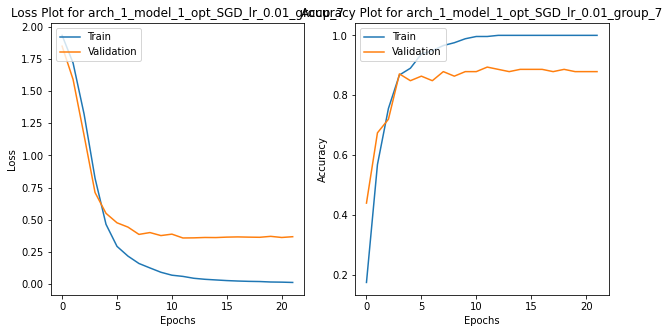

20/20 [==============================] - 1s 36ms/step - loss: 0.4267 - accuracy: 0.8474
arch_1_model_1_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 64ms/step - loss: 1.9196 - accuracy: 0.2436 - val_loss: 1.2740 - val_accuracy: 0.7197
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 0.9420 - accuracy: 0.8674 - val_loss: 0.6505 - val_accuracy: 0.8106
Epoch 3/250
17/17 [==============================] - 1s 47ms/step - loss: 0.4175 - accuracy: 0.9304 - val_loss: 0.4268 - val_accuracy: 0.9015
Epoch 4/250
17/17 [==============================] - 1s 49ms/step - loss: 0.2349 - accuracy: 0.9466 - val_loss: 0.3984 - val_accuracy: 0.8939
Epoch 5/250
17/17 [==============================] - 1s 46ms/step - loss: 0.1329 - accuracy: 0.9779 - val_loss: 0.3966 - val_accuracy: 0.8939
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 0.0819 - accuracy: 0.9945 - val_loss: 0.3759 - val_accuracy: 0.8939
Epoch 7/250
17/17 [

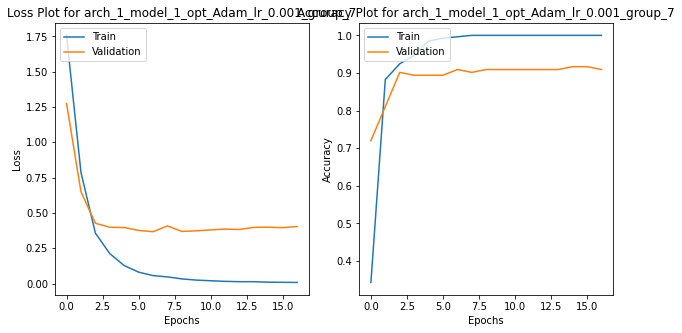

20/20 [==============================] - 1s 36ms/step - loss: 0.3373 - accuracy: 0.8815
arch_1_model_1_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 1s 59ms/step - loss: 6.8497 - accuracy: 0.1922 - val_loss: 1.0330 - val_accuracy: 0.5682
Epoch 2/250
17/17 [==============================] - 1s 46ms/step - loss: 0.6503 - accuracy: 0.8240 - val_loss: 0.4749 - val_accuracy: 0.8636
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 0.1049 - accuracy: 0.9787 - val_loss: 0.3901 - val_accuracy: 0.8939
Epoch 4/250
17/17 [==============================] - 1s 55ms/step - loss: 0.0260 - accuracy: 0.9968 - val_loss: 0.4488 - val_accuracy: 0.8788
Epoch 5/250
17/17 [==============================] - 1s 54ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.4993 - val_accuracy: 0.8864
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.5165 - val_accuracy: 0.9015
Epoch 7/250
17/17 [=

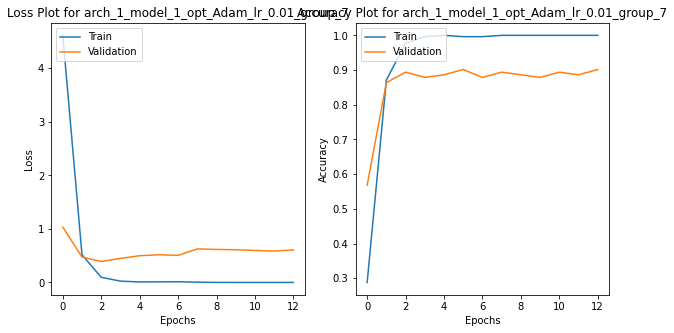

20/20 [==============================] - 1s 34ms/step - loss: 0.5323 - accuracy: 0.8344
arch_1_model_2_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 1s 60ms/step - loss: 1.9856 - accuracy: 0.1435 - val_loss: 1.9471 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 47ms/step - loss: 1.9542 - accuracy: 0.1595 - val_loss: 1.9313 - val_accuracy: 0.1667
Epoch 3/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9294 - accuracy: 0.1829 - val_loss: 1.9199 - val_accuracy: 0.2045
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9215 - accuracy: 0.1895 - val_loss: 1.9135 - val_accuracy: 0.2045
Epoch 5/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9094 - accuracy: 0.1964 - val_loss: 1.9052 - val_accuracy: 0.2045
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 1.8961 - accuracy: 0.2225 - val_loss: 1.8929 - val_accuracy: 0.1818
Epoch 7/250
17/17 [=

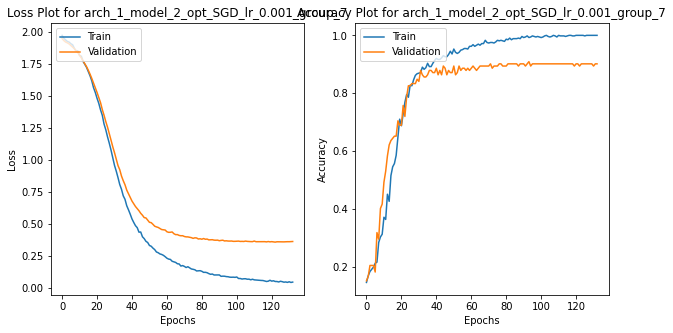

20/20 [==============================] - 1s 35ms/step - loss: 0.3916 - accuracy: 0.8669
arch_1_model_2_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 69ms/step - loss: 2.0314 - accuracy: 0.1524 - val_loss: 1.8951 - val_accuracy: 0.2803
Epoch 2/250
17/17 [==============================] - 1s 54ms/step - loss: 1.8615 - accuracy: 0.2760 - val_loss: 1.7889 - val_accuracy: 0.5833
Epoch 3/250
17/17 [==============================] - 1s 50ms/step - loss: 1.7189 - accuracy: 0.6393 - val_loss: 1.5652 - val_accuracy: 0.7576
Epoch 4/250
17/17 [==============================] - 1s 46ms/step - loss: 1.4121 - accuracy: 0.7622 - val_loss: 1.1564 - val_accuracy: 0.8106
Epoch 5/250
17/17 [==============================] - 1s 45ms/step - loss: 0.8987 - accuracy: 0.8847 - val_loss: 0.7197 - val_accuracy: 0.8333
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 0.5211 - accuracy: 0.9040 - val_loss: 0.5008 - val_accuracy: 0.8939
Epoch 7/250
17/17 [==

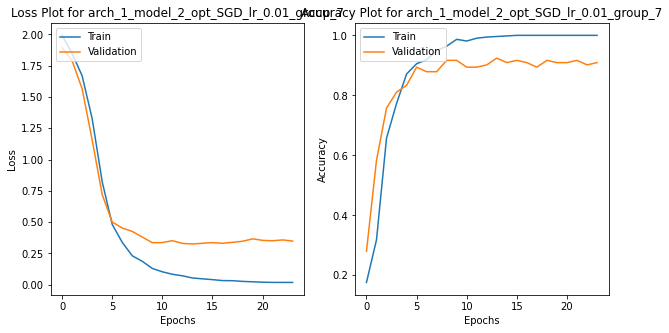

20/20 [==============================] - 1s 36ms/step - loss: 0.4547 - accuracy: 0.8490
arch_1_model_2_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 64ms/step - loss: 2.0134 - accuracy: 0.2132 - val_loss: 1.4739 - val_accuracy: 0.7121
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 1.2227 - accuracy: 0.7225 - val_loss: 0.8273 - val_accuracy: 0.8712
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 0.6249 - accuracy: 0.8899 - val_loss: 0.5459 - val_accuracy: 0.8712
Epoch 4/250
17/17 [==============================] - 1s 50ms/step - loss: 0.3666 - accuracy: 0.9322 - val_loss: 0.3901 - val_accuracy: 0.9318
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 0.2167 - accuracy: 0.9612 - val_loss: 0.3604 - val_accuracy: 0.9167
Epoch 6/250
17/17 [==============================] - 1s 45ms/step - loss: 0.1314 - accuracy: 0.9950 - val_loss: 0.3441 - val_accuracy: 0.9242
Epoch 7/250
17/17 [

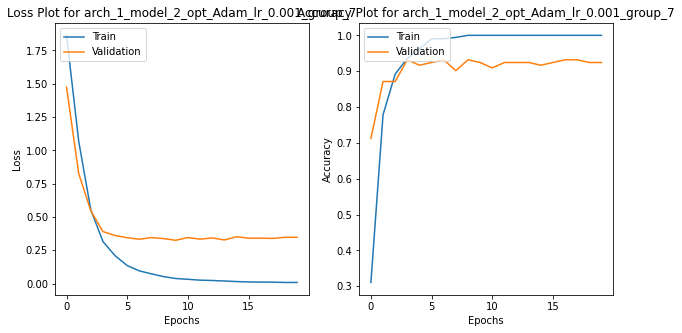

20/20 [==============================] - 1s 34ms/step - loss: 0.3690 - accuracy: 0.8636
arch_1_model_2_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 65ms/step - loss: 8.7791 - accuracy: 0.1954 - val_loss: 1.7486 - val_accuracy: 0.3788
Epoch 2/250
17/17 [==============================] - 1s 47ms/step - loss: 1.4039 - accuracy: 0.5651 - val_loss: 0.7079 - val_accuracy: 0.8333
Epoch 3/250
17/17 [==============================] - 1s 45ms/step - loss: 0.3975 - accuracy: 0.9102 - val_loss: 0.4388 - val_accuracy: 0.8712
Epoch 4/250
17/17 [==============================] - 1s 46ms/step - loss: 0.1399 - accuracy: 0.9400 - val_loss: 0.4683 - val_accuracy: 0.8864
Epoch 5/250
17/17 [==============================] - 1s 44ms/step - loss: 0.0375 - accuracy: 0.9941 - val_loss: 0.3454 - val_accuracy: 0.9091
Epoch 6/250
17/17 [==============================] - 1s 49ms/step - loss: 0.0147 - accuracy: 0.9994 - val_loss: 0.5400 - val_accuracy: 0.9015
Epoch 7/250
17/17 [=

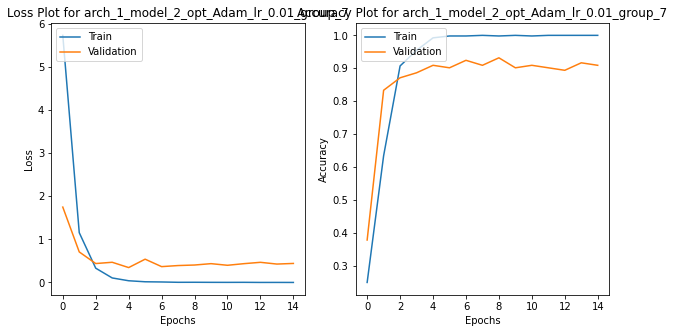

20/20 [==============================] - 1s 36ms/step - loss: 0.4194 - accuracy: 0.8750
arch_1_model_3_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 1s 59ms/step - loss: 2.0052 - accuracy: 0.1233 - val_loss: 1.9300 - val_accuracy: 0.1894
Epoch 2/250
17/17 [==============================] - 1s 44ms/step - loss: 1.9457 - accuracy: 0.1467 - val_loss: 1.9233 - val_accuracy: 0.1667
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 1.9427 - accuracy: 0.1658 - val_loss: 1.9206 - val_accuracy: 0.1591
Epoch 4/250
17/17 [==============================] - 1s 54ms/step - loss: 1.9206 - accuracy: 0.1835 - val_loss: 1.9156 - val_accuracy: 0.2045
Epoch 5/250
17/17 [==============================] - 1s 59ms/step - loss: 1.9265 - accuracy: 0.1565 - val_loss: 1.9117 - val_accuracy: 0.1970
Epoch 6/250
17/17 [==============================] - 1s 47ms/step - loss: 1.9050 - accuracy: 0.1920 - val_loss: 1.9065 - val_accuracy: 0.2273
Epoch 7/250
17/17 [=

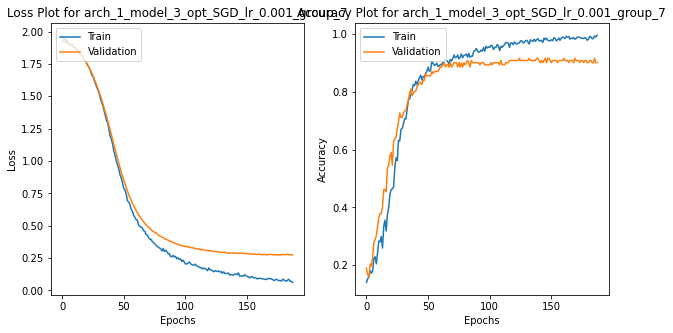

20/20 [==============================] - 1s 37ms/step - loss: 0.3751 - accuracy: 0.8782
arch_1_model_3_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 64ms/step - loss: 1.9496 - accuracy: 0.1484 - val_loss: 1.9073 - val_accuracy: 0.2424
Epoch 2/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9021 - accuracy: 0.2149 - val_loss: 1.8612 - val_accuracy: 0.4470
Epoch 3/250
17/17 [==============================] - 1s 47ms/step - loss: 1.8479 - accuracy: 0.3590 - val_loss: 1.7803 - val_accuracy: 0.5227
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 1.7406 - accuracy: 0.5275 - val_loss: 1.6461 - val_accuracy: 0.6970
Epoch 5/250
17/17 [==============================] - 1s 56ms/step - loss: 1.5700 - accuracy: 0.6242 - val_loss: 1.4384 - val_accuracy: 0.6667
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 1.3362 - accuracy: 0.7275 - val_loss: 1.1244 - val_accuracy: 0.8106
Epoch 7/250
17/17 [==

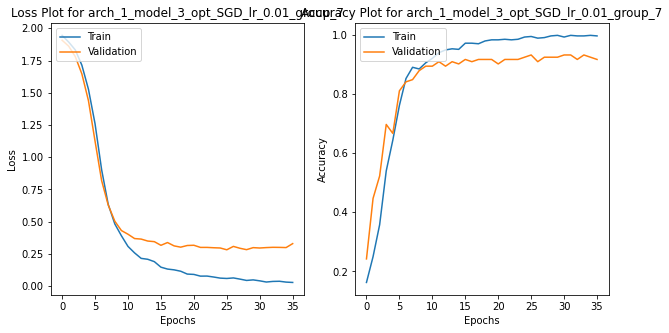

20/20 [==============================] - 1s 36ms/step - loss: 0.3849 - accuracy: 0.8604
arch_1_model_3_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 60ms/step - loss: 2.0591 - accuracy: 0.1178 - val_loss: 1.8237 - val_accuracy: 0.4167
Epoch 2/250
17/17 [==============================] - 1s 53ms/step - loss: 1.7673 - accuracy: 0.3857 - val_loss: 1.5861 - val_accuracy: 0.7955
Epoch 3/250
17/17 [==============================] - 1s 58ms/step - loss: 1.4509 - accuracy: 0.6677 - val_loss: 1.2451 - val_accuracy: 0.8030
Epoch 4/250
17/17 [==============================] - 1s 56ms/step - loss: 1.0842 - accuracy: 0.7902 - val_loss: 0.8896 - val_accuracy: 0.8636
Epoch 5/250
17/17 [==============================] - 1s 54ms/step - loss: 0.7788 - accuracy: 0.8722 - val_loss: 0.6486 - val_accuracy: 0.8939
Epoch 6/250
17/17 [==============================] - 1s 56ms/step - loss: 0.5295 - accuracy: 0.9173 - val_loss: 0.5007 - val_accuracy: 0.9242
Epoch 7/250
17/17 [

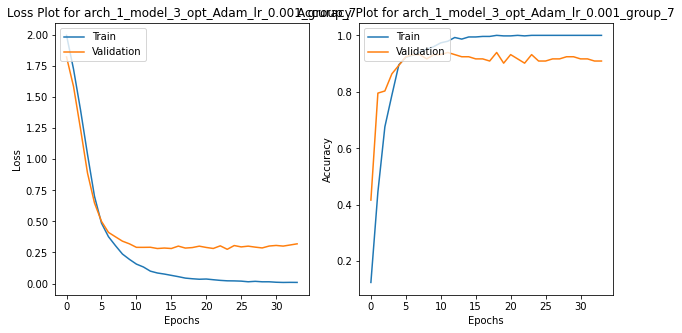

20/20 [==============================] - 1s 32ms/step - loss: 0.4133 - accuracy: 0.8555
arch_1_model_3_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 63ms/step - loss: 2.7756 - accuracy: 0.2478 - val_loss: 0.9946 - val_accuracy: 0.8333
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 0.7175 - accuracy: 0.8394 - val_loss: 0.3795 - val_accuracy: 0.9091
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 0.2238 - accuracy: 0.9555 - val_loss: 0.3566 - val_accuracy: 0.9091
Epoch 4/250
17/17 [==============================] - 1s 50ms/step - loss: 0.0717 - accuracy: 0.9745 - val_loss: 0.4066 - val_accuracy: 0.8939
Epoch 5/250
17/17 [==============================] - 1s 43ms/step - loss: 0.0337 - accuracy: 0.9951 - val_loss: 0.3871 - val_accuracy: 0.9167
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.3986 - val_accuracy: 0.9167
Epoch 7/250
17/17 [=

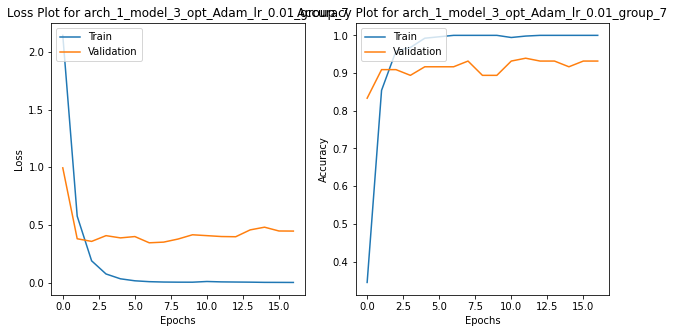

20/20 [==============================] - 1s 35ms/step - loss: 0.4607 - accuracy: 0.8718
arch_1_model_4_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 61ms/step - loss: 1.9766 - accuracy: 0.1635 - val_loss: 1.9267 - val_accuracy: 0.1970
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9343 - accuracy: 0.1969 - val_loss: 1.9037 - val_accuracy: 0.2500
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9082 - accuracy: 0.1844 - val_loss: 1.8761 - val_accuracy: 0.3485
Epoch 4/250
17/17 [==============================] - 1s 54ms/step - loss: 1.8758 - accuracy: 0.2398 - val_loss: 1.8514 - val_accuracy: 0.3485
Epoch 5/250
17/17 [==============================] - 1s 60ms/step - loss: 1.8440 - accuracy: 0.3080 - val_loss: 1.8185 - val_accuracy: 0.4318
Epoch 6/250
17/17 [==============================] - 1s 56ms/step - loss: 1.8062 - accuracy: 0.4035 - val_loss: 1.7831 - val_accuracy: 0.4924
Epoch 7/250
17/17 [=

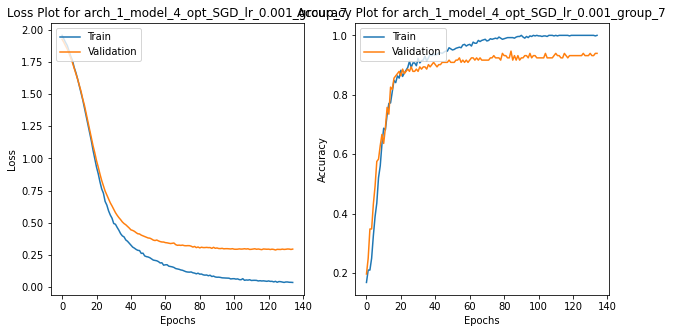

20/20 [==============================] - 1s 42ms/step - loss: 0.3739 - accuracy: 0.8701
arch_1_model_4_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 1s 59ms/step - loss: 1.9397 - accuracy: 0.1487 - val_loss: 1.8484 - val_accuracy: 0.3939
Epoch 2/250
17/17 [==============================] - 1s 47ms/step - loss: 1.7893 - accuracy: 0.4283 - val_loss: 1.5629 - val_accuracy: 0.5833
Epoch 3/250
17/17 [==============================] - 1s 56ms/step - loss: 1.4497 - accuracy: 0.6390 - val_loss: 1.1336 - val_accuracy: 0.7576
Epoch 4/250
17/17 [==============================] - 1s 46ms/step - loss: 0.9360 - accuracy: 0.8080 - val_loss: 0.7015 - val_accuracy: 0.8561
Epoch 5/250
17/17 [==============================] - 1s 59ms/step - loss: 0.5303 - accuracy: 0.8971 - val_loss: 0.5150 - val_accuracy: 0.8788
Epoch 6/250
17/17 [==============================] - 1s 52ms/step - loss: 0.3232 - accuracy: 0.9272 - val_loss: 0.4242 - val_accuracy: 0.8864
Epoch 7/250
17/17 [==

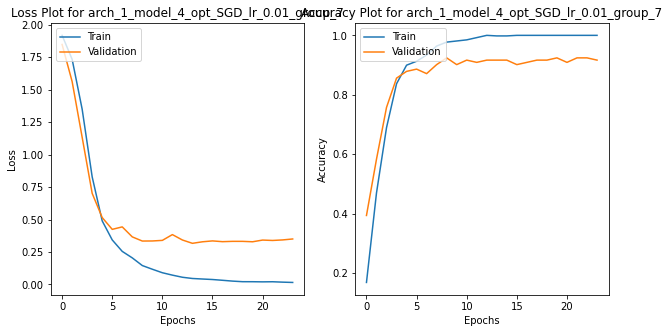

20/20 [==============================] - 1s 35ms/step - loss: 0.4158 - accuracy: 0.8442
arch_1_model_4_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 66ms/step - loss: 2.1698 - accuracy: 0.1788 - val_loss: 1.4967 - val_accuracy: 0.3788
Epoch 2/250
17/17 [==============================] - 1s 47ms/step - loss: 1.3026 - accuracy: 0.6068 - val_loss: 0.9009 - val_accuracy: 0.7803
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 0.7376 - accuracy: 0.8457 - val_loss: 0.6809 - val_accuracy: 0.8258
Epoch 4/250
17/17 [==============================] - 1s 51ms/step - loss: 0.5071 - accuracy: 0.8759 - val_loss: 0.5518 - val_accuracy: 0.8409
Epoch 5/250
17/17 [==============================] - 1s 49ms/step - loss: 0.3415 - accuracy: 0.9225 - val_loss: 0.4293 - val_accuracy: 0.9015
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 0.2507 - accuracy: 0.9566 - val_loss: 0.3998 - val_accuracy: 0.9167
Epoch 7/250
17/17 [

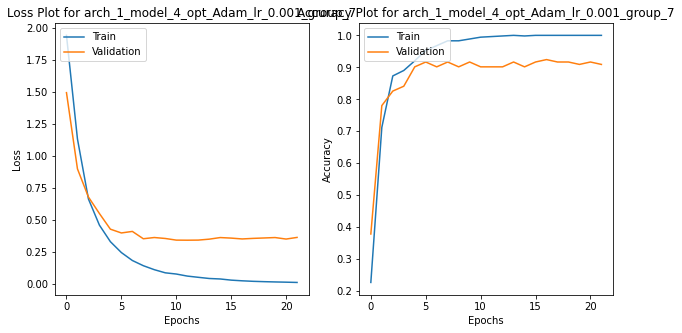

20/20 [==============================] - 1s 33ms/step - loss: 0.4218 - accuracy: 0.8539
arch_1_model_4_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 1s 58ms/step - loss: 4.4454 - accuracy: 0.1797 - val_loss: 1.9089 - val_accuracy: 0.2803
Epoch 2/250
17/17 [==============================] - 1s 49ms/step - loss: 1.7309 - accuracy: 0.3142 - val_loss: 1.2213 - val_accuracy: 0.5758
Epoch 3/250
17/17 [==============================] - 1s 52ms/step - loss: 0.8801 - accuracy: 0.6735 - val_loss: 0.5580 - val_accuracy: 0.8258
Epoch 4/250
17/17 [==============================] - 1s 45ms/step - loss: 0.3899 - accuracy: 0.8748 - val_loss: 0.5893 - val_accuracy: 0.8258
Epoch 5/250
17/17 [==============================] - 1s 45ms/step - loss: 0.2485 - accuracy: 0.9110 - val_loss: 0.5331 - val_accuracy: 0.8106
Epoch 6/250
17/17 [==============================] - 1s 52ms/step - loss: 0.1608 - accuracy: 0.9515 - val_loss: 0.5299 - val_accuracy: 0.8258
Epoch 7/250
17/17 [=

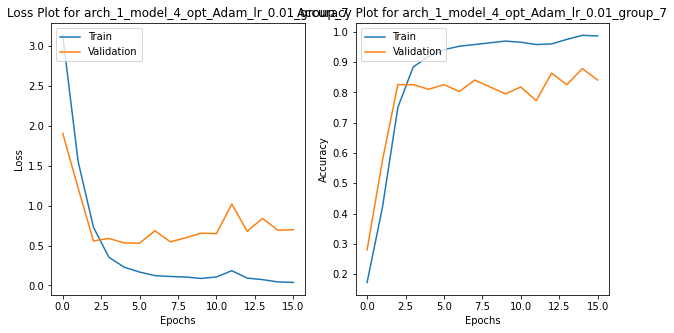

20/20 [==============================] - 1s 38ms/step - loss: 0.7550 - accuracy: 0.7792
arch_1_model_5_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 64ms/step - loss: 1.9526 - accuracy: 0.1585 - val_loss: 1.9290 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 46ms/step - loss: 1.9398 - accuracy: 0.1793 - val_loss: 1.8971 - val_accuracy: 0.2500
Epoch 3/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9114 - accuracy: 0.1783 - val_loss: 1.8849 - val_accuracy: 0.2803
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 1.8845 - accuracy: 0.2539 - val_loss: 1.8636 - val_accuracy: 0.3106
Epoch 5/250
17/17 [==============================] - 1s 48ms/step - loss: 1.8784 - accuracy: 0.2476 - val_loss: 1.8429 - val_accuracy: 0.4697
Epoch 6/250
17/17 [==============================] - 1s 57ms/step - loss: 1.8359 - accuracy: 0.3282 - val_loss: 1.8225 - val_accuracy: 0.3712
Epoch 7/250
17/17 [=

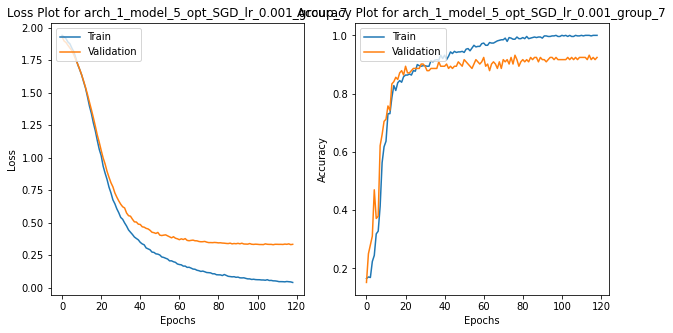

20/20 [==============================] - 1s 40ms/step - loss: 0.3849 - accuracy: 0.8734
arch_1_model_5_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 62ms/step - loss: 1.9464 - accuracy: 0.1595 - val_loss: 1.8539 - val_accuracy: 0.1818
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 1.7851 - accuracy: 0.4368 - val_loss: 1.5831 - val_accuracy: 0.6364
Epoch 3/250
17/17 [==============================] - 1s 46ms/step - loss: 1.4220 - accuracy: 0.7310 - val_loss: 1.1625 - val_accuracy: 0.7424
Epoch 4/250
17/17 [==============================] - 1s 50ms/step - loss: 0.8813 - accuracy: 0.8163 - val_loss: 0.6789 - val_accuracy: 0.8409
Epoch 5/250
17/17 [==============================] - 1s 47ms/step - loss: 0.4821 - accuracy: 0.9173 - val_loss: 0.5335 - val_accuracy: 0.8561
Epoch 6/250
17/17 [==============================] - 1s 54ms/step - loss: 0.3113 - accuracy: 0.9231 - val_loss: 0.4176 - val_accuracy: 0.8712
Epoch 7/250
17/17 [==

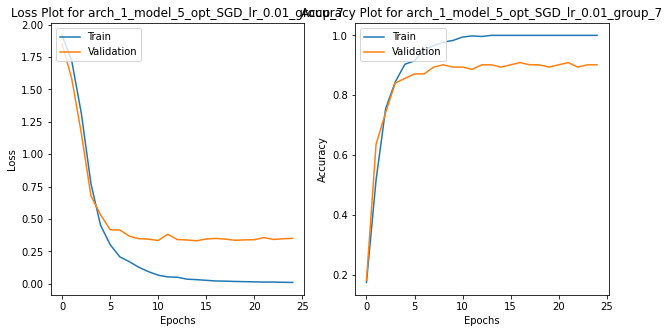

20/20 [==============================] - 1s 36ms/step - loss: 0.4372 - accuracy: 0.8409
arch_1_model_5_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 60ms/step - loss: 1.9538 - accuracy: 0.2561 - val_loss: 1.0579 - val_accuracy: 0.8182
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 0.8097 - accuracy: 0.8297 - val_loss: 0.5911 - val_accuracy: 0.8636
Epoch 3/250
17/17 [==============================] - 1s 54ms/step - loss: 0.3806 - accuracy: 0.9305 - val_loss: 0.4855 - val_accuracy: 0.8636
Epoch 4/250
17/17 [==============================] - 1s 54ms/step - loss: 0.2173 - accuracy: 0.9516 - val_loss: 0.3747 - val_accuracy: 0.8712
Epoch 5/250
17/17 [==============================] - 1s 46ms/step - loss: 0.1170 - accuracy: 0.9854 - val_loss: 0.3539 - val_accuracy: 0.9091
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 0.0842 - accuracy: 0.9848 - val_loss: 0.3549 - val_accuracy: 0.8939
Epoch 7/250
17/17 [

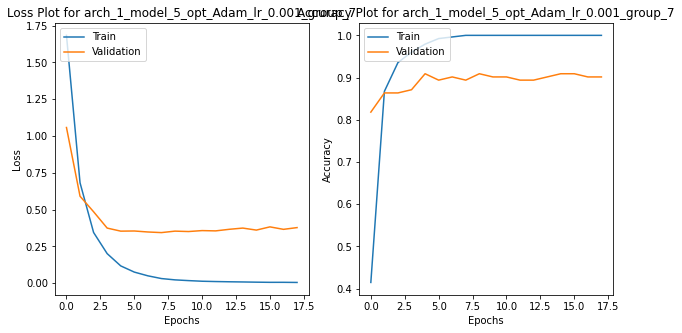

20/20 [==============================] - 1s 35ms/step - loss: 0.4085 - accuracy: 0.8604
arch_1_model_5_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 64ms/step - loss: 4.0720 - accuracy: 0.1366 - val_loss: 2.1572 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 47ms/step - loss: 1.9015 - accuracy: 0.3020 - val_loss: 1.5562 - val_accuracy: 0.6061
Epoch 3/250
17/17 [==============================] - 1s 47ms/step - loss: 1.1195 - accuracy: 0.7303 - val_loss: 0.7999 - val_accuracy: 0.7045
Epoch 4/250
17/17 [==============================] - 1s 50ms/step - loss: 0.4985 - accuracy: 0.8515 - val_loss: 0.6292 - val_accuracy: 0.7803
Epoch 5/250
17/17 [==============================] - 1s 48ms/step - loss: 0.2719 - accuracy: 0.9156 - val_loss: 0.7288 - val_accuracy: 0.7652
Epoch 6/250
17/17 [==============================] - 1s 48ms/step - loss: 0.2500 - accuracy: 0.9138 - val_loss: 0.6928 - val_accuracy: 0.7803
Epoch 7/250
17/17 [=

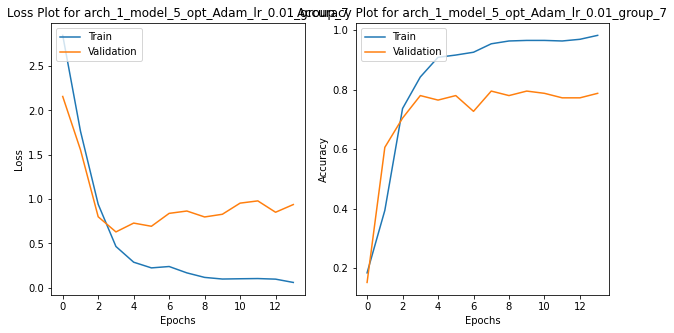

20/20 [==============================] - 1s 34ms/step - loss: 0.7249 - accuracy: 0.7532
arch_1_model_6_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 1s 60ms/step - loss: 1.9418 - accuracy: 0.1568 - val_loss: 1.9192 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 49ms/step - loss: 1.9156 - accuracy: 0.2160 - val_loss: 1.8985 - val_accuracy: 0.2576
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9028 - accuracy: 0.2064 - val_loss: 1.8779 - val_accuracy: 0.2803
Epoch 4/250
17/17 [==============================] - 1s 52ms/step - loss: 1.8781 - accuracy: 0.2716 - val_loss: 1.8554 - val_accuracy: 0.2803
Epoch 5/250
17/17 [==============================] - 1s 56ms/step - loss: 1.8401 - accuracy: 0.3337 - val_loss: 1.8258 - val_accuracy: 0.4394
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 1.8075 - accuracy: 0.4456 - val_loss: 1.7912 - val_accuracy: 0.5000
Epoch 7/250
17/17 [=

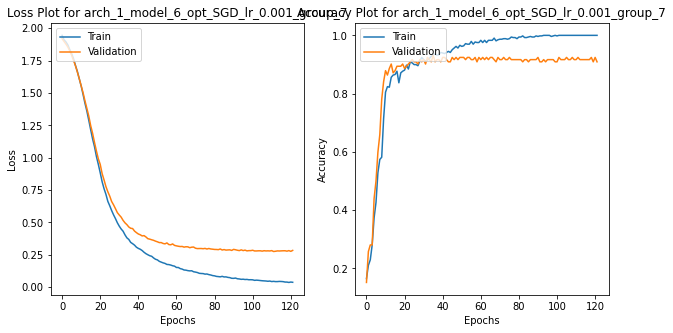

20/20 [==============================] - 1s 34ms/step - loss: 0.3797 - accuracy: 0.8669
arch_1_model_6_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 1s 61ms/step - loss: 1.9783 - accuracy: 0.1521 - val_loss: 1.8822 - val_accuracy: 0.3864
Epoch 2/250
17/17 [==============================] - 1s 48ms/step - loss: 1.8488 - accuracy: 0.3072 - val_loss: 1.7261 - val_accuracy: 0.6667
Epoch 3/250
17/17 [==============================] - 1s 51ms/step - loss: 1.6207 - accuracy: 0.6114 - val_loss: 1.4150 - val_accuracy: 0.7500
Epoch 4/250
17/17 [==============================] - 1s 60ms/step - loss: 1.2283 - accuracy: 0.8078 - val_loss: 0.9394 - val_accuracy: 0.8030
Epoch 5/250
17/17 [==============================] - 1s 48ms/step - loss: 0.7697 - accuracy: 0.8491 - val_loss: 0.6405 - val_accuracy: 0.8258
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 0.4782 - accuracy: 0.8713 - val_loss: 0.4870 - val_accuracy: 0.8939
Epoch 7/250
17/17 [==

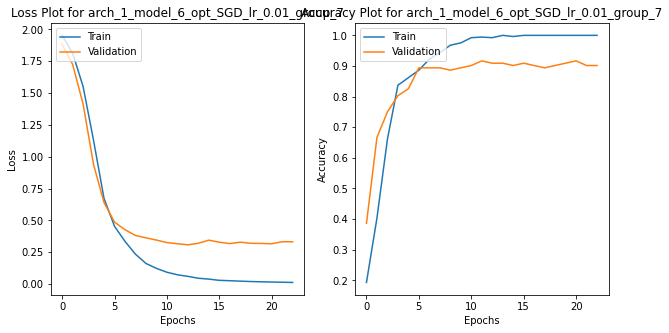

20/20 [==============================] - 1s 36ms/step - loss: 0.4154 - accuracy: 0.8490
arch_1_model_6_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 63ms/step - loss: 2.3589 - accuracy: 0.2478 - val_loss: 1.3111 - val_accuracy: 0.6212
Epoch 2/250
17/17 [==============================] - 1s 49ms/step - loss: 0.9584 - accuracy: 0.8126 - val_loss: 0.5626 - val_accuracy: 0.8485
Epoch 3/250
17/17 [==============================] - 1s 50ms/step - loss: 0.3636 - accuracy: 0.9080 - val_loss: 0.4115 - val_accuracy: 0.9091
Epoch 4/250
17/17 [==============================] - 1s 56ms/step - loss: 0.2132 - accuracy: 0.9484 - val_loss: 0.3515 - val_accuracy: 0.8939
Epoch 5/250
17/17 [==============================] - 1s 48ms/step - loss: 0.1350 - accuracy: 0.9751 - val_loss: 0.3230 - val_accuracy: 0.9091
Epoch 6/250
17/17 [==============================] - 1s 56ms/step - loss: 0.0475 - accuracy: 0.9994 - val_loss: 0.3111 - val_accuracy: 0.9091
Epoch 7/250
17/17 [

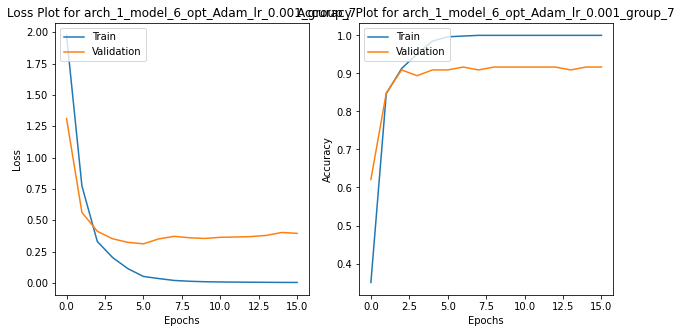

20/20 [==============================] - 1s 35ms/step - loss: 0.4066 - accuracy: 0.8474
arch_1_model_6_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 62ms/step - loss: 13.1953 - accuracy: 0.1456 - val_loss: 1.8507 - val_accuracy: 0.2727
Epoch 2/250
17/17 [==============================] - 1s 52ms/step - loss: 1.8749 - accuracy: 0.2845 - val_loss: 1.7083 - val_accuracy: 0.2045
Epoch 3/250
17/17 [==============================] - 1s 56ms/step - loss: 1.5485 - accuracy: 0.4382 - val_loss: 0.8382 - val_accuracy: 0.7576
Epoch 4/250
17/17 [==============================] - 1s 53ms/step - loss: 0.6502 - accuracy: 0.8049 - val_loss: 0.6120 - val_accuracy: 0.8030
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 0.4690 - accuracy: 0.8527 - val_loss: 0.7148 - val_accuracy: 0.7576
Epoch 6/250
17/17 [==============================] - 1s 49ms/step - loss: 0.3237 - accuracy: 0.8912 - val_loss: 0.6373 - val_accuracy: 0.7879
Epoch 7/250
17/17 [

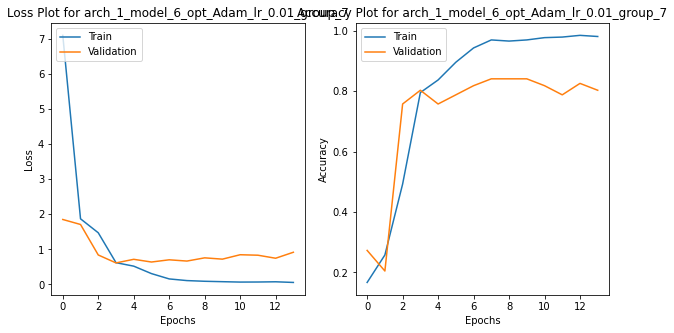

20/20 [==============================] - 1s 36ms/step - loss: 0.7832 - accuracy: 0.7175
arch_2_model_1_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 63ms/step - loss: 1.9682 - accuracy: 0.1242 - val_loss: 1.9492 - val_accuracy: 0.1364
Epoch 2/250
17/17 [==============================] - 1s 45ms/step - loss: 1.9531 - accuracy: 0.1615 - val_loss: 1.9418 - val_accuracy: 0.1439
Epoch 3/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9505 - accuracy: 0.1448 - val_loss: 1.9375 - val_accuracy: 0.1591
Epoch 4/250
17/17 [==============================] - 1s 57ms/step - loss: 1.9401 - accuracy: 0.1357 - val_loss: 1.9357 - val_accuracy: 0.1439
Epoch 5/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9341 - accuracy: 0.1671 - val_loss: 1.9340 - val_accuracy: 0.1515
Epoch 6/250
17/17 [==============================] - 1s 46ms/step - loss: 1.9262 - accuracy: 0.1904 - val_loss: 1.9293 - val_accuracy: 0.1515
Epoch 7/250
17/17 [=

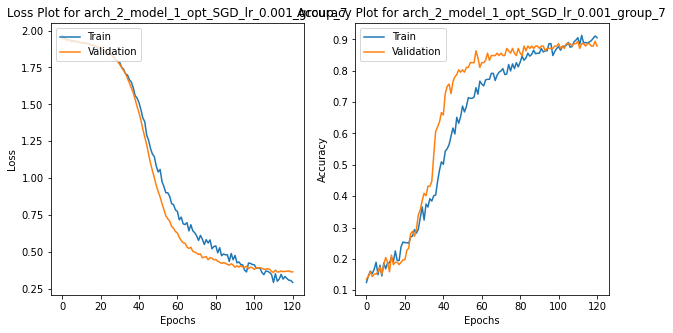

20/20 [==============================] - 1s 40ms/step - loss: 0.4729 - accuracy: 0.8377
arch_2_model_1_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 73ms/step - loss: 1.9536 - accuracy: 0.1367 - val_loss: 1.9187 - val_accuracy: 0.2273
Epoch 2/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9168 - accuracy: 0.1445 - val_loss: 1.8698 - val_accuracy: 0.2500
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 1.8657 - accuracy: 0.2341 - val_loss: 1.7893 - val_accuracy: 0.4015
Epoch 4/250
17/17 [==============================] - 1s 53ms/step - loss: 1.7702 - accuracy: 0.3131 - val_loss: 1.6192 - val_accuracy: 0.5379
Epoch 5/250
17/17 [==============================] - 1s 57ms/step - loss: 1.5487 - accuracy: 0.4776 - val_loss: 1.1692 - val_accuracy: 0.5833
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 1.2406 - accuracy: 0.5327 - val_loss: 0.9134 - val_accuracy: 0.7424
Epoch 7/250
17/17 [==

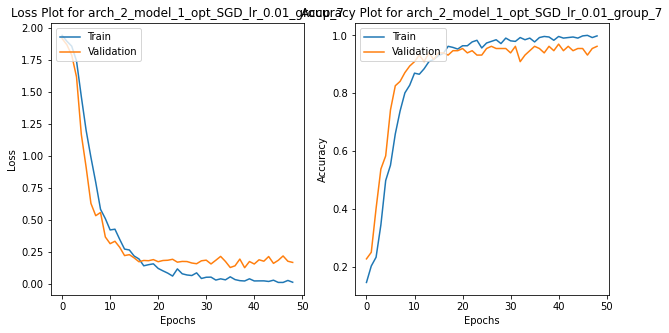

20/20 [==============================] - 1s 34ms/step - loss: 0.3384 - accuracy: 0.8912
arch_2_model_1_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 60ms/step - loss: 1.9354 - accuracy: 0.1561 - val_loss: 1.8114 - val_accuracy: 0.3712
Epoch 2/250
17/17 [==============================] - 1s 54ms/step - loss: 1.7199 - accuracy: 0.3039 - val_loss: 1.3458 - val_accuracy: 0.6591
Epoch 3/250
17/17 [==============================] - 1s 50ms/step - loss: 1.2741 - accuracy: 0.5614 - val_loss: 0.8449 - val_accuracy: 0.7197
Epoch 4/250
17/17 [==============================] - 1s 68ms/step - loss: 0.9384 - accuracy: 0.6353 - val_loss: 0.7137 - val_accuracy: 0.7576
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 0.6437 - accuracy: 0.7750 - val_loss: 0.4468 - val_accuracy: 0.8939
Epoch 6/250
17/17 [==============================] - 1s 54ms/step - loss: 0.4666 - accuracy: 0.8694 - val_loss: 0.4260 - val_accuracy: 0.8712
Epoch 7/250
17/17 [

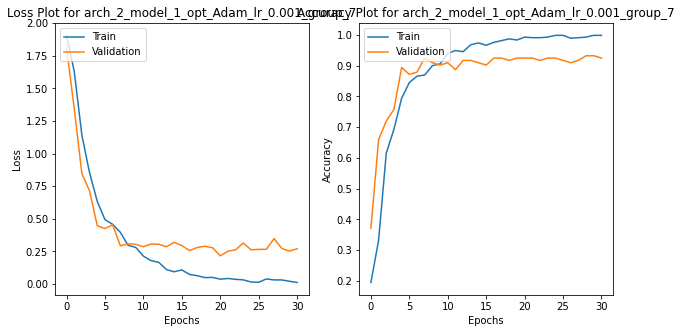

20/20 [==============================] - 1s 35ms/step - loss: 0.3058 - accuracy: 0.8977
arch_2_model_1_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 70ms/step - loss: 1.8726 - accuracy: 0.2060 - val_loss: 1.0711 - val_accuracy: 0.6288
Epoch 2/250
17/17 [==============================] - 1s 50ms/step - loss: 0.8967 - accuracy: 0.6825 - val_loss: 0.7934 - val_accuracy: 0.7121
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 0.5298 - accuracy: 0.8123 - val_loss: 0.7263 - val_accuracy: 0.7879
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 0.3599 - accuracy: 0.9023 - val_loss: 0.5668 - val_accuracy: 0.8485
Epoch 5/250
17/17 [==============================] - 1s 49ms/step - loss: 0.1632 - accuracy: 0.9481 - val_loss: 0.7981 - val_accuracy: 0.8409
Epoch 6/250
17/17 [==============================] - 1s 44ms/step - loss: 0.1991 - accuracy: 0.9192 - val_loss: 0.7494 - val_accuracy: 0.8409
Epoch 7/250
17/17 [=

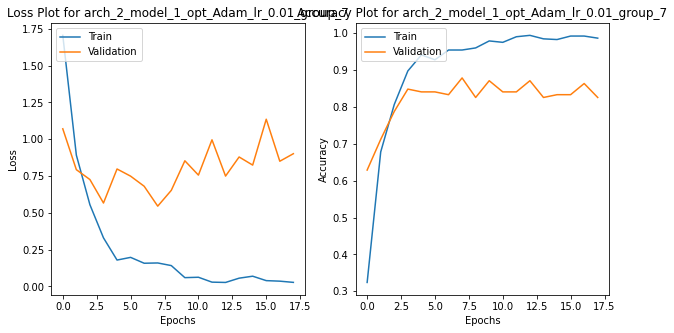

20/20 [==============================] - 1s 33ms/step - loss: 0.5416 - accuracy: 0.8766
arch_2_model_2_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 70ms/step - loss: 1.9536 - accuracy: 0.1484 - val_loss: 1.9329 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 59ms/step - loss: 1.9330 - accuracy: 0.1983 - val_loss: 1.9209 - val_accuracy: 0.1742
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 1.9333 - accuracy: 0.1547 - val_loss: 1.9112 - val_accuracy: 0.1970
Epoch 4/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9214 - accuracy: 0.1953 - val_loss: 1.9039 - val_accuracy: 0.2045
Epoch 5/250
17/17 [==============================] - 1s 55ms/step - loss: 1.9222 - accuracy: 0.1908 - val_loss: 1.8966 - val_accuracy: 0.2955
Epoch 6/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9059 - accuracy: 0.2027 - val_loss: 1.8890 - val_accuracy: 0.3106
Epoch 7/250
17/17 [=

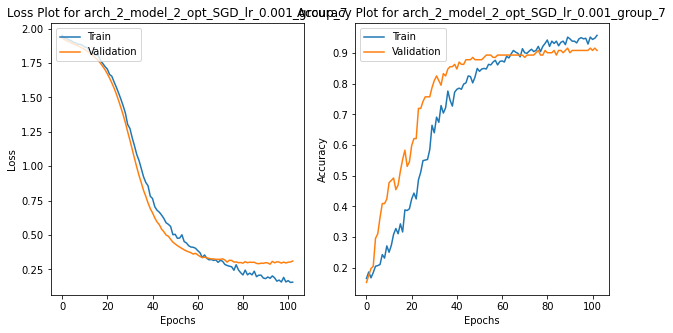

20/20 [==============================] - 1s 44ms/step - loss: 0.4046 - accuracy: 0.8588
arch_2_model_2_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 67ms/step - loss: 1.9536 - accuracy: 0.1658 - val_loss: 1.9149 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9010 - accuracy: 0.1872 - val_loss: 1.8823 - val_accuracy: 0.3030
Epoch 3/250
17/17 [==============================] - 1s 50ms/step - loss: 1.8791 - accuracy: 0.2629 - val_loss: 1.8194 - val_accuracy: 0.4242
Epoch 4/250
17/17 [==============================] - 1s 52ms/step - loss: 1.8084 - accuracy: 0.2960 - val_loss: 1.6748 - val_accuracy: 0.4167
Epoch 5/250
17/17 [==============================] - 1s 51ms/step - loss: 1.6350 - accuracy: 0.3944 - val_loss: 1.2861 - val_accuracy: 0.7348
Epoch 6/250
17/17 [==============================] - 1s 53ms/step - loss: 1.2392 - accuracy: 0.6249 - val_loss: 0.7689 - val_accuracy: 0.7803
Epoch 7/250
17/17 [==

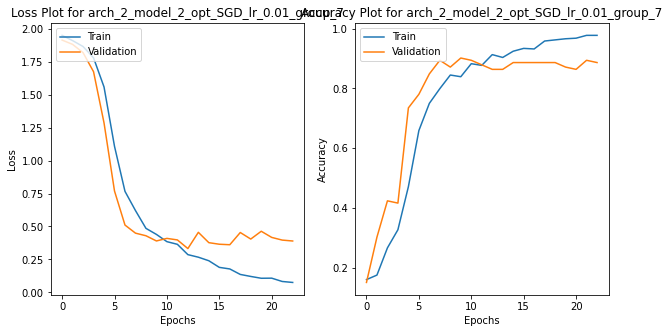

20/20 [==============================] - 1s 39ms/step - loss: 0.4937 - accuracy: 0.8360
arch_2_model_2_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 61ms/step - loss: 2.0210 - accuracy: 0.1377 - val_loss: 1.8430 - val_accuracy: 0.3788
Epoch 2/250
17/17 [==============================] - 1s 46ms/step - loss: 1.7918 - accuracy: 0.3931 - val_loss: 1.3697 - val_accuracy: 0.6288
Epoch 3/250
17/17 [==============================] - 1s 48ms/step - loss: 1.1934 - accuracy: 0.6250 - val_loss: 0.7070 - val_accuracy: 0.8030
Epoch 4/250
17/17 [==============================] - 1s 56ms/step - loss: 0.6552 - accuracy: 0.8022 - val_loss: 0.4476 - val_accuracy: 0.8712
Epoch 5/250
17/17 [==============================] - 1s 55ms/step - loss: 0.5062 - accuracy: 0.8242 - val_loss: 0.4108 - val_accuracy: 0.8561
Epoch 6/250
17/17 [==============================] - 1s 48ms/step - loss: 0.3392 - accuracy: 0.8842 - val_loss: 0.3725 - val_accuracy: 0.9091
Epoch 7/250
17/17 [

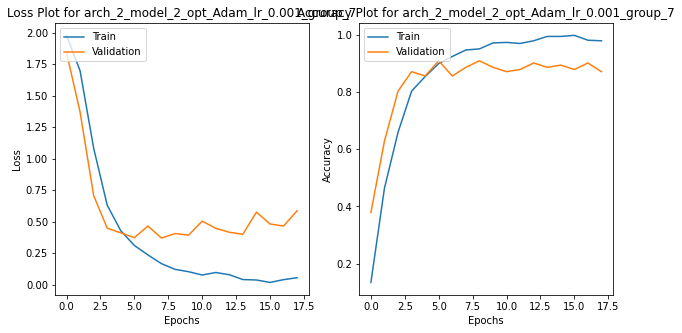

20/20 [==============================] - 1s 37ms/step - loss: 0.3973 - accuracy: 0.8799
arch_2_model_2_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 61ms/step - loss: 2.8748 - accuracy: 0.1680 - val_loss: 1.8399 - val_accuracy: 0.1742
Epoch 2/250
17/17 [==============================] - 1s 50ms/step - loss: 1.6594 - accuracy: 0.3142 - val_loss: 1.1313 - val_accuracy: 0.6591
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 0.7735 - accuracy: 0.7365 - val_loss: 0.4833 - val_accuracy: 0.8788
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 0.5166 - accuracy: 0.8364 - val_loss: 0.4522 - val_accuracy: 0.8561
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 0.2309 - accuracy: 0.9257 - val_loss: 0.5551 - val_accuracy: 0.8333
Epoch 6/250
17/17 [==============================] - 1s 48ms/step - loss: 0.2145 - accuracy: 0.9338 - val_loss: 0.4781 - val_accuracy: 0.8864
Epoch 7/250
17/17 [=

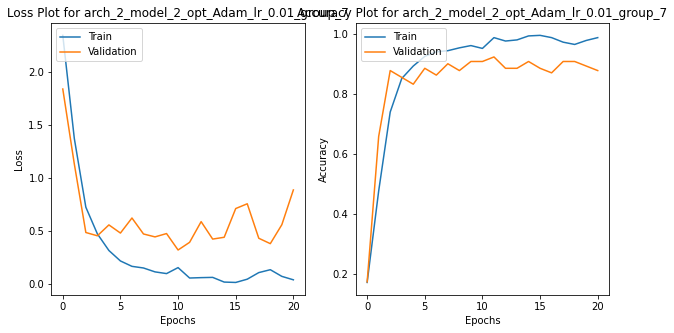

20/20 [==============================] - 1s 32ms/step - loss: 0.2849 - accuracy: 0.9172
arch_3_model_1_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 70ms/step - loss: 1.9393 - accuracy: 0.1609 - val_loss: 1.9385 - val_accuracy: 0.1818
Epoch 2/250
17/17 [==============================] - 1s 54ms/step - loss: 1.9417 - accuracy: 0.1323 - val_loss: 1.9367 - val_accuracy: 0.1667
Epoch 3/250
17/17 [==============================] - 1s 58ms/step - loss: 1.9418 - accuracy: 0.1549 - val_loss: 1.9346 - val_accuracy: 0.1742
Epoch 4/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9322 - accuracy: 0.1645 - val_loss: 1.9326 - val_accuracy: 0.1818
Epoch 5/250
17/17 [==============================] - 1s 55ms/step - loss: 1.9334 - accuracy: 0.1671 - val_loss: 1.9308 - val_accuracy: 0.1742
Epoch 6/250
17/17 [==============================] - 1s 55ms/step - loss: 1.9408 - accuracy: 0.1082 - val_loss: 1.9298 - val_accuracy: 0.1364
Epoch 7/250
17/17 [=

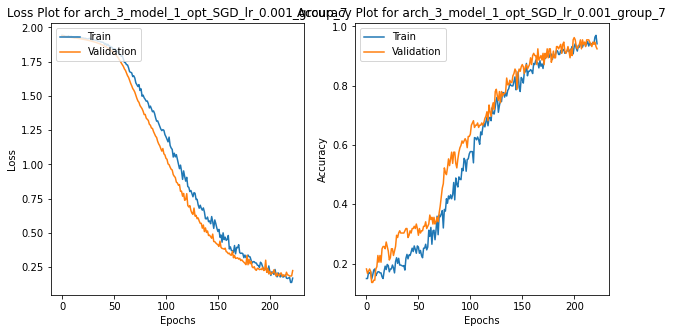

20/20 [==============================] - 1s 39ms/step - loss: 0.3313 - accuracy: 0.8815
arch_3_model_1_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 72ms/step - loss: 1.9478 - accuracy: 0.1473 - val_loss: 1.9380 - val_accuracy: 0.1970
Epoch 2/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9472 - accuracy: 0.1647 - val_loss: 1.9324 - val_accuracy: 0.1439
Epoch 3/250
17/17 [==============================] - 1s 52ms/step - loss: 1.9368 - accuracy: 0.1362 - val_loss: 1.9253 - val_accuracy: 0.2652
Epoch 4/250
17/17 [==============================] - 1s 49ms/step - loss: 1.9237 - accuracy: 0.1846 - val_loss: 1.9160 - val_accuracy: 0.2197
Epoch 5/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9186 - accuracy: 0.1685 - val_loss: 1.9018 - val_accuracy: 0.1894
Epoch 6/250
17/17 [==============================] - 1s 60ms/step - loss: 1.9183 - accuracy: 0.1950 - val_loss: 1.8764 - val_accuracy: 0.3030
Epoch 7/250
17/17 [==

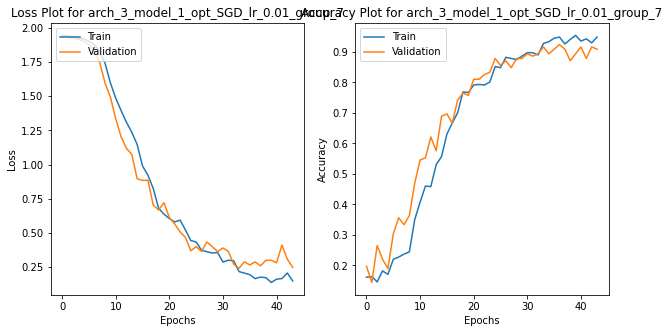

20/20 [==============================] - 1s 36ms/step - loss: 0.4588 - accuracy: 0.8409
arch_3_model_1_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 72ms/step - loss: 1.9562 - accuracy: 0.1454 - val_loss: 1.9389 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 49ms/step - loss: 1.9386 - accuracy: 0.1873 - val_loss: 1.9206 - val_accuracy: 0.1818
Epoch 3/250
17/17 [==============================] - 1s 60ms/step - loss: 1.9090 - accuracy: 0.1972 - val_loss: 1.8434 - val_accuracy: 0.2121
Epoch 4/250
17/17 [==============================] - 1s 46ms/step - loss: 1.8299 - accuracy: 0.1848 - val_loss: 1.6036 - val_accuracy: 0.3182
Epoch 5/250
17/17 [==============================] - 1s 55ms/step - loss: 1.5964 - accuracy: 0.3438 - val_loss: 1.2569 - val_accuracy: 0.5530
Epoch 6/250
17/17 [==============================] - 1s 56ms/step - loss: 1.3509 - accuracy: 0.4641 - val_loss: 1.0348 - val_accuracy: 0.6667
Epoch 7/250
17/17 [

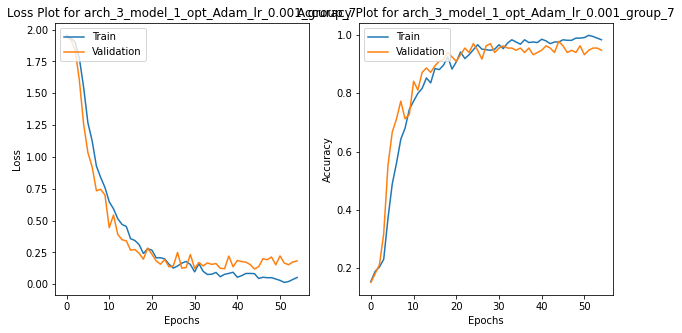

20/20 [==============================] - 1s 32ms/step - loss: 0.3728 - accuracy: 0.8896
arch_3_model_1_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 73ms/step - loss: 2.3646 - accuracy: 0.1928 - val_loss: 1.9346 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 45ms/step - loss: 1.9247 - accuracy: 0.1462 - val_loss: 1.7306 - val_accuracy: 0.1591
Epoch 3/250
17/17 [==============================] - 1s 52ms/step - loss: 1.7042 - accuracy: 0.2488 - val_loss: 1.4953 - val_accuracy: 0.3409
Epoch 4/250
17/17 [==============================] - 1s 47ms/step - loss: 1.5881 - accuracy: 0.3430 - val_loss: 1.3559 - val_accuracy: 0.4848
Epoch 5/250
17/17 [==============================] - 1s 52ms/step - loss: 1.3735 - accuracy: 0.4501 - val_loss: 1.0648 - val_accuracy: 0.5379
Epoch 6/250
17/17 [==============================] - 1s 54ms/step - loss: 1.0747 - accuracy: 0.6107 - val_loss: 1.0552 - val_accuracy: 0.6061
Epoch 7/250
17/17 [=

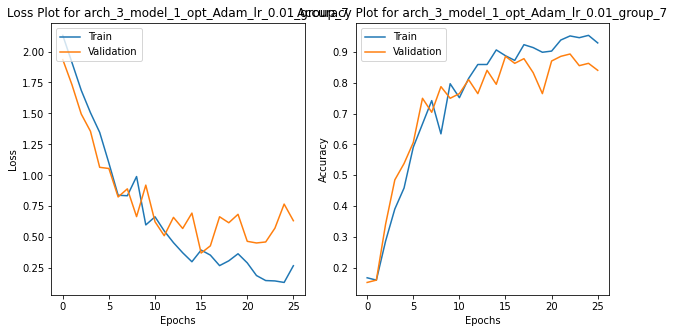

20/20 [==============================] - 1s 39ms/step - loss: 0.4749 - accuracy: 0.8425
arch_3_model_2_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 71ms/step - loss: 1.9472 - accuracy: 0.1485 - val_loss: 1.9474 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9459 - accuracy: 0.1603 - val_loss: 1.9462 - val_accuracy: 0.1515
Epoch 3/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9451 - accuracy: 0.1673 - val_loss: 1.9451 - val_accuracy: 0.1515
Epoch 4/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9460 - accuracy: 0.1662 - val_loss: 1.9442 - val_accuracy: 0.1515
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9434 - accuracy: 0.1779 - val_loss: 1.9434 - val_accuracy: 0.1515
Epoch 6/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9387 - accuracy: 0.1690 - val_loss: 1.9428 - val_accuracy: 0.1591
Epoch 7/250
17/17 [=

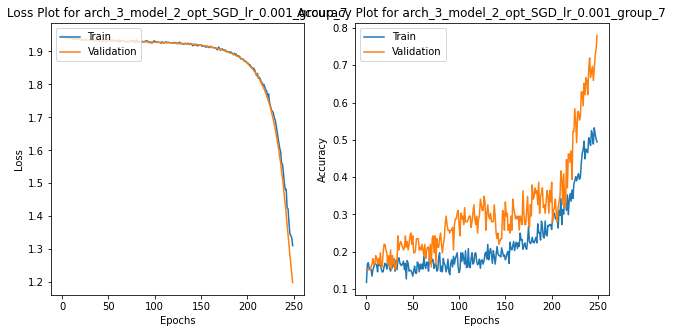

20/20 [==============================] - 1s 34ms/step - loss: 1.2936 - accuracy: 0.6461
arch_3_model_2_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 61ms/step - loss: 1.9453 - accuracy: 0.1453 - val_loss: 1.9413 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 54ms/step - loss: 1.9414 - accuracy: 0.1584 - val_loss: 1.9365 - val_accuracy: 0.2045
Epoch 3/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9320 - accuracy: 0.1735 - val_loss: 1.9333 - val_accuracy: 0.1515
Epoch 4/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9346 - accuracy: 0.1456 - val_loss: 1.9318 - val_accuracy: 0.2500
Epoch 5/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9308 - accuracy: 0.1519 - val_loss: 1.9297 - val_accuracy: 0.2197
Epoch 6/250
17/17 [==============================] - 1s 54ms/step - loss: 1.9367 - accuracy: 0.1727 - val_loss: 1.9283 - val_accuracy: 0.2045
Epoch 7/250
17/17 [==

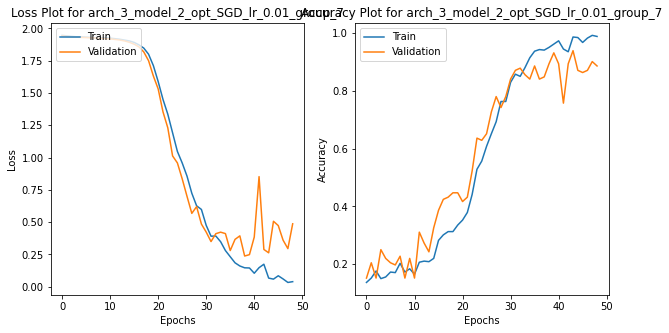

20/20 [==============================] - 1s 38ms/step - loss: 0.5657 - accuracy: 0.8247
arch_3_model_2_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 62ms/step - loss: 1.9394 - accuracy: 0.1825 - val_loss: 1.9217 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9097 - accuracy: 0.1802 - val_loss: 1.8762 - val_accuracy: 0.2197
Epoch 3/250
17/17 [==============================] - 1s 46ms/step - loss: 1.8168 - accuracy: 0.2138 - val_loss: 1.5766 - val_accuracy: 0.3864
Epoch 4/250
17/17 [==============================] - 1s 52ms/step - loss: 1.5263 - accuracy: 0.4153 - val_loss: 1.2029 - val_accuracy: 0.5606
Epoch 5/250
17/17 [==============================] - 1s 52ms/step - loss: 1.2003 - accuracy: 0.4837 - val_loss: 0.9046 - val_accuracy: 0.6288
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 0.8742 - accuracy: 0.6107 - val_loss: 0.8021 - val_accuracy: 0.6212
Epoch 7/250
17/17 [

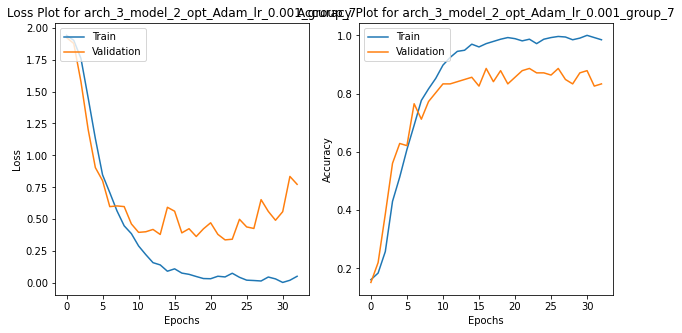

20/20 [==============================] - 1s 38ms/step - loss: 0.6947 - accuracy: 0.8084
arch_3_model_2_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 62ms/step - loss: 1.9569 - accuracy: 0.1449 - val_loss: 1.9132 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 55ms/step - loss: 1.8852 - accuracy: 0.1952 - val_loss: 1.7374 - val_accuracy: 0.2273
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 1.7937 - accuracy: 0.2436 - val_loss: 1.5964 - val_accuracy: 0.3182
Epoch 4/250
17/17 [==============================] - 1s 46ms/step - loss: 1.5945 - accuracy: 0.3366 - val_loss: 1.5824 - val_accuracy: 0.3485
Epoch 5/250
17/17 [==============================] - 1s 48ms/step - loss: 1.5008 - accuracy: 0.3617 - val_loss: 1.4719 - val_accuracy: 0.4015
Epoch 6/250
17/17 [==============================] - 1s 50ms/step - loss: 1.3773 - accuracy: 0.4140 - val_loss: 1.4274 - val_accuracy: 0.3864
Epoch 7/250
17/17 [=

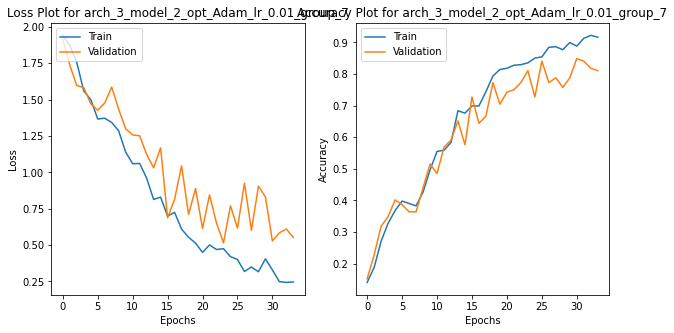

20/20 [==============================] - 1s 35ms/step - loss: 0.9102 - accuracy: 0.6932
arch_3_model_3_group_7_opt_SGD_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 72ms/step - loss: 1.9546 - accuracy: 0.1199 - val_loss: 1.9485 - val_accuracy: 0.1364
Epoch 2/250
17/17 [==============================] - 1s 64ms/step - loss: 1.9443 - accuracy: 0.1534 - val_loss: 1.9442 - val_accuracy: 0.1515
Epoch 3/250
17/17 [==============================] - 1s 59ms/step - loss: 1.9401 - accuracy: 0.1432 - val_loss: 1.9409 - val_accuracy: 0.1439
Epoch 4/250
17/17 [==============================] - 1s 55ms/step - loss: 1.9432 - accuracy: 0.1743 - val_loss: 1.9389 - val_accuracy: 0.1591
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9381 - accuracy: 0.1765 - val_loss: 1.9363 - val_accuracy: 0.1667
Epoch 6/250
17/17 [==============================] - 1s 47ms/step - loss: 1.9340 - accuracy: 0.1946 - val_loss: 1.9341 - val_accuracy: 0.1667
Epoch 7/250
17/17 [=

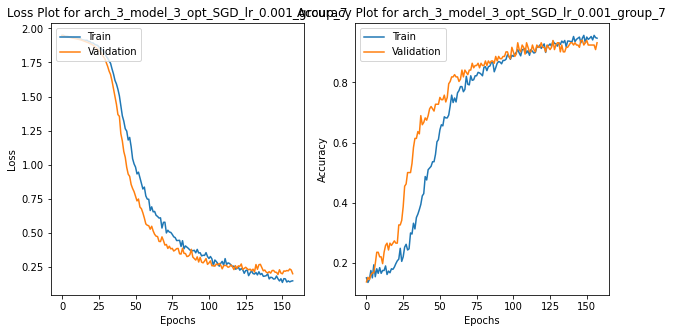

20/20 [==============================] - 1s 35ms/step - loss: 0.4250 - accuracy: 0.8474
arch_3_model_3_group_7_opt_SGD_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 66ms/step - loss: 1.9552 - accuracy: 0.1229 - val_loss: 1.9336 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 49ms/step - loss: 1.9332 - accuracy: 0.1624 - val_loss: 1.9290 - val_accuracy: 0.1515
Epoch 3/250
17/17 [==============================] - 1s 48ms/step - loss: 1.9298 - accuracy: 0.1605 - val_loss: 1.9252 - val_accuracy: 0.1591
Epoch 4/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9239 - accuracy: 0.1947 - val_loss: 1.9118 - val_accuracy: 0.1515
Epoch 5/250
17/17 [==============================] - 1s 50ms/step - loss: 1.9091 - accuracy: 0.1946 - val_loss: 1.8961 - val_accuracy: 0.2348
Epoch 6/250
17/17 [==============================] - 1s 60ms/step - loss: 1.8968 - accuracy: 0.2329 - val_loss: 1.8624 - val_accuracy: 0.3409
Epoch 7/250
17/17 [==

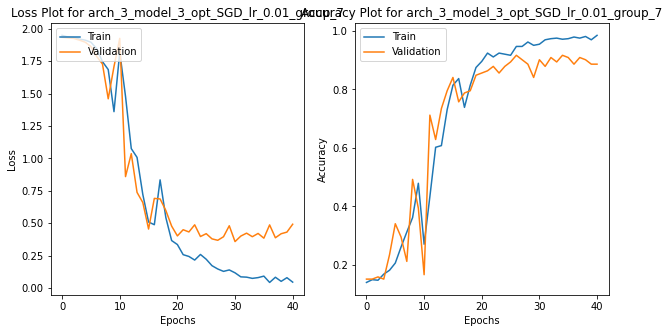

20/20 [==============================] - 1s 39ms/step - loss: 0.3478 - accuracy: 0.8945
arch_3_model_3_group_7_opt_Adam_lr_0.001
Epoch 1/250
17/17 [==============================] - 2s 72ms/step - loss: 1.9734 - accuracy: 0.1485 - val_loss: 1.9166 - val_accuracy: 0.1667
Epoch 2/250
17/17 [==============================] - 1s 53ms/step - loss: 1.8973 - accuracy: 0.1726 - val_loss: 1.7556 - val_accuracy: 0.2803
Epoch 3/250
17/17 [==============================] - 1s 49ms/step - loss: 1.6492 - accuracy: 0.3081 - val_loss: 1.1571 - val_accuracy: 0.5606
Epoch 4/250
17/17 [==============================] - 1s 54ms/step - loss: 1.2051 - accuracy: 0.5313 - val_loss: 0.8709 - val_accuracy: 0.7273
Epoch 5/250
17/17 [==============================] - 1s 51ms/step - loss: 0.9034 - accuracy: 0.6416 - val_loss: 0.6346 - val_accuracy: 0.7121
Epoch 6/250
17/17 [==============================] - 1s 51ms/step - loss: 0.6363 - accuracy: 0.7698 - val_loss: 0.5399 - val_accuracy: 0.8258
Epoch 7/250
17/17 [

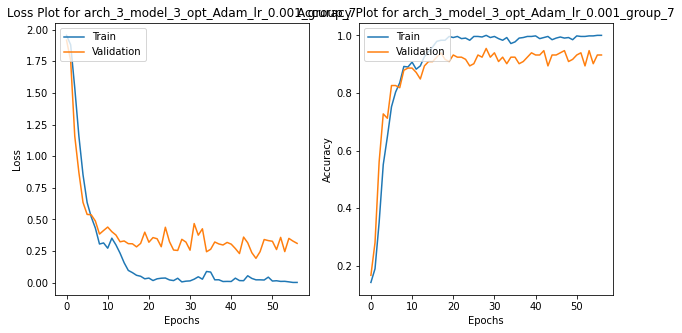

20/20 [==============================] - 1s 35ms/step - loss: 0.2695 - accuracy: 0.9269
arch_3_model_3_group_7_opt_Adam_lr_0.01
Epoch 1/250
17/17 [==============================] - 2s 65ms/step - loss: 2.1392 - accuracy: 0.1343 - val_loss: 1.9378 - val_accuracy: 0.1515
Epoch 2/250
17/17 [==============================] - 1s 51ms/step - loss: 1.9394 - accuracy: 0.1558 - val_loss: 1.9347 - val_accuracy: 0.1515
Epoch 3/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9416 - accuracy: 0.1073 - val_loss: 1.9340 - val_accuracy: 0.1515
Epoch 4/250
17/17 [==============================] - 1s 56ms/step - loss: 1.9352 - accuracy: 0.1112 - val_loss: 1.9337 - val_accuracy: 0.1515
Epoch 5/250
17/17 [==============================] - 1s 59ms/step - loss: 1.9413 - accuracy: 0.1132 - val_loss: 1.9344 - val_accuracy: 0.1515
Epoch 6/250
17/17 [==============================] - 1s 53ms/step - loss: 1.9329 - accuracy: 0.1564 - val_loss: 1.9338 - val_accuracy: 0.1515
Epoch 7/250
17/17 [=

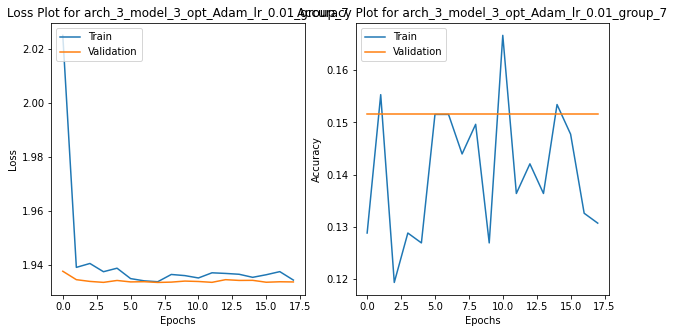

20/20 [==============================] - 1s 36ms/step - loss: 1.9019 - accuracy: 0.1623


In [10]:
main_path = '/content/gdrive/My Drive/Springboard Projects/Capstone_Three'
group_list = ['group_4', 'group_5', 'group_6', 'group_7']
input_shape=(45,45,1)
result_dict = dict()
result_dict['architecture'] = list()
result_dict['model_num'] = list()
result_dict['group'] = list()
result_dict['optimizer'] = list()
result_dict['learning_rate'] = list()
result_dict['valid_accuracy']=list()
result_dict['test_accuracy'] = list()
for group in group_list:
  path = main_path + '/' + group
  data = datagen(path, validation_split=0.2)
  train_data = data.train_data
  valid_data = data.valid_data
  test_data = data.test_data
  num_class = train_data.num_classes
  for arch in experiments['Architecture'].unique():
    for modelnum in experiments[experiments['Architecture']==arch]['Model_Number']:
      for optimizer in ['SGD', 'Adam']:
        for lr in [.001, .01]:
          tf.keras.backend.clear_session()
          model = model_create(arch, modelnum, experiments, input_shape, num_class).model_generate()
          my_optimizer, early_stopping_monitor = opt_callbacks(optimizer, lr, patience=10)
          model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
          print(arch+'_'+modelnum+'_'+group+'_opt_'+optimizer+'_lr_'+str(lr))
          training = model.fit(train_data, epochs=250, validation_data=valid_data, callbacks=[early_stopping_monitor])
          print(arch+'_'+modelnum+'_'+group+'_opt_'+optimizer+'_lr_'+str(lr))
          model.summary()
          save_plot = save_plot_model(model, (arch+'_'+modelnum+'_opt_'+optimizer+'_lr_'+str(lr)), training, group, main_path+'/models')
          save_plot.save_model()
          save_plot.plot_model_hist()
          result_dict['architecture'].append(arch)
          result_dict['model_num'].append(modelnum)
          result_dict['group'].append(group)
          result_dict['optimizer'].append(optimizer)
          result_dict['learning_rate'].append(lr)
          result_dict['valid_accuracy'].append(model.evaluate(valid_data)[1])
          result_dict['test_accuracy'].append(model.evaluate(test_data)[1])

In [11]:
# Creating the dataframe for future study of finding the best model and effect of different parameters
df = pd.DataFrame(result_dict)
df.to_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/accuracies_2.csv')